In [1]:
!pip install tensorflow

In [80]:
import random 
random.seed(123)
from math import *
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split
import operator as op

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [4]:
data = pd.read_csv("dataset.txt",sep=";")
data.head()

C:\Users\Hemanth\AppData\Local\Temp\ipykernel_1580\987010488.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dataset.txt",sep=";")


Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0

In [5]:
missing = ['Sub_metering_3']
for i in missing:
    data.loc[data.loc[:,i].isnull(),i]=data.loc[:,i].mean()

In [6]:
data['Date'] = data['Date'].astype(str)
data['Time'] = data['Time'].astype(str)
data.replace(['?', 'nan', np.nan], -1, inplace=True) 
num_col= ['Global_active_power', 'Global_reactive_power', 'Voltage', 
           'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in num_col:
    data[i] = pd.to_numeric(data[i])

In [7]:
# Filling nan and all other illegal values with mean
for i in num_col:
    mean_ = data.loc[:,i].mean()
    data.loc[data.loc[:,i] == -1,i]=mean_

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [9]:
def convert(x):
    l = list(x.split('/'))
    return l[2]+"-"+l[1]+"-"+l[0]

In [10]:
data['Date'] = data['Date'].map(lambda x : convert(x))
data.head()

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  2006-12-16  17:24:00                4.216                  0.418   234.84   
1  2006-12-16  17:25:00                5.360                  0.436   233.63   
2  2006-12-16  17:26:00                5.374                  0.498   233.29   
3  2006-12-16  17:27:00                5.388                  0.502   233.74   
4  2006-12-16  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0

In [11]:
data['Date_and_Time'] = data['Date'].str.cat(data['Time'],sep = " ")
data = data.drop(['Date','Time'],axis = 1)
data.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3        Date_and_Time  
0             0.0             1.0            17.0  2006-12-16 17:24:00  
1             0.0             1.0            16.0  2006-12-16 17:25:00  
2             0.0             2.0            17.0  2006-12-16 17:26:00  
3             0.0             1.0            17.0  2006-12-16 17:27:00  
4             0.0             1.0            17.0  2006-12-16 17:28:00

In [12]:
data.shape

(2075259, 8)

In [13]:
data['Date_and_Time'] = pd.to_datetime(data['Date_and_Time'])
data = data.set_index('Date_and_Time').resample('60min').mean()
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Freq: 60T
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34589 non-null  float64
 1   Global_reactive_power  34589 non-null  float64
 2   Voltage                34589 non-null  float64
 3   Global_intensity       34589 non-null  float64
 4   Sub_metering_1         34589 non-null  float64
 5   Sub_metering_2         34589 non-null  float64
 6   Sub_metering_3         34589 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB


Global_active_power  Global_reactive_power     Voltage  \
Date_and_Time                                                                 
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.632200               0.080033  234.580167   
2006-12-16 19:00:00             3.400233               0.085233  233.232500   
2006-12-16 20:00:00             3.268567               0.075100  234.071500   
2006-12-16 21:00:00             3.056467               0.076667  237.158667   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Date_and_Time                                                           
2006-12-16 17:00:00         18.100000             0.0        0.527778   
2006-12-16 18:00:00         15.600000             0.0        6.716667   
2006-12-16 19:00:00         14.503333             0.0        1.433333   
2006-12-16 20:00:00         13.916667             0.0        0.000000   
2006-12-16 21:00:00         13.046667             0.0        0.416667   

                     Sub_metering_3  
Date_and_Time                        
2006-12-16 17:00:00       16.861111  
2006-12-16 18:00:00       16.866667  
2006-12-16 19:00:00       16.683333  
2006-12-16 20:00:00       16.783333  
2006-12-16 21:00:00       17.216667

In [14]:
data.shape

(34589, 7)

In [15]:
def series_to_supervised(data, in_cnt=1, out_cnt=1, dropnan=True):
    var_cnt = 0
    if type(data) is list :
        var_cnt = 1
    else:
        var_cnt= data.shape[1]
        
    temp_df = pd.DataFrame(data)
    cols, col_names = list(), list()
    for i in range(in_cnt, 0, -1):
        cols.append(temp_df.shift(-i))
        col_names += [('var%d(t-%d)' % (j+1, i)) for j in range(var_cnt)]
    for i in range(0, out_cnt):
        cols.append(temp_df.shift(-i))
        if i==0:
            col_names += [('var%d(t)' % (j+1)) for j in range(var_cnt)]
        else:
            col_names += [('var%d(t+%d)' % (j+1)) for j in range(var_cnt)]
        
        agg = pd.concat(cols, axis=1)
        agg.columns = col_names
        if dropnan:
            agg.dropna(inplace=True)
        drop_col = [x for x in range(8,14)]
        agg.drop(agg.columns[drop_col],axis=1,inplace = True)
        return agg

In [16]:
transformed_data = series_to_supervised(data, 1, 1)

In [17]:
transformed_data.head()

var1(t-1)  var2(t-1)   var3(t-1)  var4(t-1)  var5(t-1)  \
Date_and_Time                                                                 
2006-12-16 17:00:00   3.632200   0.080033  234.580167  15.600000        0.0   
2006-12-16 18:00:00   3.400233   0.085233  233.232500  14.503333        0.0   
2006-12-16 19:00:00   3.268567   0.075100  234.071500  13.916667        0.0   
2006-12-16 20:00:00   3.056467   0.076667  237.158667  13.046667        0.0   
2006-12-16 21:00:00   2.200133   0.056167  238.760000   9.523333        0.0   

                     var6(t-1)  var7(t-1)   var1(t)  
Date_and_Time                                        
2006-12-16 17:00:00   6.716667  16.866667  4.222889  
2006-12-16 18:00:00   1.433333  16.683333  3.632200  
2006-12-16 19:00:00   0.000000  16.783333  3.400233  
2006-12-16 20:00:00   0.416667  17.216667  3.268567  
2006-12-16 21:00:00   0.133333   4.433333  3.056467

In [18]:
train_time_cnt = 365*24*3
data_values = transformed_data.values
train = data_values[:train_time_cnt, :]
test = data_values[train_time_cnt:, :]
X_train = train[:,:7]
Y_train = train[:,7:]
X_test = test[:,:7]
Y_test = test[:,7:]

In [65]:
#Visualization of Loss vs epochs

#For training and validation
def validation_vs_training(model_data):
    plt.figure(figsize=(6,4))
    plt.xlabel('epochs')
    plt.ylabel('MSE loss')
    print(type(model_data.history))
    for k,v in model_data.history.items():
        print(k,v)
    l1=[math.sqrt(x) for x in model_data.history['loss']]
    l2=[math.sqrt(x) for x in model_data.history['val_loss']]
    plt.plot(l1,label='Training MSE loss')
    plt.plot(l2,label = 'Validation MSE loss')
    plt.legend(loc='best')
    plt.show()

    
# Learning curves 
def training_loss_curves(model_data):
    pd.DataFrame(model_data.history).plot(figsize=(20, 8))
    plt.title('Learning curves')
    plt.gca().set_ylim(0, 1)
    plt.show()

### 1.Model with one hidden layer
### Optimizer = SGD
### Activation Function = 'Sigmoid'

In [55]:
def ann_1(no_of_units):
    ann = Sequential(
                [
                    Dense(no_of_units,activation='sigmoid'),
                    Dense(1,activation = 'linear')
                ])
    ann.compile(optimizer ='SGD',loss='mse',metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])
    model_store = ann.fit(X_train,Y_train,
              epochs=10,
              batch_size=128,
              verbose=0,
              validation_split=0.2)
    ann.summary()
    training_loss_curves(model_store)
    validation_vs_training(model_store)
    res = ann.evaluate(X_test, Y_test, batch_size=128)
    pred_values= ann.predict(X_test)
    print(Y_test)
    print(pred_values)
    print("r2 score :"+str(skm.r2_score(Y_test,pred_values)))

Model: "sequential_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_308 (Dense)           (None, 16)                128       
                                                                 
 dense_309 (Dense)           (None, 1)                 17        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


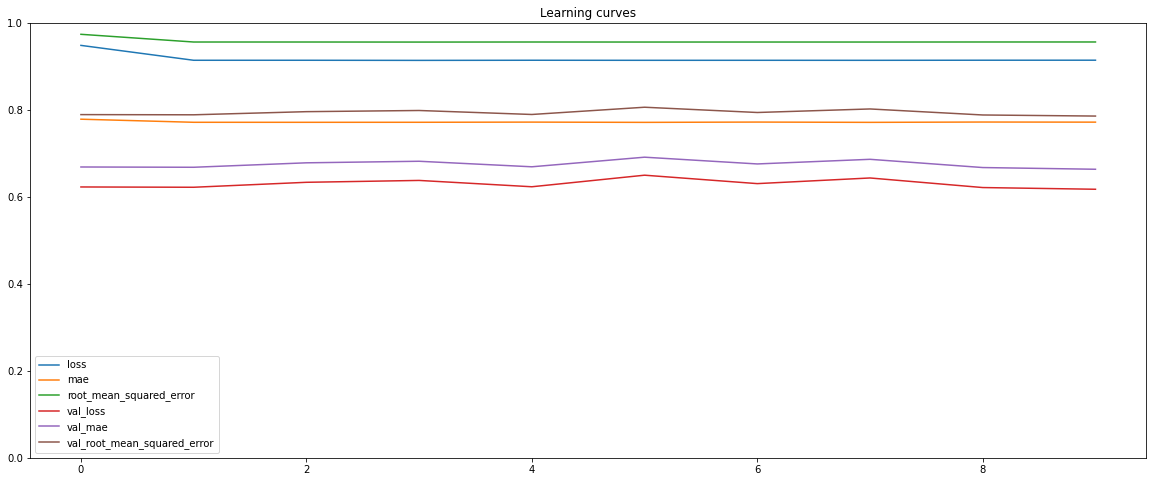

<class 'dict'>
loss [0.9483357667922974, 0.9141039252281189, 0.914130687713623, 0.9138627648353577, 0.9141572713851929, 0.9140127897262573, 0.9140505194664001, 0.9140061736106873, 0.9142298102378845, 0.914280354976654]
mae [0.7786123156547546, 0.7715010643005371, 0.7714607119560242, 0.7715206742286682, 0.7719179391860962, 0.7713330984115601, 0.7720089554786682, 0.7713453769683838, 0.7720869183540344, 0.7718393206596375]
root_mean_squared_error [0.9738253355026245, 0.9560878276824951, 0.9561018347740173, 0.9559617042541504, 0.95611572265625, 0.9560401439666748, 0.9560598731040955, 0.9560366868972778, 0.9561536312103271, 0.9561800956726074]
val_loss [0.6227842569351196, 0.6220985651016235, 0.6335082054138184, 0.6378107666969299, 0.6232523322105408, 0.6498424410820007, 0.6304759979248047, 0.6434528827667236, 0.6214368939399719, 0.6175156831741333]
val_mae [0.6687189340591431, 0.6680667400360107, 0.6783125400543213, 0.6818860173225403, 0.6691701412200928, 0.6912499666213989, 0.675716161727

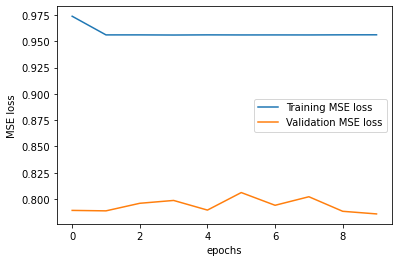

260/260 [==============================] - 0s 1ms/step
[[1.1582    ]
 [1.3862    ]
 [1.69403333]
 ...
 [1.57346667]
 [1.65933333]
 [1.1637    ]]
[[1.1083872]
 [1.1083872]
 [1.108389 ]
 ...
 [1.1083852]
 [1.1083869]
 [1.1083863]]
r2 score :-0.0016948998384604952
Model: "sequential_109"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_310 (Dense)           (None, 32)                256       
                                                                 
 dense_311 (Dense)           (None, 1)                 33        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


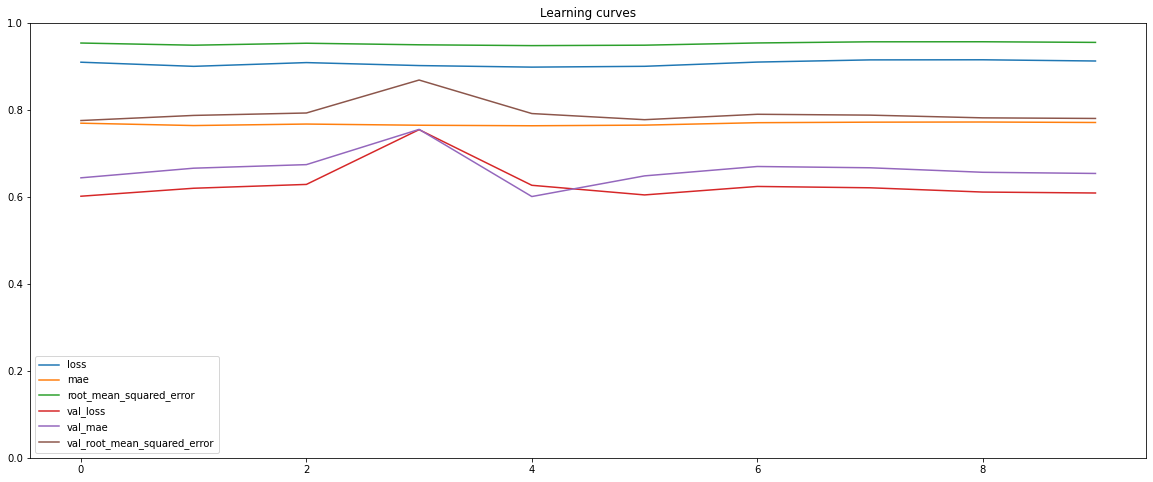

<class 'dict'>
loss [0.9096598625183105, 0.9001491665840149, 0.9087755680084229, 0.9019309282302856, 0.8983426690101624, 0.9002299308776855, 0.9099736213684082, 0.914995014667511, 0.9152423143386841, 0.9124376177787781]
mae [0.7694396376609802, 0.7640100121498108, 0.7674424648284912, 0.7647302746772766, 0.7635128498077393, 0.7649929523468018, 0.7705892324447632, 0.771776556968689, 0.7721391916275024, 0.7710475325584412]
root_mean_squared_error [0.9537609219551086, 0.9487619400024414, 0.9532971978187561, 0.9497004151344299, 0.9478093981742859, 0.948804497718811, 0.953925371170044, 0.9565536975860596, 0.9566829800605774, 0.9552159905433655]
val_loss [0.6014840602874756, 0.6198278069496155, 0.6286312937736511, 0.7545999884605408, 0.6266217231750488, 0.6044769287109375, 0.623962938785553, 0.6208823323249817, 0.6110742092132568, 0.6089008450508118]
val_mae [0.6438084244728088, 0.6659509539604187, 0.6741454601287842, 0.755151629447937, 0.6007764935493469, 0.6482905149459839, 0.66984200477600

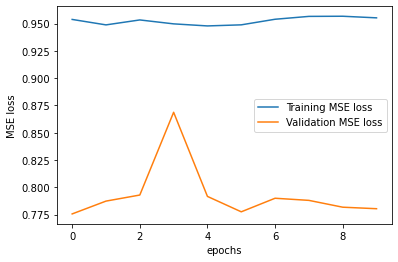

260/260 [==============================] - 0s 1ms/step
[[1.1582    ]
 [1.3862    ]
 [1.69403333]
 ...
 [1.57346667]
 [1.65933333]
 [1.1637    ]]
[[1.0763168]
 [1.0763168]
 [1.0763156]
 ...
 [1.076316 ]
 [1.0763165]
 [1.076316 ]]
r2 score :0.00023363457043723557
Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_312 (Dense)           (None, 64)                512       
                                                                 
 dense_313 (Dense)           (None, 1)                 65        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


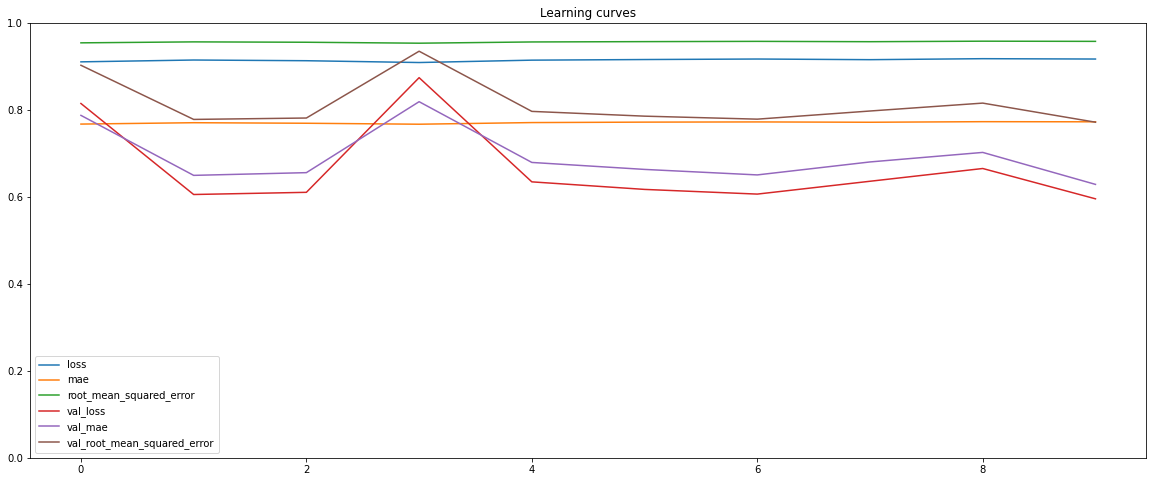

<class 'dict'>
loss [0.9104828834533691, 0.9147031307220459, 0.9130860567092896, 0.9089254140853882, 0.9143736362457275, 0.9158031344413757, 0.9169763922691345, 0.9154935479164124, 0.9177573323249817, 0.9169599413871765]
mae [0.7673826813697815, 0.7705361247062683, 0.7692966461181641, 0.7670631408691406, 0.7708500027656555, 0.7718667387962341, 0.7723343968391418, 0.7715875506401062, 0.7729108333587646, 0.7726213335990906]
root_mean_squared_error [0.9541922807693481, 0.9564011096954346, 0.9555553793907166, 0.9533758163452148, 0.9562288522720337, 0.956976056098938, 0.9575888514518738, 0.9568142890930176, 0.9579965472221375, 0.9575802683830261]
val_loss [0.8147256970405579, 0.6054490804672241, 0.6104562878608704, 0.8741177320480347, 0.6345314979553223, 0.6171682476997375, 0.6063833236694336, 0.6359027028083801, 0.6652301549911499, 0.5955272912979126]
val_mae [0.7874158620834351, 0.6494506597518921, 0.6557021737098694, 0.8188749551773071, 0.6791735291481018, 0.6631454229354858, 0.650488018

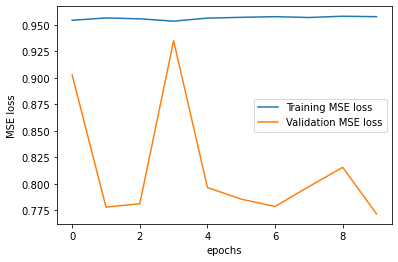

260/260 [==============================] - 0s 1ms/step
[[1.1582    ]
 [1.3862    ]
 [1.69403333]
 ...
 [1.57346667]
 [1.65933333]
 [1.1637    ]]
[[0.96983457]
 [0.9698343 ]
 [0.96983624]
 ...
 [0.9698342 ]
 [0.9698349 ]
 [0.9698353 ]]
r2 score :-0.018597952518245142
Model: "sequential_111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_314 (Dense)           (None, 128)               1024      
                                                                 
 dense_315 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


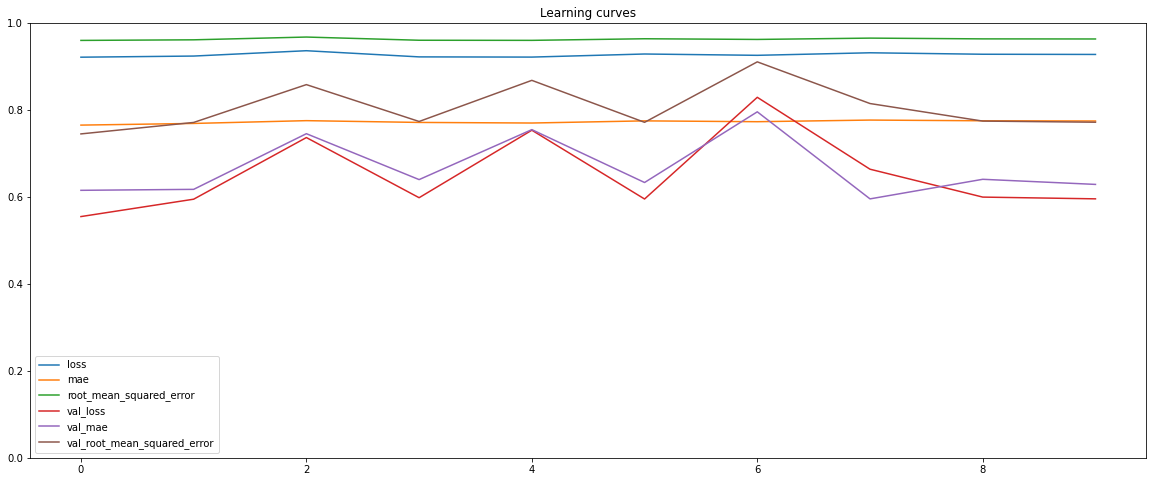

<class 'dict'>
loss [0.9211979508399963, 0.9238011837005615, 0.9360749125480652, 0.9218947887420654, 0.921424150466919, 0.92851322889328, 0.9254950284957886, 0.9313334226608276, 0.9279659986495972, 0.9275206327438354]
mae [0.7650264501571655, 0.768864095211029, 0.7752639055252075, 0.7711840867996216, 0.7698197960853577, 0.774761974811554, 0.7728399634361267, 0.7766010165214539, 0.7749819755554199, 0.7744730710983276]
root_mean_squared_error [0.9597905874252319, 0.9611457586288452, 0.9675096273422241, 0.9601535201072693, 0.9599084258079529, 0.9635939002037048, 0.9620265364646912, 0.9650561809539795, 0.9633099436759949, 0.9630787372589111]
val_loss [0.5546972751617432, 0.5946480631828308, 0.7363826036453247, 0.5980778336524963, 0.7533016800880432, 0.5951045155525208, 0.8289505243301392, 0.6636085510253906, 0.5994851589202881, 0.5954707264900208]
val_mae [0.6150705814361572, 0.6172835826873779, 0.7452954649925232, 0.6397238969802856, 0.7546228170394897, 0.633047342300415, 0.79556381702423

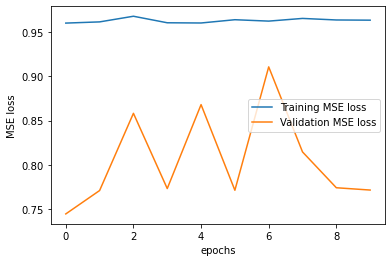

260/260 [==============================] - 0s 1ms/step
[[1.1582    ]
 [1.3862    ]
 [1.69403333]
 ...
 [1.57346667]
 [1.65933333]
 [1.1637    ]]
[[0.96968114]
 [0.9696808 ]
 [0.9697136 ]
 ...
 [0.9696467 ]
 [0.9696686 ]
 [0.969658  ]]
r2 score :-0.018548967607583622


In [56]:
ann_1(16)
ann_1(32)
ann_1(64)
ann_1(128)

### 2. Model with two hidden layer
### Optimizer = SGD
### Activation Function = 'Sigmoid'

In [57]:
def ann_2(no_of_units1,no_of_units2):
    ann= Sequential(
                [
                    Dense(no_of_units1,activation='sigmoid'),
                    Dense(no_of_units2,activation='sigmoid'),
                    Dense(1,activation = 'linear')
                ])
    ann.compile(optimizer ='SGD',loss='mse',metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])
    model_store = ann.fit(X_train,Y_train,
              epochs=10,
              batch_size=128,
              verbose=0,
              validation_split=0.2)
    ann.summary()
    training_loss_curves(model_store)
    validation_vs_training(model_store)
    res = ann.evaluate(X_test, Y_test, batch_size=128)
    pred_values= ann.predict(X_test)
    print("r2 score :"+str(skm.r2_score(Y_test,pred_values)))

Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_316 (Dense)           (None, 16)                128       
                                                                 
 dense_317 (Dense)           (None, 16)                272       
                                                                 
 dense_318 (Dense)           (None, 1)                 17        
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


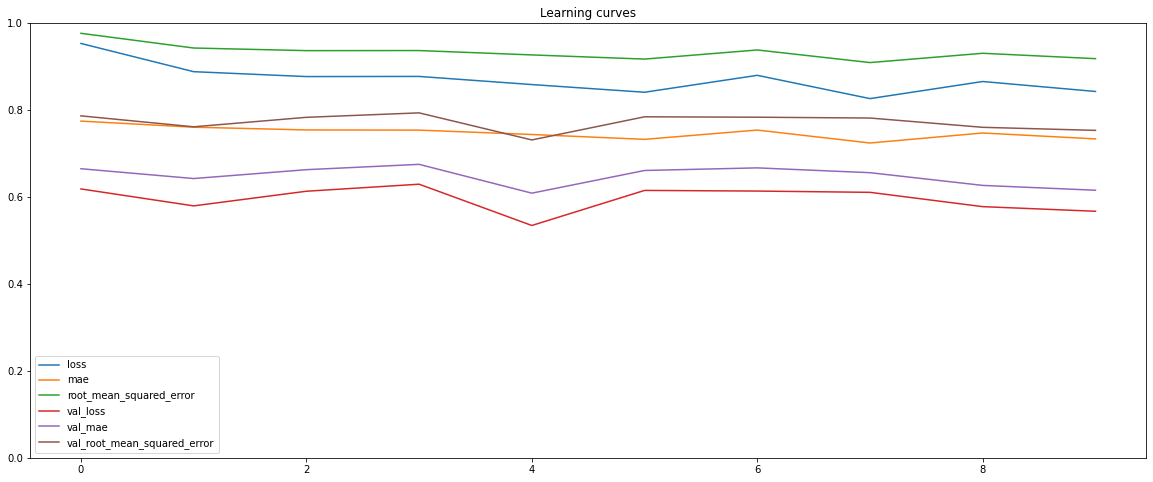

<class 'dict'>
loss [0.9527890086174011, 0.8878886103630066, 0.8766108155250549, 0.8769422769546509, 0.8582549095153809, 0.8405831456184387, 0.8794814944267273, 0.8259468078613281, 0.8652685880661011, 0.8423970937728882]
mae [0.7742222547531128, 0.7602168321609497, 0.7539088726043701, 0.7534909248352051, 0.743445098400116, 0.7322763204574585, 0.7536323070526123, 0.7238675951957703, 0.74690181016922, 0.7333243489265442]
root_mean_squared_error [0.9761090874671936, 0.9422783851623535, 0.9362749457359314, 0.9364519715309143, 0.9264205098152161, 0.916833221912384, 0.9378067255020142, 0.9088161587715149, 0.9301981329917908, 0.9178219437599182]
val_loss [0.6182494759559631, 0.5792975425720215, 0.612960159778595, 0.6291258931159973, 0.5342152118682861, 0.6148473620414734, 0.6133552193641663, 0.610421895980835, 0.5775134563446045, 0.5668954849243164]
val_mae [0.6647008657455444, 0.6421509981155396, 0.662536084651947, 0.6747856736183167, 0.6085361838340759, 0.6606910824775696, 0.666670083999633

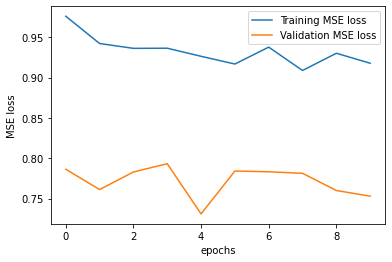

260/260 [==============================] - 0s 1ms/step
r2 score :0.03475769044364607
Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_319 (Dense)           (None, 32)                256       
                                                                 
 dense_320 (Dense)           (None, 32)                1056      
                                                                 
 dense_321 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


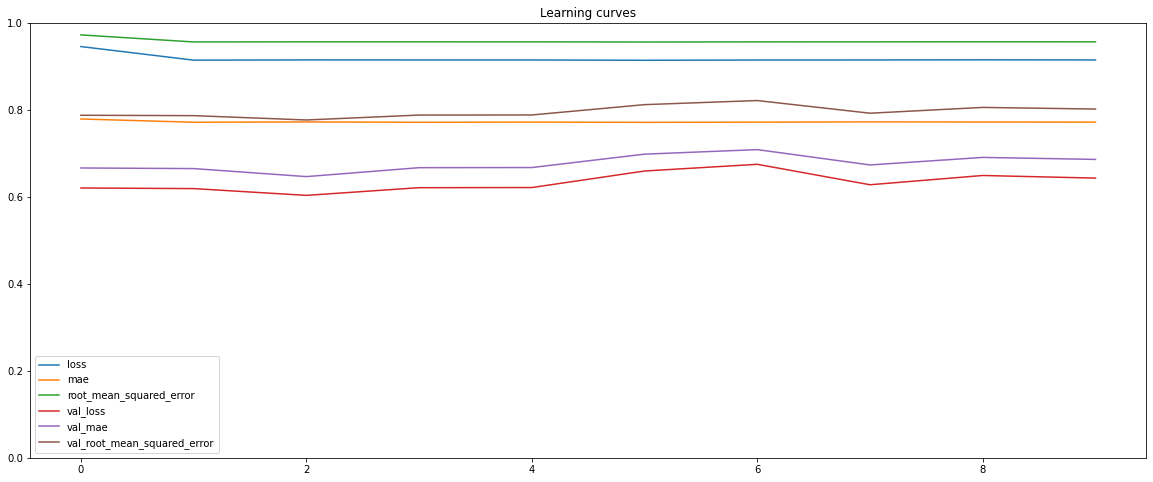

<class 'dict'>
loss [0.9456483125686646, 0.9143826961517334, 0.9149279594421387, 0.9148712158203125, 0.9148070812225342, 0.9140975475311279, 0.914682149887085, 0.914819061756134, 0.9151788949966431, 0.914847195148468]
mae [0.779105007648468, 0.7715829610824585, 0.772304117679596, 0.7715176939964294, 0.7718905806541443, 0.7714303731918335, 0.7717798352241516, 0.7724076509475708, 0.7721124291419983, 0.7718616127967834]
root_mean_squared_error [0.972444474697113, 0.9562336206436157, 0.9565186500549316, 0.9564890265464783, 0.9564554691314697, 0.9560844898223877, 0.9563901424407959, 0.9564617276191711, 0.9566498398780823, 0.9564764499664307]
val_loss [0.6204470992088318, 0.6190245151519775, 0.6034339666366577, 0.6211109757423401, 0.6214655041694641, 0.6594759821891785, 0.6748674511909485, 0.6278625726699829, 0.6491655707359314, 0.643145740032196]
val_mae [0.6664623618125916, 0.6650468707084656, 0.6466201543807983, 0.6671137809753418, 0.6674577593803406, 0.6982281804084778, 0.708666801452636

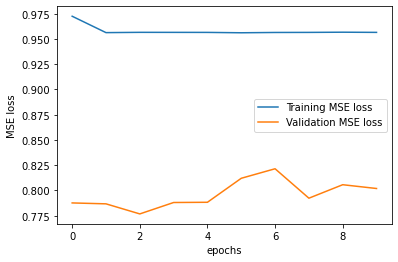

260/260 [==============================] - 0s 1ms/step
r2 score :-0.017063844059275413
Model: "sequential_114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_322 (Dense)           (None, 64)                512       
                                                                 
 dense_323 (Dense)           (None, 64)                4160      
                                                                 
 dense_324 (Dense)           (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


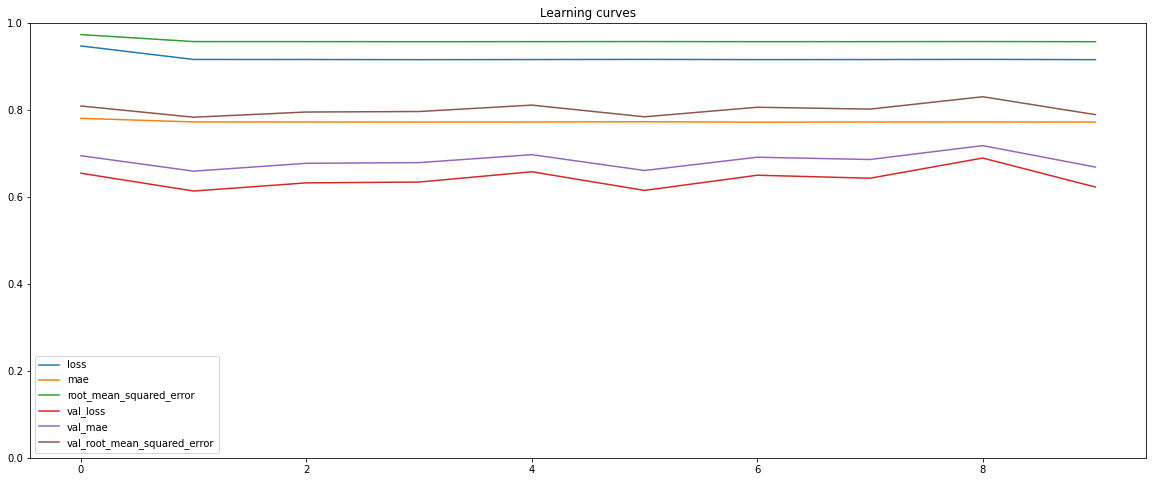

<class 'dict'>
loss [0.9470338225364685, 0.9159529209136963, 0.9158679246902466, 0.9154887199401855, 0.9157480001449585, 0.9161405563354492, 0.9156061410903931, 0.9157394170761108, 0.9161900877952576, 0.915489137172699]
mae [0.7805593013763428, 0.772294819355011, 0.7722815275192261, 0.7719894051551819, 0.7721899151802063, 0.7727639079093933, 0.7717646360397339, 0.7722251415252686, 0.7722718715667725, 0.7720470428466797]
root_mean_squared_error [0.9731566309928894, 0.9570543169975281, 0.9570099115371704, 0.9568117260932922, 0.9569472074508667, 0.9571523070335388, 0.9568731188774109, 0.9569427371025085, 0.9571781754493713, 0.9568119645118713]
val_loss [0.6544009447097778, 0.6134158372879028, 0.6321911811828613, 0.6340746879577637, 0.6577268838882446, 0.6148373484611511, 0.6497746109962463, 0.6428881287574768, 0.6892889142036438, 0.6225875616073608]
val_mae [0.6946029663085938, 0.6590883731842041, 0.6771932244300842, 0.6787918210029602, 0.6969903707504272, 0.6606619954109192, 0.6911998987

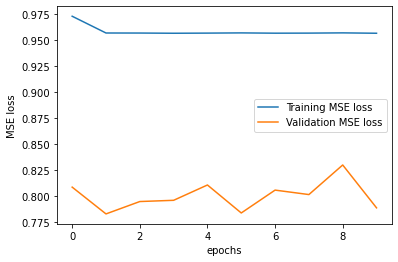

260/260 [==============================] - 0s 1ms/step
r2 score :-0.0038289922493881523
Model: "sequential_115"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_325 (Dense)           (None, 128)               1024      
                                                                 
 dense_326 (Dense)           (None, 128)               16512     
                                                                 
 dense_327 (Dense)           (None, 1)                 129       
                                                                 
Total params: 17,665
Trainable params: 17,665
Non-trainable params: 0
_________________________________________________________________


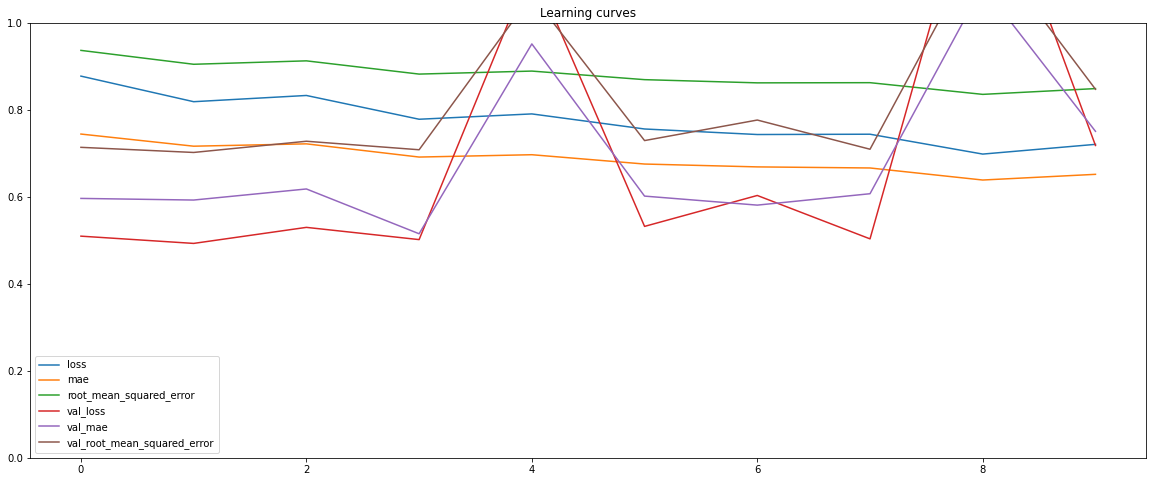

<class 'dict'>
loss [0.8776774406433105, 0.8188570141792297, 0.8331670165061951, 0.778507649898529, 0.7907668352127075, 0.7561019659042358, 0.743374764919281, 0.7440674304962158, 0.698391318321228, 0.720775842666626]
mae [0.74444580078125, 0.716528594493866, 0.7219332456588745, 0.6915606260299683, 0.6969277262687683, 0.6754976511001587, 0.6689292192459106, 0.6664533615112305, 0.6387370824813843, 0.6518438458442688]
root_mean_squared_error [0.9368444085121155, 0.9049071669578552, 0.9127798080444336, 0.8823308348655701, 0.8892506957054138, 0.8695412278175354, 0.8621918559074402, 0.862593412399292, 0.835698127746582, 0.8489851951599121]
val_loss [0.5096674561500549, 0.49298354983329773, 0.5298755764961243, 0.5017349720001221, 1.131934642791748, 0.5321136116981506, 0.6032209992408752, 0.503426194190979, 1.4196152687072754, 0.7181907892227173]
val_mae [0.5964601039886475, 0.5927073359489441, 0.6181839108467102, 0.5151742696762085, 0.9517292976379395, 0.6017665863037109, 0.5810255408287048, 

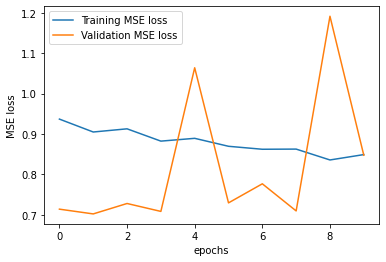

260/260 [==============================] - 0s 1ms/step
r2 score :-0.04983707572287477


In [58]:
ann_2(16,16)
ann_2(32,32)
ann_2(64,64)
ann_2(128,128)

### 3. Model with three hidden layers 
### Optimizer = SGD
### Activation function = 'Sigmoid'

In [59]:
def ann_3(no_of_units1, no_of_units2, no_of_units3):
    ann= Sequential(
                [
                    Dense(no_of_units1,activation='sigmoid'),
                    Dense(no_of_units2,activation='sigmoid'),
                    Dense(no_of_units3,activation='sigmoid'),
                    Dense(1,activation = 'linear')
                ])
    ann.compile(optimizer ='SGD',loss='mse',metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])
    model_store = ann.fit(X_train,Y_train,
              epochs=10,
              batch_size=128,
              verbose=0,
              validation_split=0.2)
    ann.summary()
    training_loss_curves(model_store)
    validation_vs_training(model_store)
    res = ann.evaluate(X_test, Y_test, batch_size=128)
    pred_values= ann.predict(X_test)
    print("r2 score :"+str(skm.r2_score(Y_test,pred_values)))
    

Model: "sequential_116"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_328 (Dense)           (None, 16)                128       
                                                                 
 dense_329 (Dense)           (None, 16)                272       
                                                                 
 dense_330 (Dense)           (None, 16)                272       
                                                                 
 dense_331 (Dense)           (None, 1)                 17        
                                                                 
Total params: 689
Trainable params: 689
Non-trainable params: 0
_________________________________________________________________


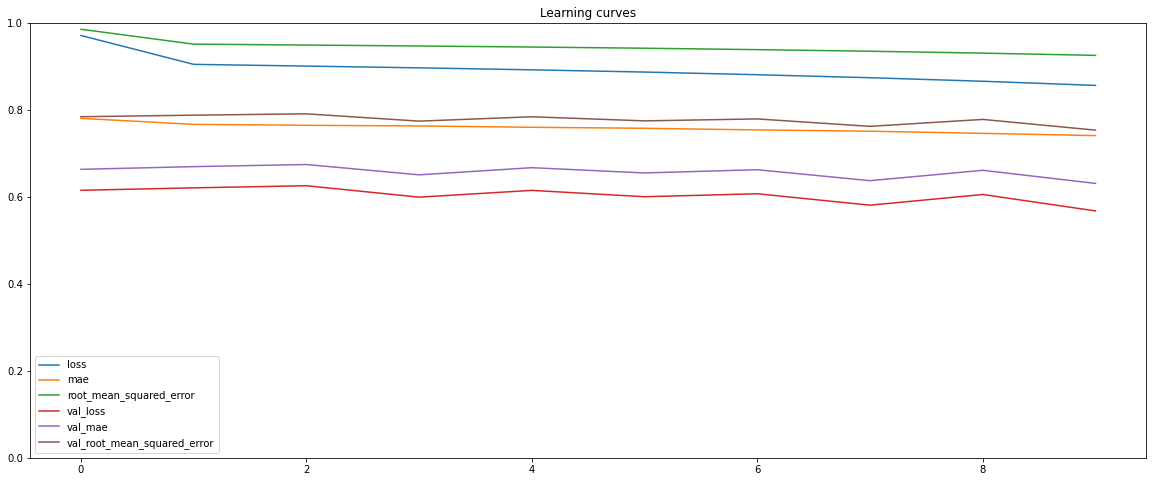

<class 'dict'>
loss [0.9711112976074219, 0.9047356247901917, 0.9007440805435181, 0.8966895937919617, 0.8921328783035278, 0.8870114088058472, 0.8808748126029968, 0.8739973306655884, 0.865854024887085, 0.8563299179077148]
mae [0.7805661559104919, 0.7667321562767029, 0.7645984292030334, 0.7630711197853088, 0.759993851184845, 0.7577221989631653, 0.7539281845092773, 0.7510005235671997, 0.746033251285553, 0.7409055829048157]
root_mean_squared_error [0.9854497909545898, 0.9511759281158447, 0.9490754008293152, 0.9469369649887085, 0.9445278644561768, 0.9418128132820129, 0.9385493397712708, 0.9348782300949097, 0.9305127859115601, 0.9253809452056885]
val_loss [0.6151249408721924, 0.6207594275474548, 0.625586748123169, 0.5993691086769104, 0.61491459608078, 0.6002928614616394, 0.6071778535842896, 0.5809100866317749, 0.6054756045341492, 0.567699670791626]
val_mae [0.6633387207984924, 0.6695122122764587, 0.6744091510772705, 0.6506651639938354, 0.6671124696731567, 0.6549983620643616, 0.662449777126312

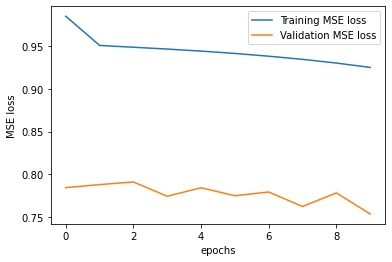

260/260 [==============================] - 0s 1ms/step
r2 score :0.07868798660587395
###############################################################
Model: "sequential_117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_332 (Dense)           (None, 32)                256       
                                                                 
 dense_333 (Dense)           (None, 32)                1056      
                                                                 
 dense_334 (Dense)           (None, 32)                1056      
                                                                 
 dense_335 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


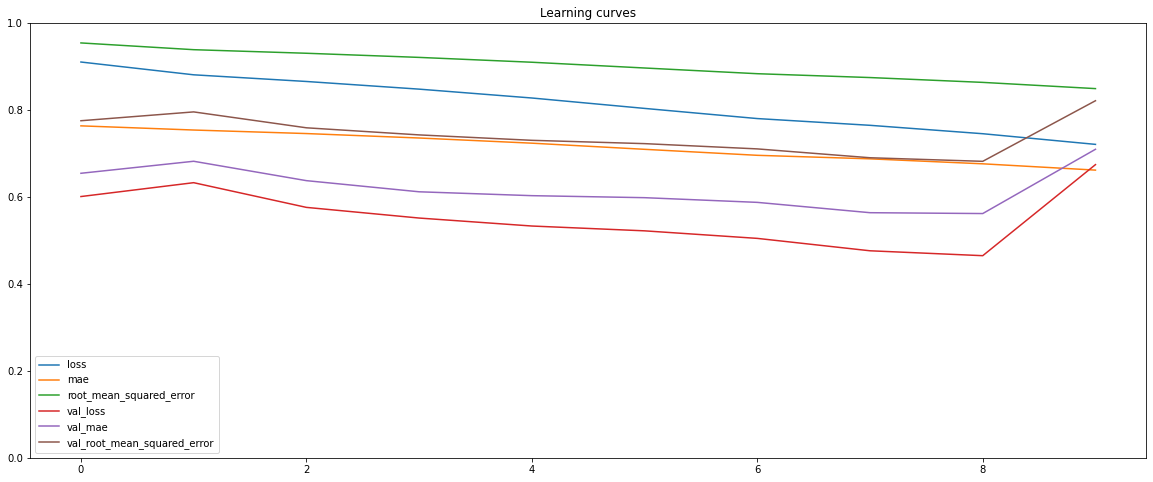

<class 'dict'>
loss [0.9100915789604187, 0.880692183971405, 0.8653509616851807, 0.8477333784103394, 0.8273599743843079, 0.8034248948097229, 0.7800679206848145, 0.7645406723022461, 0.7452207803726196, 0.7207143306732178]
mae [0.7633040547370911, 0.753713071346283, 0.7455990314483643, 0.7353649735450745, 0.7234772443771362, 0.7093536853790283, 0.6955691576004028, 0.687460720539093, 0.6760252118110657, 0.6615291833877563]
root_mean_squared_error [0.953987181186676, 0.9384520053863525, 0.9302424192428589, 0.9207243919372559, 0.9095932841300964, 0.8963397145271301, 0.88321453332901, 0.8743801712989807, 0.8632616996765137, 0.8489489555358887]
val_loss [0.6007527112960815, 0.6326349973678589, 0.5758354663848877, 0.5513156056404114, 0.5329756736755371, 0.5218942761421204, 0.5045462250709534, 0.4760305881500244, 0.46476417779922485, 0.6741628646850586]
val_mae [0.654245138168335, 0.681879460811615, 0.637313723564148, 0.6116889119148254, 0.6027771830558777, 0.5981471538543701, 0.5873583555221558

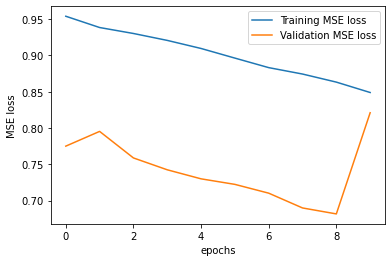

260/260 [==============================] - 0s 1ms/step
r2 score :-0.032521134189088086
###############################################################
Model: "sequential_118"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_336 (Dense)           (None, 64)                512       
                                                                 
 dense_337 (Dense)           (None, 64)                4160      
                                                                 
 dense_338 (Dense)           (None, 64)                4160      
                                                                 
 dense_339 (Dense)           (None, 1)                 65        
                                                                 
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


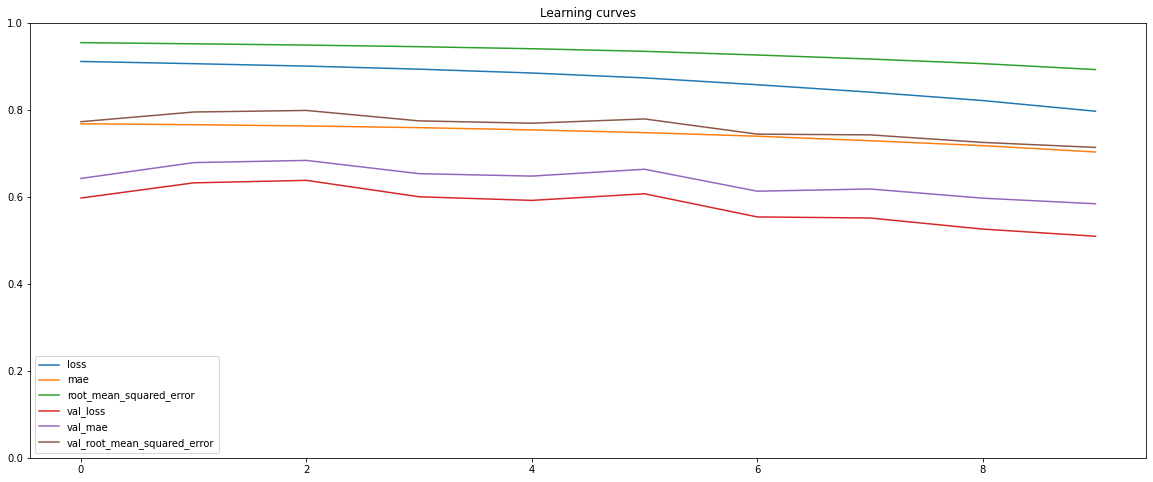

<class 'dict'>
loss [0.9113724231719971, 0.9062774777412415, 0.9007114171981812, 0.8936569690704346, 0.8848153948783875, 0.8735538125038147, 0.8578514456748962, 0.8408028483390808, 0.8214830160140991, 0.7969603538513184]
mae [0.7680469155311584, 0.7659956812858582, 0.7630883455276489, 0.7591723799705505, 0.7539990544319153, 0.7477222681045532, 0.7394689917564392, 0.7291225790977478, 0.7178028225898743, 0.703216016292572]
root_mean_squared_error [0.9546582698822021, 0.9519860744476318, 0.9490581750869751, 0.9453343152999878, 0.9406462907791138, 0.9346410036087036, 0.9262027144432068, 0.9169530272483826, 0.9063569903373718, 0.8927263617515564]
val_loss [0.5973405241966248, 0.6322444081306458, 0.6380144953727722, 0.6002652645111084, 0.5919070839881897, 0.6071449518203735, 0.5538734197616577, 0.5514234900474548, 0.5259267091751099, 0.5094060301780701]
val_mae [0.6424002647399902, 0.6787680387496948, 0.6838642954826355, 0.6533687710762024, 0.6477736830711365, 0.6635029315948486, 0.613028943

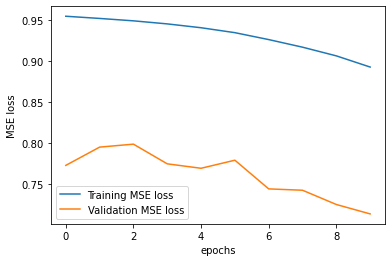

260/260 [==============================] - 0s 1ms/step
r2 score :0.17601535629732767
###############################################################
Model: "sequential_119"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_340 (Dense)           (None, 128)               1024      
                                                                 
 dense_341 (Dense)           (None, 128)               16512     
                                                                 
 dense_342 (Dense)           (None, 128)               16512     
                                                                 
 dense_343 (Dense)           (None, 1)                 129       
                                                                 
Total params: 34,177
Trainable params: 34,177
Non-trainable params: 0
_________________________________________________________________


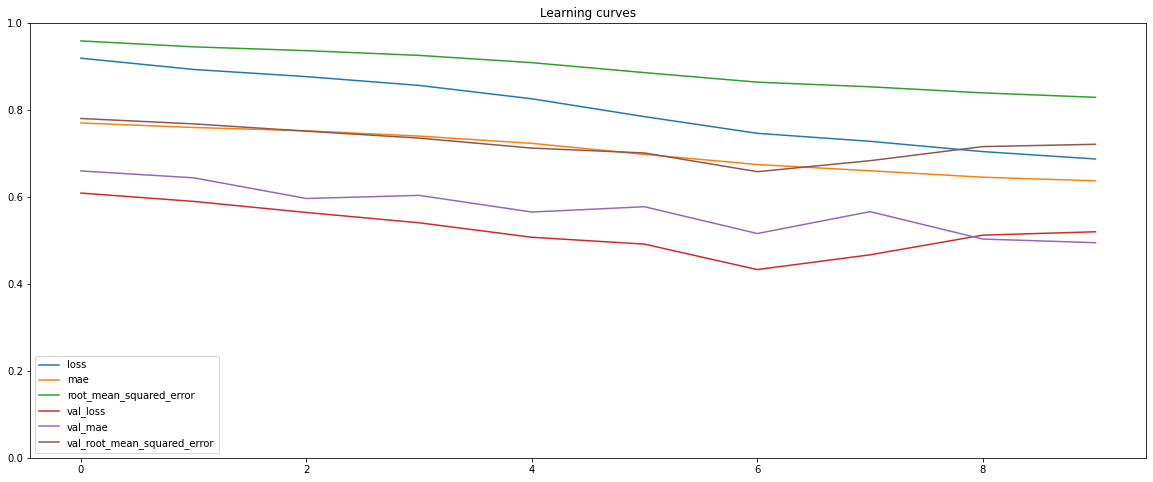

<class 'dict'>
loss [0.9188681244850159, 0.893010675907135, 0.8765010833740234, 0.8562749624252319, 0.8255754709243774, 0.7844921350479126, 0.7461521625518799, 0.7277814149856567, 0.704127848148346, 0.687116265296936]
mae [0.7699102163314819, 0.7595633268356323, 0.75191330909729, 0.7397400140762329, 0.7230595350265503, 0.6977207660675049, 0.6743718385696411, 0.6600706577301025, 0.6451743245124817, 0.6369364261627197]
root_mean_squared_error [0.9585760831832886, 0.9449924230575562, 0.9362163543701172, 0.9253512620925903, 0.9086118340492249, 0.8857156038284302, 0.8638010025024414, 0.8531010746955872, 0.8391232490539551, 0.8289247751235962]
val_loss [0.608745813369751, 0.5896012187004089, 0.5641198754310608, 0.5404358506202698, 0.5071302652359009, 0.4913199543952942, 0.43285366892814636, 0.4667498767375946, 0.5120067000389099, 0.5197548270225525]
val_mae [0.659602165222168, 0.6438539624214172, 0.5962648987770081, 0.6034606695175171, 0.5651493668556213, 0.5772994756698608, 0.51567578315734

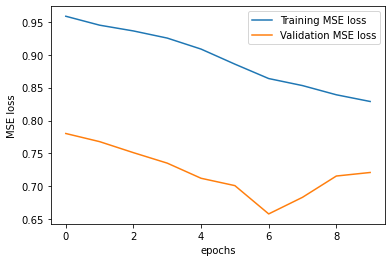

260/260 [==============================] - 0s 1ms/step
r2 score :0.06021087386877566


In [60]:
ann_3(16,16,16)
print("###############################################################")
ann_3(32,32,32)
print("###############################################################")
ann_3(64,64,64)
print("###############################################################")
ann_3(128,128,128)

### 4. Model with 1 hidden layer
### Optimizer = SGD
### Activation Function = ReLU

In [61]:
def ann_4(no_of_units1):
    ann= Sequential(
                [
                    Dense(no_of_units1,activation='relu'),
                    Dense(1,activation = 'linear')
                ])
    ann.compile(optimizer ='SGD',loss='mse',metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])
    model_store = ann.fit(X_train,Y_train,
              epochs=10,
              batch_size=128,
              verbose=0,
              validation_split=0.2)
    ann.summary()
    training_loss_curves(model_store)
    validation_vs_training(model_store)
    res = ann.evaluate(X_test, Y_test, batch_size=128)
    pred_values= ann.predict(X_test)
    print("r2 score :"+str(skm.r2_score(Y_test,pred_values)))

Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_344 (Dense)           (None, 16)                128       
                                                                 
 dense_345 (Dense)           (None, 1)                 17        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


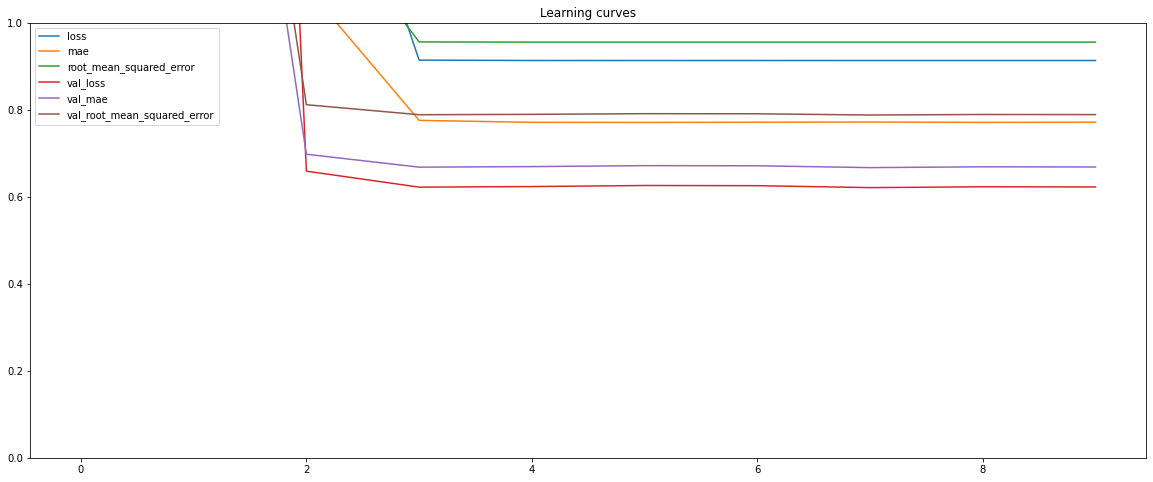

<class 'dict'>
loss [43807744.0, 603.2443237304688, 1.6838208436965942, 0.9145051836967468, 0.9135995507240295, 0.9135619401931763, 0.9135820865631104, 0.913608968257904, 0.9136108160018921, 0.9136074781417847]
mae [1007.9283447265625, 18.376047134399414, 1.0822229385375977, 0.7758873701095581, 0.7714083790779114, 0.77116459608078, 0.7716217041015625, 0.7721377611160278, 0.7712488770484924, 0.7717224955558777]
root_mean_squared_error [6618.74169921875, 24.561033248901367, 1.297621250152588, 0.9562976360321045, 0.9558240175247192, 0.9558043479919434, 0.9558148980140686, 0.9558289647102356, 0.955829918384552, 0.9558281898498535]
val_loss [3943.990966796875, 6.392682075500488, 0.6591818928718567, 0.6223847270011902, 0.6237042546272278, 0.6261419057846069, 0.6257445216178894, 0.6212844848632812, 0.6232234239578247, 0.6227733492851257]
val_mae [62.79645919799805, 2.418851137161255, 0.6980206370353699, 0.668344259262085, 0.6695986390113831, 0.6718547344207764, 0.6714920401573181, 0.667282879

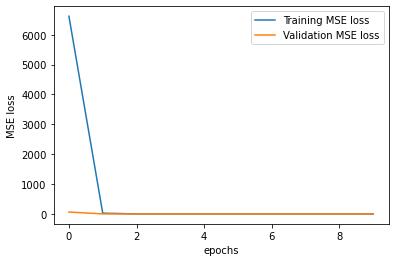

260/260 [==============================] - 0s 1ms/step
r2 score :-0.003918994377436702
####################################################################
Model: "sequential_121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_346 (Dense)           (None, 32)                256       
                                                                 
 dense_347 (Dense)           (None, 1)                 33        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


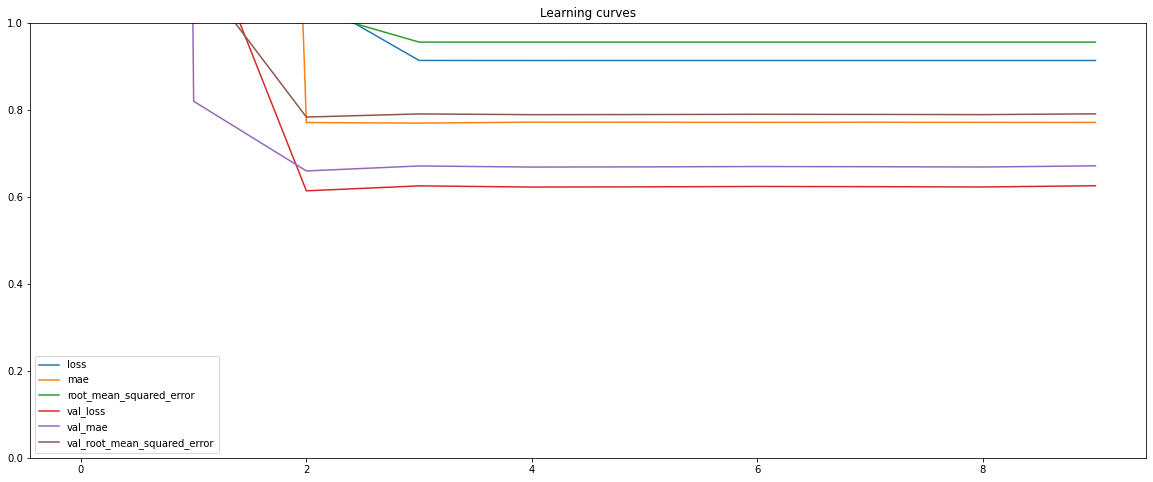

<class 'dict'>
loss [8675415.0, 120.73136901855469, 1.0625951290130615, 0.9136978387832642, 0.9135793447494507, 0.9136072993278503, 0.9136106371879578, 0.9135830402374268, 0.9135969877243042, 0.9136090278625488]
mae [449.0108337402344, 8.198614120483398, 0.7709593772888184, 0.7696009278297424, 0.7718376517295837, 0.7715737223625183, 0.7713736295700073, 0.7715713977813721, 0.7713732123374939, 0.7711660265922546]
root_mean_squared_error [2945.40576171875, 10.98778247833252, 1.030822515487671, 0.9558754563331604, 0.955813467502594, 0.955828070640564, 0.9558297991752625, 0.9558153748512268, 0.9558226466178894, 0.9558289647102356]
val_loss [771.4971923828125, 1.2676118612289429, 0.6139113903045654, 0.6252880692481995, 0.6225770711898804, 0.6230409741401672, 0.6239230036735535, 0.6234628558158875, 0.6227306127548218, 0.62559574842453]
val_mae [27.76511573791504, 0.8198670744895935, 0.6596428155899048, 0.6710726618766785, 0.6685280203819275, 0.6689705848693848, 0.6698045134544373, 0.669370651

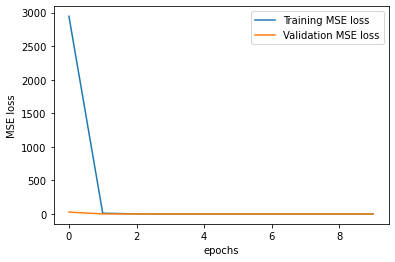

260/260 [==============================] - 0s 1ms/step
r2 score :-0.005368458789713815
####################################################################
Model: "sequential_122"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_348 (Dense)           (None, 64)                512       
                                                                 
 dense_349 (Dense)           (None, 1)                 65        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


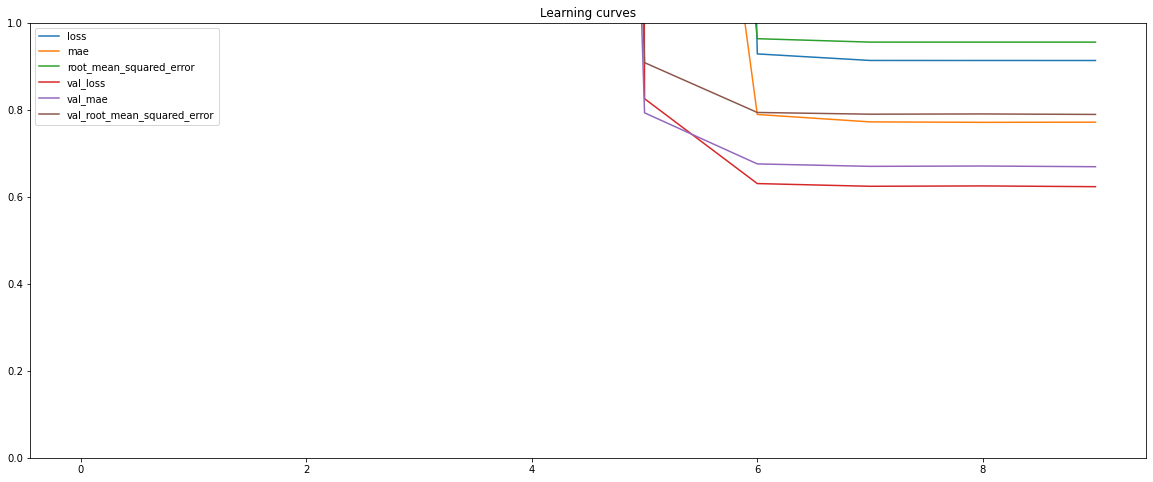

<class 'dict'>
loss [2.5595184149639987e+17, 4402797608960.0, 5601880576.0, 7127549.5, 9070.6005859375, 12.445585250854492, 0.9287312030792236, 0.9136816263198853, 0.913608968257904, 0.9135984778404236]
mae [79422640.0, 1571064.75, 56039.828125, 1998.9342041015625, 71.30713653564453, 2.7123732566833496, 0.7894896268844604, 0.7724183201789856, 0.7713868618011475, 0.7717611789703369]
root_mean_squared_error [505916832.0, 2098284.5, 74845.7109375, 2669.7470703125, 95.23970031738281, 3.527830123901367, 0.9637070298194885, 0.9558669328689575, 0.9558289647102356, 0.9558234810829163]
val_loss [28674740977664.0, 36484243456.0, 46422832.0, 59149.89453125, 78.61302947998047, 0.8256834745407104, 0.6305785179138184, 0.6243271231651306, 0.6251716017723083, 0.6234409809112549]
val_mae [5354880.0, 191008.5, 6813.43017578125, 243.20626831054688, 8.832755088806152, 0.7932254076004028, 0.6758057475090027, 0.6701825261116028, 0.6709653735160828, 0.6693499088287354]
val_root_mean_squared_error [5354880.0,

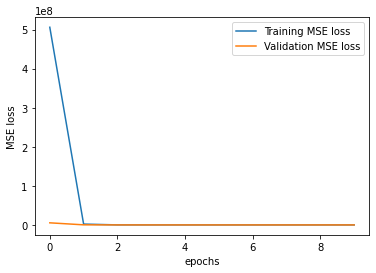

260/260 [==============================] - 0s 1ms/step
r2 score :-0.004247483395274587
####################################################################
Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_350 (Dense)           (None, 128)               1024      
                                                                 
 dense_351 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


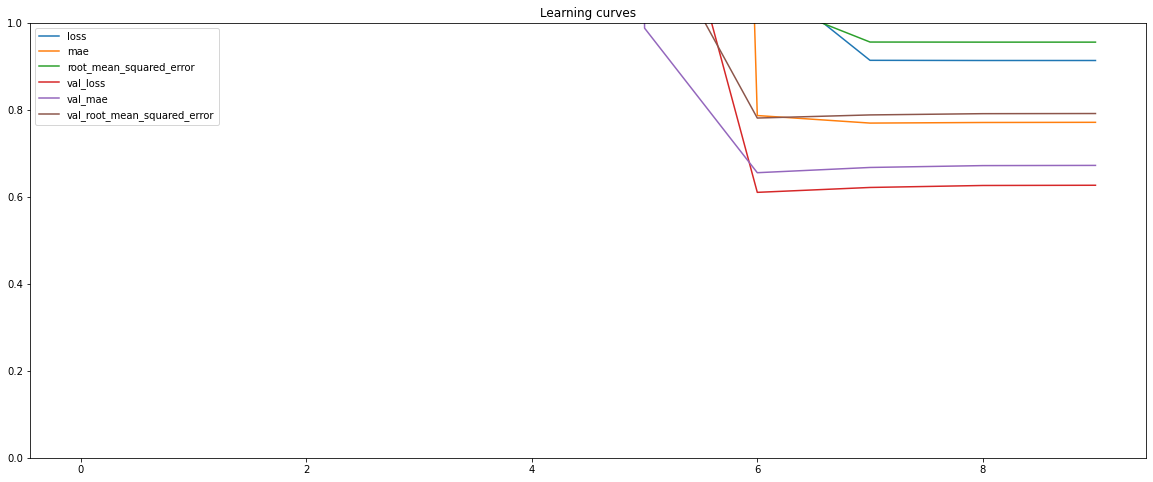

<class 'dict'>
loss [3.6190647879351665e+18, 61011872710656.0, 77628252160.0, 98769840.0, 125671.125, 160.73654174804688, 1.1209443807601929, 0.9139875173568726, 0.913595974445343, 0.9135752320289612]
mae [289209408.0, 5848398.0, 208612.09375, 7441.18115234375, 265.4258728027344, 9.465401649475098, 0.7870137095451355, 0.7696834802627563, 0.771034836769104, 0.7714406251907349]
root_mean_squared_error [1902384000.0, 7811009.5, 278618.46875, 9938.3017578125, 354.501220703125, 12.678191184997559, 1.058746576309204, 0.9560269713401794, 0.9558221697807312, 0.9558113217353821]
val_loss [397360744103936.0, 505580290048.0, 643264320.0, 818156.8125, 1030.7713623046875, 1.5716056823730469, 0.6103920936584473, 0.6216391921043396, 0.6261879205703735, 0.6267128586769104]
val_mae [19933908.0, 711041.625, 25362.65234375, 904.5199584960938, 32.096343994140625, 0.9880160093307495, 0.6555717587471008, 0.6676264405250549, 0.6718966364860535, 0.6723728775978088]
val_root_mean_squared_error [19933910.0, 711

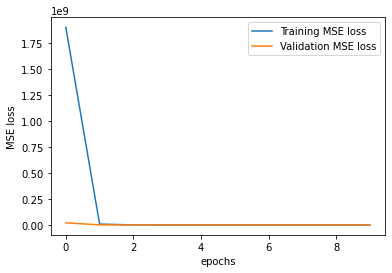

260/260 [==============================] - 0s 1ms/step
r2 score :-0.005983576219114939


In [62]:
ann_4(16)
print("####################################################################")
ann_4(32)
print("####################################################################")
ann_4(64)
print("####################################################################")
ann_4(128)


### 5. Model with 2  hidden layers
### Optimizer = SGD
### Activation function = ReLU

In [66]:

def ann_5(no_of_units1,no_of_units2):
    ann= Sequential(
                [
                    Dense(no_of_units1,activation='relu'),
                    Dense(no_of_units2,activation = 'relu'),
                    Dense(1,activation = 'linear')
                ])
    ann.compile(optimizer ='SGD',loss='mse',metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])
    model_store = ann.fit(X_train,Y_train,
              epochs=10,
              batch_size=128,
              verbose=0,
              validation_split=0.2)
    ann.summary()
    training_loss_curves(model_store)
    validation_vs_training(model_store)
    res = ann.evaluate(X_test, Y_test, batch_size=128)
    pred_values= ann.predict(X_test)
    print("r2 score :"+str(skm.r2_score(Y_test,pred_values)))

Model: "sequential_126"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_360 (Dense)           (None, 16)                128       
                                                                 
 dense_361 (Dense)           (None, 16)                272       
                                                                 
 dense_362 (Dense)           (None, 1)                 17        
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


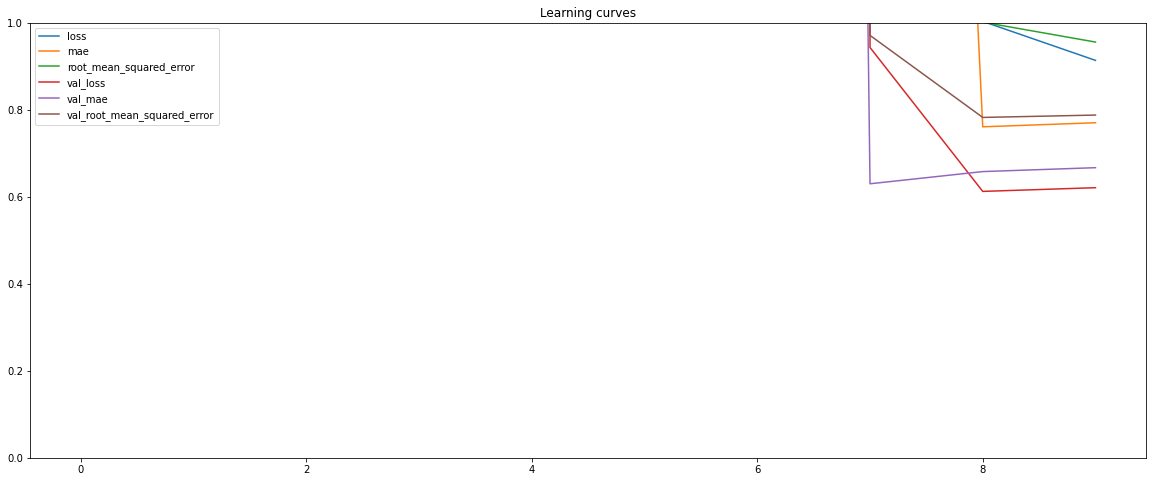

<class 'dict'>
loss [1.1096320402974333e+24, 1.5917059188778336e+19, 2.0251977686450176e+16, 25767524171776.0, 32785131520.0, 41714036.0, 53075.421875, 68.5155029296875, 1.003547191619873, 0.9138864278793335]
mae [160417120256.0, 2987176704.0, 106552496.0, 3800721.25, 135571.40625, 4835.82568359375, 172.49452209472656, 6.151608943939209, 0.7611137628555298, 0.7704192399978638]
root_mean_squared_error [1053390733312.0, 3989618944.0, 142309440.0, 5076172.0, 181066.65625, 6458.640625, 230.38104248046875, 8.277409553527832, 1.0017720460891724, 0.9559741020202637]
val_loss [1.0366527239379065e+20, 1.3189797321375744e+17, 167819907956736.0, 213524381696.0, 271671360.0, 345472.65625, 433.3659973144531, 0.9434956312179565, 0.6125918626785278, 0.621109664440155]
val_mae [10181610496.0, 363177728.0, 12954529.0, 462087.0, 16482.45703125, 587.7686767578125, 20.80313491821289, 0.6301388740539551, 0.6581531763076782, 0.6671129465103149]
val_root_mean_squared_error [10181614592.0, 363177600.0, 129545

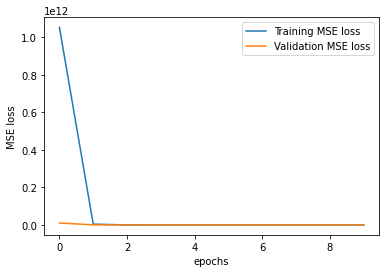

260/260 [==============================] - 0s 1ms/step
r2 score :-0.0031421015744867997
############################################################################
Model: "sequential_127"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_363 (Dense)           (None, 32)                256       
                                                                 
 dense_364 (Dense)           (None, 32)                1056      
                                                                 
 dense_365 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


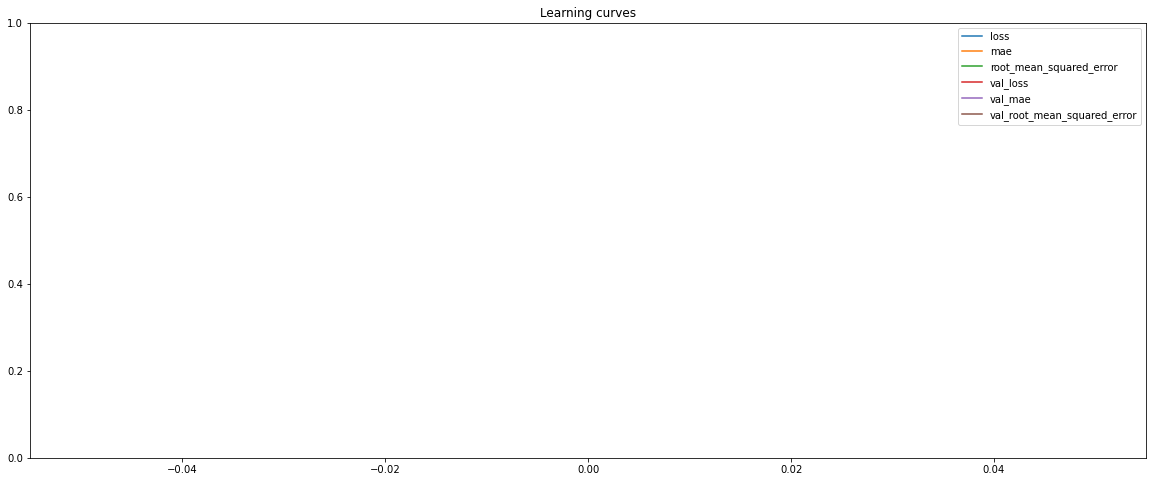

<class 'dict'>
loss [2.287699894415367e+31, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mae [635158487105536.0, nan, nan, nan, nan, nan, nan, nan, nan, nan]
root_mean_squared_error [4782990471200768.0, nan, nan, nan, nan, nan, nan, nan, nan, nan]
val_loss [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
val_mae [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
val_root_mean_squared_error [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


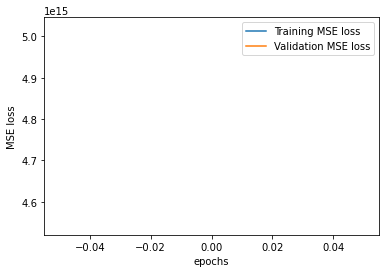

260/260 [==============================] - 0s 1ms/step


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [67]:
ann_5(16,16)
print("############################################################################")
ann_5(32,32)
print("############################################################################")
ann_5(64,64)
print("############################################################################")
ann_5(128,128)

### 6. Model with 3  hidden layers
### Optimizer = SGD
### Activation function = ReLU

In [ ]:
def ann_6(no_of_units1,no_of_units2,no_of_units3):
    ann= Sequential(
                [
                    Dense(no_of_units1,activation='relu'),
                    Dense(no_of_units2,activation = 'relu'),
                    Dense(no_of_units3,activation='relu'),
                    Dense(1,activation = 'linear')
                ])
    ann.compile(optimizer ='SGD',loss='mse',metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])
    model_store = ann.fit(X_train,Y_train,
              epochs=10,
              batch_size=128,
              verbose=0,
              validation_split=0.2)
    ann.summary()
    training_loss_curves(model_store)
    validation_vs_training(model_store)
    res = ann.evaluate(X_test, Y_test, batch_size=128)
    pred_values= ann.predict(X_test)
    print("r2 score :"+str(skm.r2_score(Y_test,pred_values)))

Model: "sequential_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_366 (Dense)           (None, 16)                128       
                                                                 
 dense_367 (Dense)           (None, 16)                272       
                                                                 
 dense_368 (Dense)           (None, 16)                272       
                                                                 
 dense_369 (Dense)           (None, 1)                 17        
                                                                 
Total params: 689
Trainable params: 689
Non-trainable params: 0
_________________________________________________________________


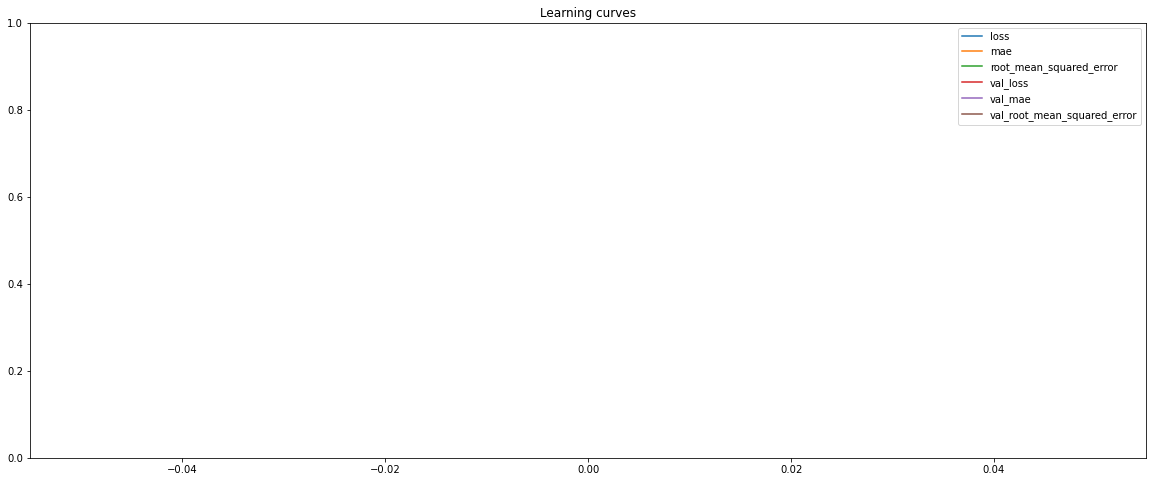

<class 'dict'>
loss [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mae [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
root_mean_squared_error [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
val_loss [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
val_mae [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
val_root_mean_squared_error [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


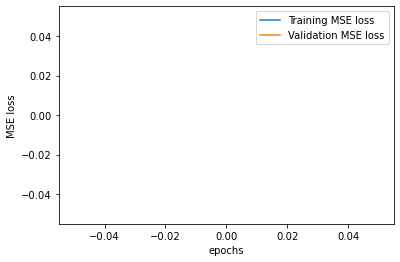

260/260 [==============================] - 0s 1ms/step


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [68]:
ann_6(16,16,16)
print('####################################################################')
ann_6(32,32,32)
print('####################################################################')
ann_6(64,64,64)
print('####################################################################')
ann_6(128,128,128)

### 7.  Model with 1 hidden layer
###     Optimizer = 'Adam'
###     Activation function = 'sigmoid', 'relu'
###     No of units = 16,32,64,128

In [69]:
def ann_7(no_of_units1,activation_func):
    print("No of units : "+ str(no_of_units1)+",  Activation function : "+activation_func)
    ann= Sequential(
                [
                    Dense(no_of_units1,activation=activation_func),
                    Dense(1,activation = 'linear')
                ])
    ann.compile(optimizer ='Adam',loss='mse',metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])
    model_store = ann.fit(X_train,Y_train,
              epochs=10,
              batch_size=128,
              verbose=0,
              validation_split=0.2)
    ann.summary()
    training_loss_curves(model_store)
    validation_vs_training(model_store)
    res = ann.evaluate(X_test, Y_test, batch_size=128)
    pred_values= ann.predict(X_test)
    print("r2 score :"+str(skm.r2_score(Y_test,pred_values)))

No of units : 16,  Activation function : sigmoid
Model: "sequential_129"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_370 (Dense)           (None, 16)                128       
                                                                 
 dense_371 (Dense)           (None, 1)                 17        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


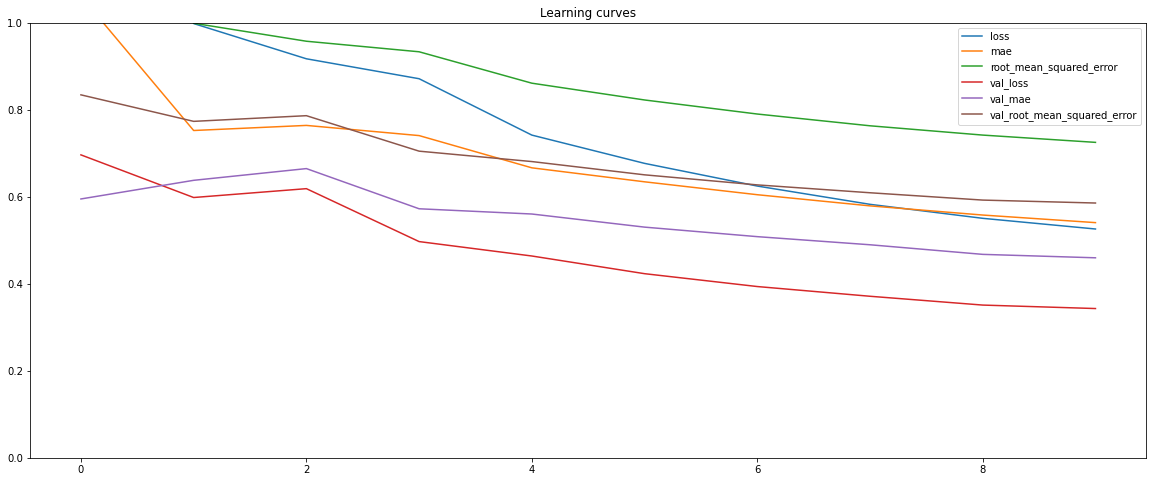

<class 'dict'>
loss [2.076760768890381, 0.9985896944999695, 0.917532742023468, 0.8716715574264526, 0.7420563101768494, 0.677032470703125, 0.6248735189437866, 0.5828453302383423, 0.550676167011261, 0.5261216163635254]
mae [1.061411738395691, 0.7526097297668457, 0.7643240690231323, 0.7409142851829529, 0.6667917966842651, 0.6346339583396912, 0.6049641370773315, 0.5792989730834961, 0.5582106709480286, 0.5407757759094238]
root_mean_squared_error [1.4410970211029053, 0.9992945790290833, 0.9578793048858643, 0.9336335062980652, 0.8614268898963928, 0.8228198289871216, 0.7904894351959229, 0.7634430527687073, 0.7420755624771118, 0.7253423929214478]
val_loss [0.69658362865448, 0.5985171794891357, 0.618884265422821, 0.497181236743927, 0.4640374779701233, 0.4233824908733368, 0.39380013942718506, 0.37144142389297485, 0.35118424892425537, 0.34322619438171387]
val_mae [0.5952048897743225, 0.6380563378334045, 0.6650290489196777, 0.5726318359375, 0.5605831742286682, 0.5304339528083801, 0.5085285902023315

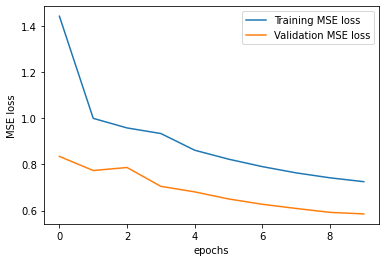

260/260 [==============================] - 0s 1ms/step
r2 score :0.4375026503260868
########################################################################################
No of units : 32,  Activation function : sigmoid
Model: "sequential_130"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_372 (Dense)           (None, 32)                256       
                                                                 
 dense_373 (Dense)           (None, 1)                 33        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


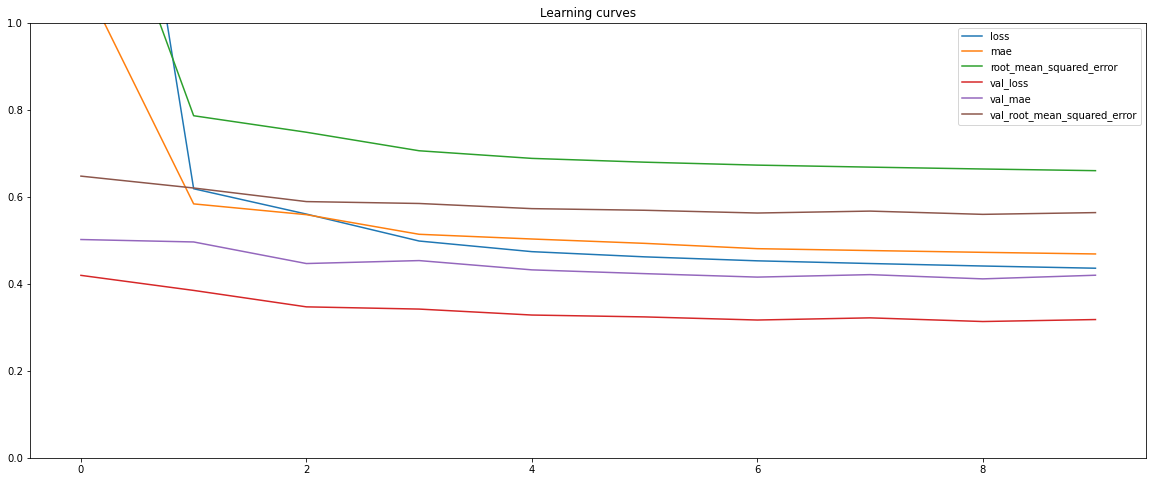

<class 'dict'>
loss [2.2340691089630127, 0.6186961531639099, 0.5604349374771118, 0.49848678708076477, 0.4740395247936249, 0.4621073305606842, 0.4529363811016083, 0.44675180315971375, 0.4410233199596405, 0.43593913316726685]
mae [1.108955979347229, 0.5838605165481567, 0.5590810179710388, 0.5139636993408203, 0.5031309723854065, 0.4931345283985138, 0.48088592290878296, 0.4765756130218506, 0.47246405482292175, 0.46873152256011963]
root_mean_squared_error [1.4946802854537964, 0.7865723967552185, 0.7486220002174377, 0.7060359716415405, 0.6885052919387817, 0.6797847747802734, 0.6730054616928101, 0.668394923210144, 0.6640958786010742, 0.6602568626403809]
val_loss [0.41952309012413025, 0.38489794731140137, 0.3470951020717621, 0.3419916033744812, 0.3282776474952698, 0.32399219274520874, 0.3168145716190338, 0.32180142402648926, 0.3133682608604431, 0.3179090619087219]
val_mae [0.5019205212593079, 0.49631693959236145, 0.4467063248157501, 0.45350250601768494, 0.43216150999069214, 0.4234805405139923,

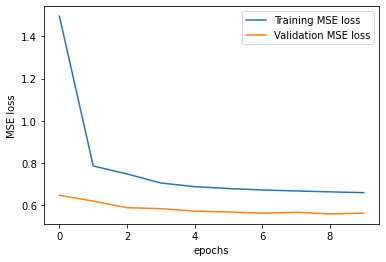

260/260 [==============================] - 0s 1ms/step
r2 score :0.4721477042150234
########################################################################################
No of units : 64,  Activation function : sigmoid
Model: "sequential_131"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_374 (Dense)           (None, 64)                512       
                                                                 
 dense_375 (Dense)           (None, 1)                 65        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


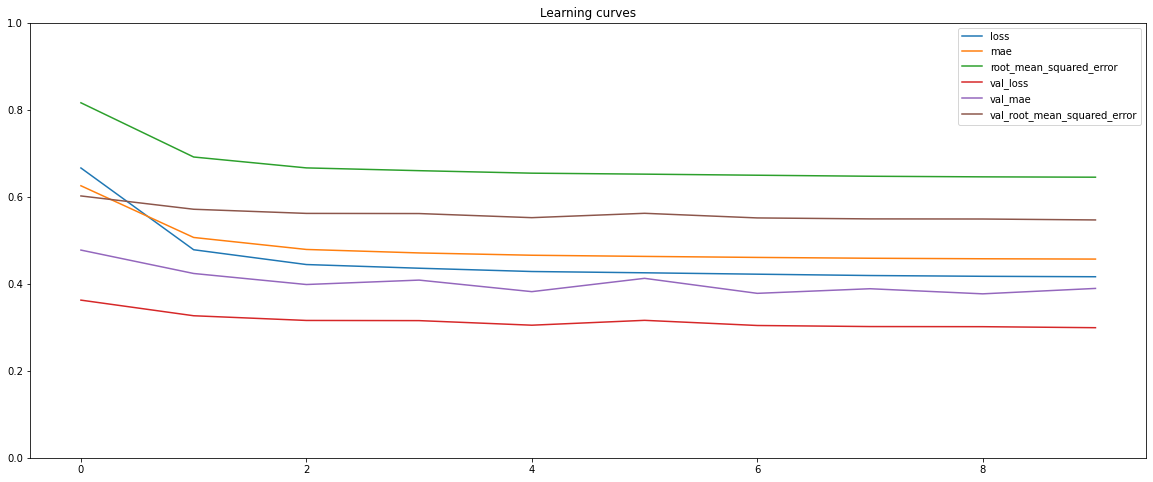

<class 'dict'>
loss [0.6664201617240906, 0.47842031717300415, 0.4443955421447754, 0.43592697381973267, 0.4283665120601654, 0.42542994022369385, 0.4222102761268616, 0.4191548824310303, 0.4173600673675537, 0.41633352637290955]
mae [0.6255465745925903, 0.5066513419151306, 0.47908341884613037, 0.47107774019241333, 0.4657876193523407, 0.4631069004535675, 0.46077799797058105, 0.45886877179145813, 0.4576774537563324, 0.45695242285728455]
root_mean_squared_error [0.8163456320762634, 0.6916793584823608, 0.6666299700737, 0.6602476835250854, 0.6544971466064453, 0.6522499322891235, 0.6497771143913269, 0.6474217176437378, 0.6460341215133667, 0.6452391147613525]
val_loss [0.3625640869140625, 0.32665038108825684, 0.31583836674690247, 0.31543833017349243, 0.3049105405807495, 0.31609535217285156, 0.30424314737319946, 0.3017948567867279, 0.3015027940273285, 0.2991635203361511]
val_mae [0.4776545763015747, 0.42382919788360596, 0.39846518635749817, 0.40860775113105774, 0.3820750117301941, 0.41267442703247

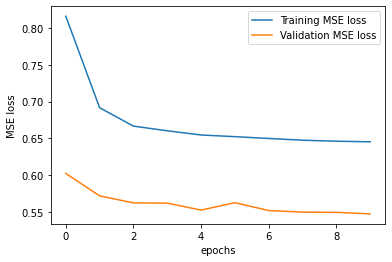

260/260 [==============================] - 0s 1ms/step
r2 score :0.5013131232613568
########################################################################################
No of units : 128,  Activation function : sigmoid
Model: "sequential_132"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_376 (Dense)           (None, 128)               1024      
                                                                 
 dense_377 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


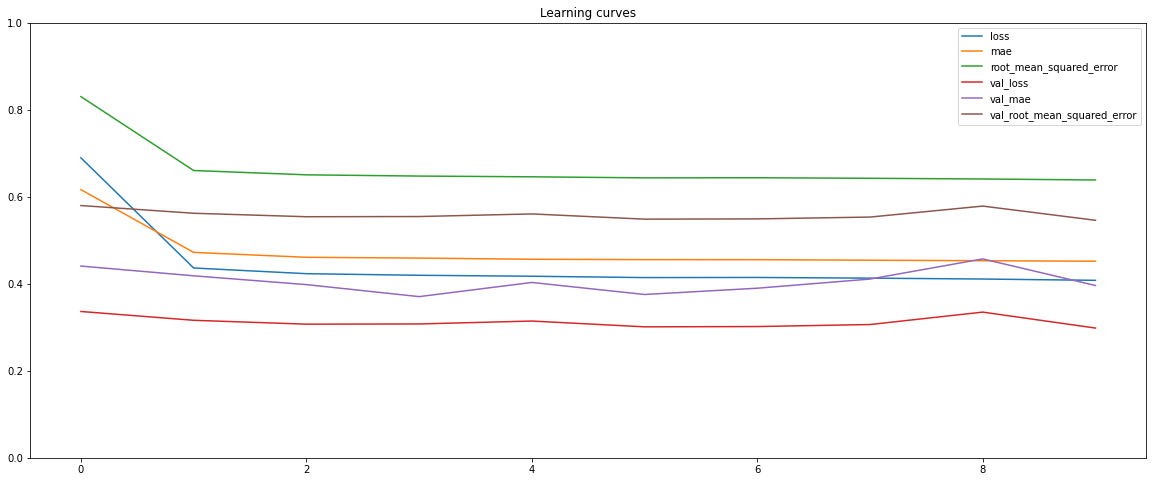

<class 'dict'>
loss [0.6897369623184204, 0.43644586205482483, 0.42338377237319946, 0.4196946918964386, 0.41749992966651917, 0.4144054055213928, 0.41469845175743103, 0.4131130278110504, 0.41106486320495605, 0.40809476375579834]
mae [0.616592288017273, 0.47237271070480347, 0.46104058623313904, 0.4592590928077698, 0.45653200149536133, 0.455714613199234, 0.45555636286735535, 0.4543536901473999, 0.45318761467933655, 0.4520285427570343]
root_mean_squared_error [0.8305040597915649, 0.6606404781341553, 0.6506794691085815, 0.6478384733200073, 0.6461423635482788, 0.6437432765960693, 0.6439708471298218, 0.6427386999130249, 0.6411433815956116, 0.6388229727745056]
val_loss [0.33646276593208313, 0.3161891996860504, 0.30728957056999207, 0.30777713656425476, 0.31447774171829224, 0.30115804076194763, 0.3018103837966919, 0.3064441680908203, 0.3350188732147217, 0.298330157995224]
val_mae [0.44089627265930176, 0.41848140954971313, 0.39826804399490356, 0.3706267774105072, 0.4031975567340851, 0.375532001256

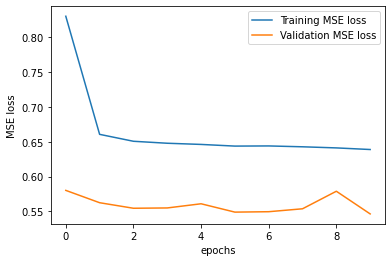

260/260 [==============================] - 0s 1ms/step
r2 score :0.5051408197780551
########################################################################################
No of units : 16,  Activation function : relu
Model: "sequential_133"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_378 (Dense)           (None, 16)                128       
                                                                 
 dense_379 (Dense)           (None, 1)                 17        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


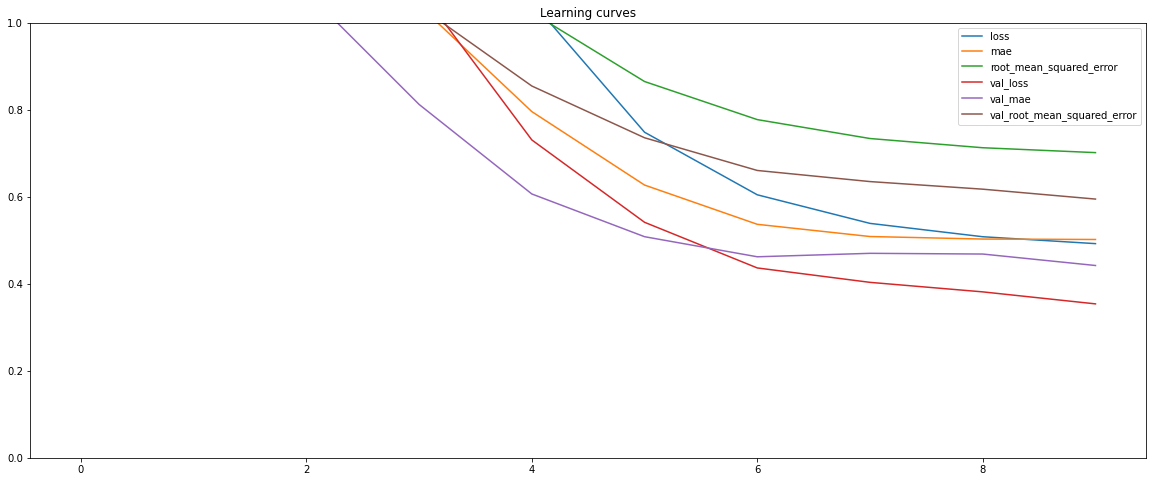

<class 'dict'>
loss [765.7217407226562, 4.123030662536621, 2.6574134826660156, 1.6363413333892822, 1.0487185716629028, 0.7486387491226196, 0.6047542095184326, 0.5390183329582214, 0.5083341002464294, 0.49246206879615784]
mae [20.00151252746582, 1.7136269807815552, 1.3618603944778442, 1.0405477285385132, 0.7960649132728577, 0.6271567940711975, 0.5369038581848145, 0.5088223814964294, 0.5030159950256348, 0.5020161271095276]
root_mean_squared_error [27.67167854309082, 2.030524730682373, 1.630157470703125, 1.2791955471038818, 1.0240696668624878, 0.865239143371582, 0.7776594161987305, 0.7341786623001099, 0.7129755020141602, 0.7017564177513123]
val_loss [4.094746112823486, 2.7616593837738037, 1.7387006282806396, 1.0782420635223389, 0.7308928966522217, 0.5415468215942383, 0.43656304478645325, 0.4034285843372345, 0.38154247403144836, 0.3539477586746216]
val_mae [1.7521017789840698, 1.3849022388458252, 1.0713924169540405, 0.8125467300415039, 0.6066499948501587, 0.5084137916564941, 0.4622310400009

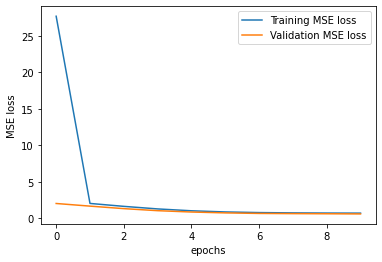

260/260 [==============================] - 0s 1ms/step
r2 score :0.4187725405111964
########################################################################################
No of units : 32,  Activation function : relu
Model: "sequential_134"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_380 (Dense)           (None, 32)                256       
                                                                 
 dense_381 (Dense)           (None, 1)                 33        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


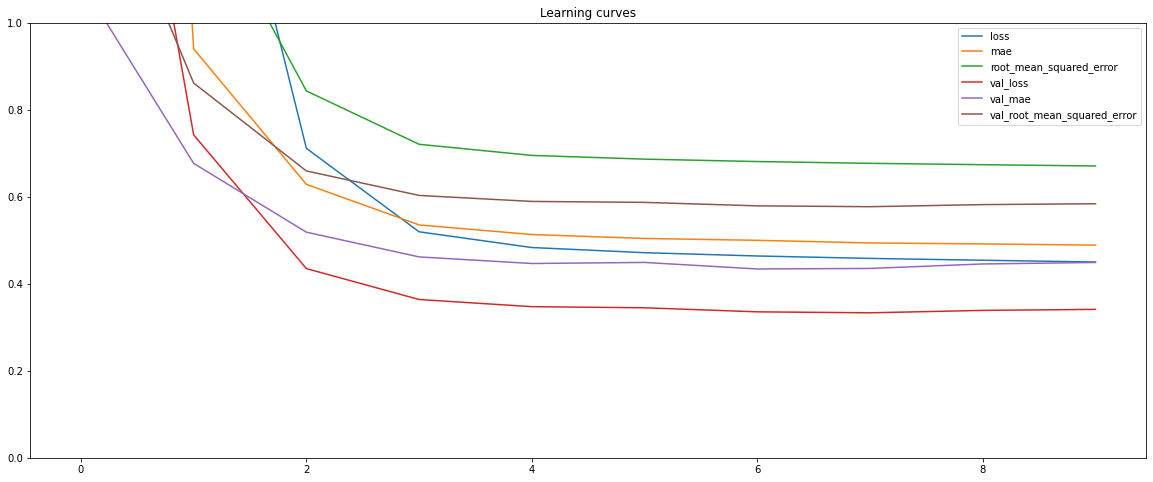

<class 'dict'>
loss [104.49669647216797, 1.7542200088500977, 0.7116397023200989, 0.519675076007843, 0.48351675271987915, 0.47164466977119446, 0.46408727765083313, 0.45849403738975525, 0.4542786777019501, 0.4502881169319153]
mae [5.248422145843506, 0.940325915813446, 0.6288135647773743, 0.5355369448661804, 0.5134028196334839, 0.5043751001358032, 0.5001068115234375, 0.49406829476356506, 0.49180275201797485, 0.48904842138290405]
root_mean_squared_error [10.222362518310547, 1.3244696855545044, 0.8435873985290527, 0.7208849191665649, 0.6953536868095398, 0.6867638826370239, 0.6812395453453064, 0.6771218776702881, 0.6740019917488098, 0.67103511095047]
val_loss [2.2041029930114746, 0.7426173090934753, 0.4350857734680176, 0.3640141785144806, 0.3475342392921448, 0.3449423909187317, 0.3356466591358185, 0.33339884877204895, 0.33898454904556274, 0.3412742614746094]
val_mae [1.0950639247894287, 0.6770411729812622, 0.5187914967536926, 0.4619441032409668, 0.4468209147453308, 0.4492340683937073, 0.4341

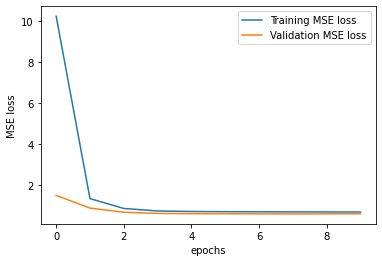

260/260 [==============================] - 0s 1ms/step
r2 score :0.45003986713417543
########################################################################################
No of units : 64,  Activation function : relu
Model: "sequential_135"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_382 (Dense)           (None, 64)                512       
                                                                 
 dense_383 (Dense)           (None, 1)                 65        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


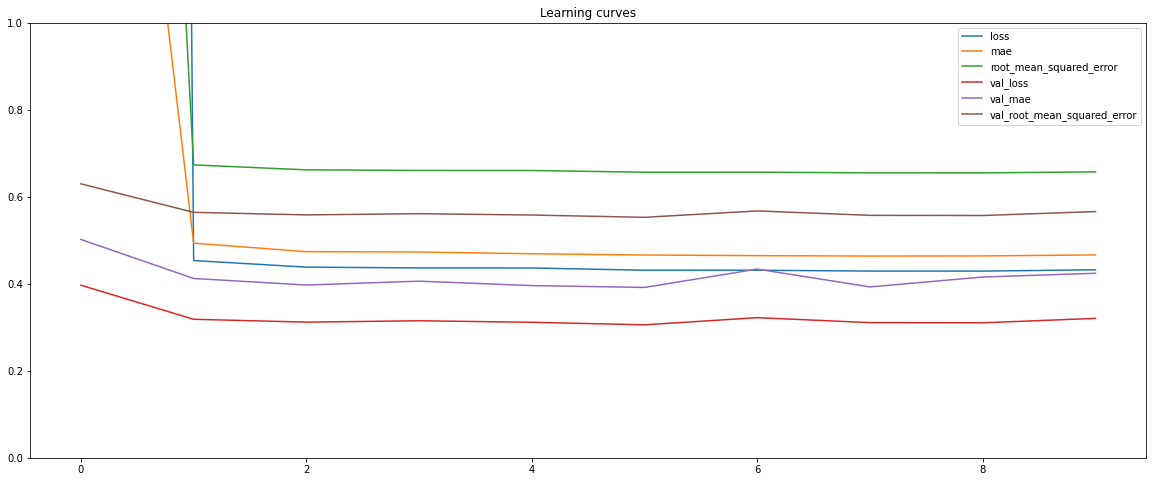

<class 'dict'>
loss [30.167285919189453, 0.4535538852214813, 0.4384413957595825, 0.43661317229270935, 0.43647313117980957, 0.431315153837204, 0.4313487410545349, 0.42933690547943115, 0.42927661538124084, 0.4323134422302246]
mae [2.6918888092041016, 0.4935815632343292, 0.47393232583999634, 0.4732823073863983, 0.4691949486732483, 0.46630510687828064, 0.46488016843795776, 0.4638715982437134, 0.4642210006713867, 0.4664798080921173]
root_mean_squared_error [5.492475509643555, 0.6734641194343567, 0.6621490716934204, 0.660767138004303, 0.6606611609458923, 0.6567459106445312, 0.6567714810371399, 0.6552380323410034, 0.6551920175552368, 0.657505452632904]
val_loss [0.3968697786331177, 0.31855353713035583, 0.31197452545166016, 0.315119206905365, 0.3116128444671631, 0.3057774007320404, 0.32225897908210754, 0.3108222782611847, 0.3104323744773865, 0.32058337330818176]
val_mae [0.502047598361969, 0.41235166788101196, 0.39728838205337524, 0.40619078278541565, 0.39599236845970154, 0.3917275369167328, 0

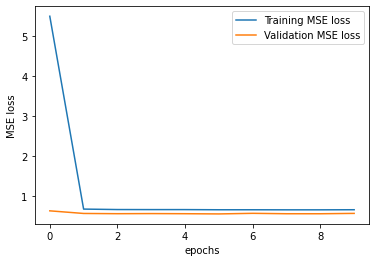

260/260 [==============================] - 0s 1ms/step
r2 score :0.47315939773959803
########################################################################################
No of units : 128,  Activation function : relu
Model: "sequential_136"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_384 (Dense)           (None, 128)               1024      
                                                                 
 dense_385 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


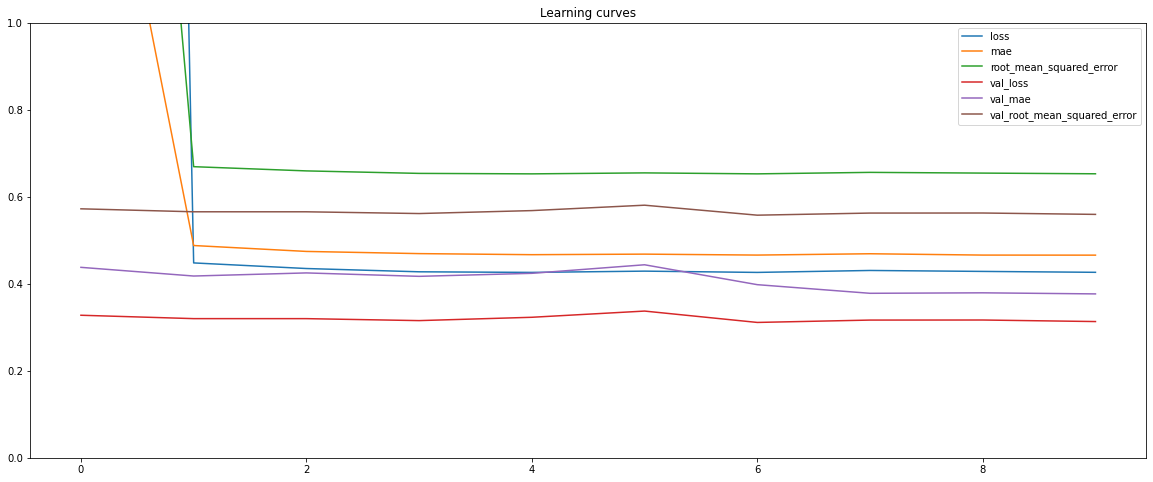

<class 'dict'>
loss [13.069753646850586, 0.4481300711631775, 0.43523404002189636, 0.42771410942077637, 0.4263012707233429, 0.4292263090610504, 0.4262995421886444, 0.43077772855758667, 0.4285881817340851, 0.4265199899673462]
mae [1.8022290468215942, 0.488130658864975, 0.47454434633255005, 0.46952691674232483, 0.4670619070529938, 0.46832817792892456, 0.4661598205566406, 0.4692055284976959, 0.46613621711730957, 0.4659976065158844]
root_mean_squared_error [3.6152114868164062, 0.6694251894950867, 0.6597226858139038, 0.6539985537528992, 0.6529175043106079, 0.6551536321640015, 0.6529161930084229, 0.6563366055488586, 0.6546664834022522, 0.6530849933624268]
val_loss [0.3277999460697174, 0.320022314786911, 0.3199959993362427, 0.3154548704624176, 0.32312706112861633, 0.33739882707595825, 0.31126123666763306, 0.31668612360954285, 0.3168409764766693, 0.3132970631122589]
val_mae [0.4379548728466034, 0.4179838001728058, 0.42513638734817505, 0.41725945472717285, 0.42420658469200134, 0.4438609778881073

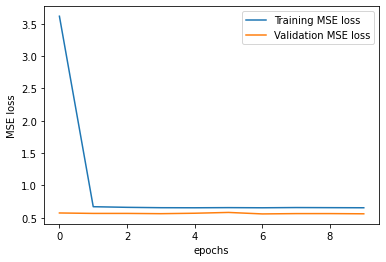

260/260 [==============================] - 0s 1ms/step
r2 score :0.46855512007502176
########################################################################################


In [70]:
activation_func_list = ['sigmoid','relu']
no_of_units_list = [16,32,64,128]
for i in activation_func_list:
    for j in no_of_units_list:
        ann_7(j,i)
        print("########################################################################################")

### 8.  Model with 2 hidden layer
###     Optimizer = 'Adam'
###     Activation function = 'sigmoid', 'relu'
###     No of units = 16,32,64,128

In [81]:
def ann_8(no_of_units1,no_of_units2,activation_func):
    print("No of units : "+ str(no_of_units1)+",  Activation function : "+activation_func)
    ann= Sequential(
                [
                    Dense(no_of_units1,activation=activation_func),
                    Dense(no_of_units2,activation=activation_func),
                    Dense(1,activation = 'linear')
                ])
    ann.compile(optimizer ='Adam',loss='mse',metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])
    model_store = ann.fit(X_train,Y_train,
              epochs=40,
              batch_size=128,
              verbose=0,
              validation_split=0.2)
    ann.summary()
    training_loss_curves(model_store)
    validation_vs_training(model_store)
    res = ann.evaluate(X_test, Y_test, batch_size=128)
    pred_values= ann.predict(X_test)
    print("r2 score :"+str(skm.r2_score(Y_test,pred_values)))

No of units : 32,  Activation function : relu
Model: "sequential_175"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_498 (Dense)           (None, 32)                256       
                                                                 
 dense_499 (Dense)           (None, 32)                1056      
                                                                 
 dense_500 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


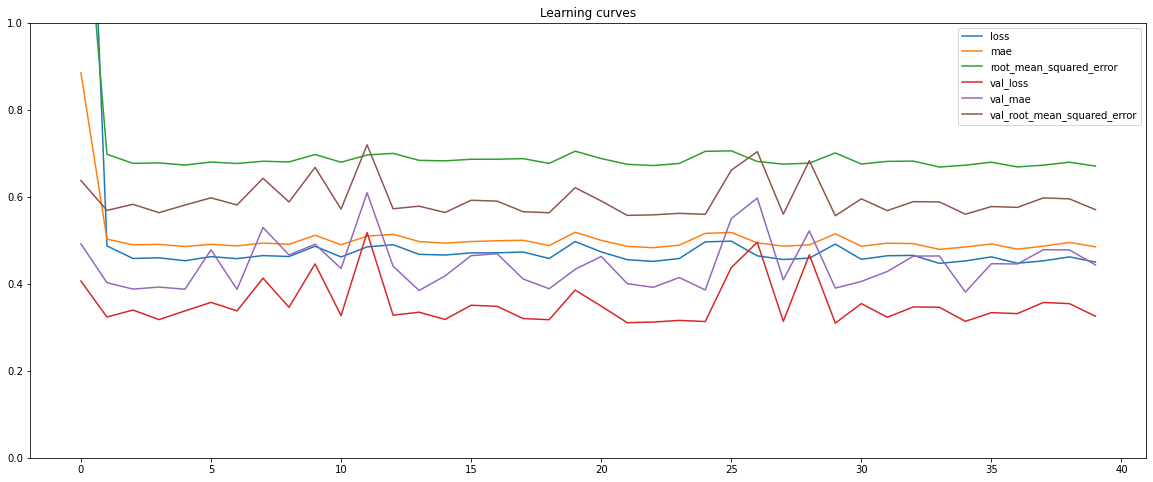

<class 'dict'>
loss [2.0065741539001465, 0.4872378408908844, 0.4583143889904022, 0.4599097967147827, 0.45309755206108093, 0.46261265873908997, 0.45796775817871094, 0.46501418948173523, 0.46280163526535034, 0.4864339828491211, 0.46188443899154663, 0.48498228192329407, 0.4900311529636383, 0.46781691908836365, 0.46631133556365967, 0.47119656205177307, 0.47134655714035034, 0.4731876850128174, 0.4583011865615845, 0.4971994459629059, 0.4735036790370941, 0.4555068016052246, 0.4516706168651581, 0.45815402269363403, 0.49651241302490234, 0.49815165996551514, 0.46435847878456116, 0.45599880814552307, 0.4590502083301544, 0.4914315342903137, 0.45635610818862915, 0.4646175801753998, 0.4654248058795929, 0.4470234215259552, 0.45272794365882874, 0.46199873089790344, 0.44745072722435, 0.4528452754020691, 0.46202006936073303, 0.44995465874671936]
mae [0.8851349949836731, 0.502775251865387, 0.4898247718811035, 0.49069562554359436, 0.48593631386756897, 0.49092158675193787, 0.48725172877311707, 0.4938710331

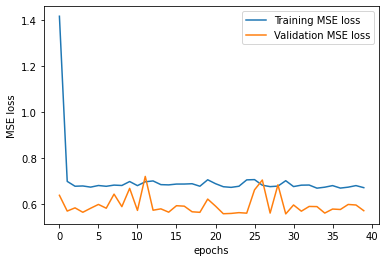

260/260 [==============================] - 0s 1ms/step
r2 score :0.4676760853127986


In [82]:
ann_8(32,32,'relu')

No of units : 16,  Activation function : sigmoid
Model: "sequential_137"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_386 (Dense)           (None, 16)                128       
                                                                 
 dense_387 (Dense)           (None, 16)                272       
                                                                 
 dense_388 (Dense)           (None, 1)                 17        
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


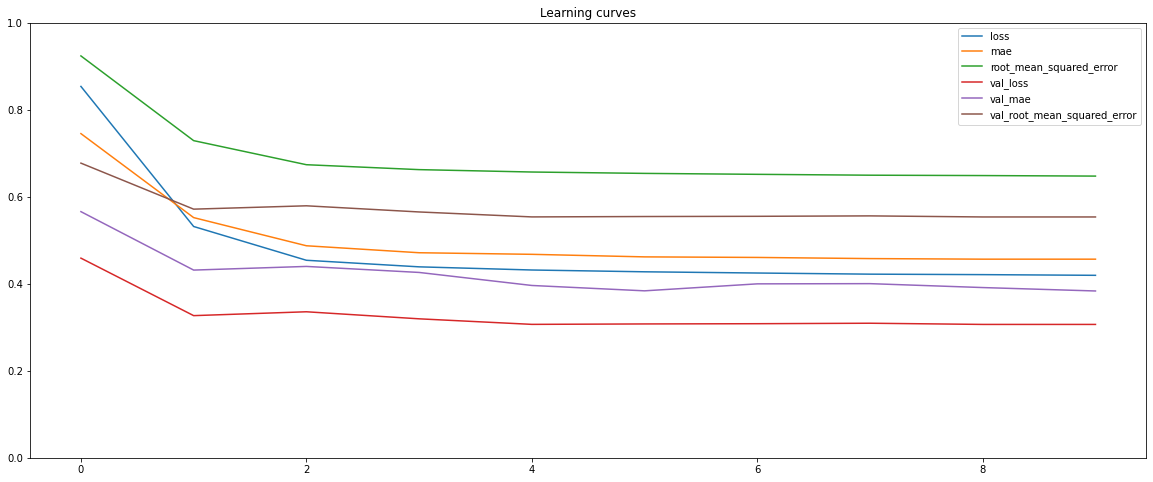

<class 'dict'>
loss [0.8539749383926392, 0.5318748354911804, 0.4542180597782135, 0.43910038471221924, 0.4318448603153229, 0.42771175503730774, 0.42489781975746155, 0.4222882091999054, 0.42119696736335754, 0.4196138083934784]
mae [0.7454514503479004, 0.5523221492767334, 0.4875732660293579, 0.47153276205062866, 0.4678932726383209, 0.4620170295238495, 0.46073219180107117, 0.4580780863761902, 0.4567544162273407, 0.4567377269268036]
root_mean_squared_error [0.9241076707839966, 0.7292975187301636, 0.6739569902420044, 0.662646472454071, 0.6571490168571472, 0.6539967656135559, 0.6518418788909912, 0.649837076663971, 0.648996889591217, 0.6477760672569275]
val_loss [0.4591245651245117, 0.3269055187702179, 0.33578482270240784, 0.3195800185203552, 0.3068222105503082, 0.307802677154541, 0.3083503544330597, 0.3094410300254822, 0.3067036271095276, 0.306700199842453]
val_mae [0.5660291910171509, 0.43164587020874023, 0.44006574153900146, 0.42622488737106323, 0.39628174901008606, 0.3839409351348877, 0.39

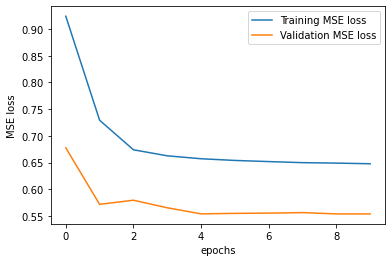

260/260 [==============================] - 0s 1ms/step
r2 score :0.48778352062739694
########################################################################################
No of units : 32,  Activation function : sigmoid
Model: "sequential_138"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_389 (Dense)           (None, 32)                256       
                                                                 
 dense_390 (Dense)           (None, 32)                1056      
                                                                 
 dense_391 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


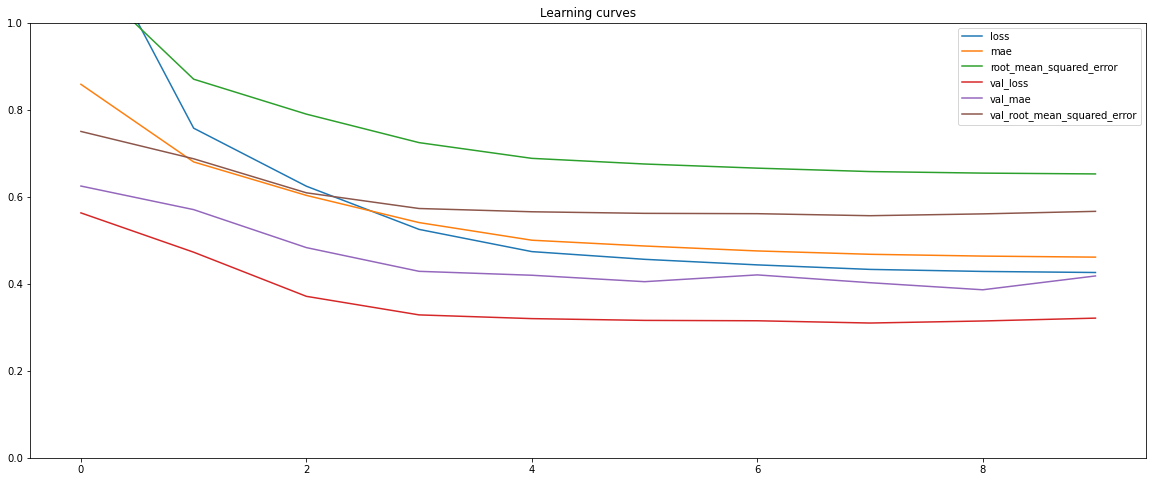

<class 'dict'>
loss [1.2486097812652588, 0.757976770401001, 0.6245278120040894, 0.5252106785774231, 0.47413596510887146, 0.4563925564289093, 0.44360825419425964, 0.4332177937030792, 0.42853349447250366, 0.42608940601348877]
mae [0.8588636517524719, 0.6803826689720154, 0.6034112572669983, 0.5408695340156555, 0.5003455877304077, 0.4870210289955139, 0.4756583869457245, 0.4679711163043976, 0.46382004022598267, 0.46142369508743286]
root_mean_squared_error [1.1174120903015137, 0.8706186413764954, 0.7902707457542419, 0.7247142195701599, 0.6885753273963928, 0.6755683422088623, 0.666039228439331, 0.6581928133964539, 0.6546247005462646, 0.6527552604675293]
val_loss [0.5631603598594666, 0.47278106212615967, 0.3713044822216034, 0.32861247658729553, 0.3200523853302002, 0.3159767687320709, 0.3151024878025055, 0.30991241335868835, 0.31460216641426086, 0.3211607336997986]
val_mae [0.6248950958251953, 0.5706963539123535, 0.4833449721336365, 0.4287923276424408, 0.4197750985622406, 0.40498611330986023, 0

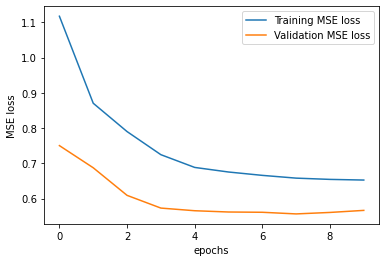

260/260 [==============================] - 0s 1ms/step
r2 score :0.47046113624756813
########################################################################################
No of units : 64,  Activation function : sigmoid
Model: "sequential_139"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_392 (Dense)           (None, 64)                512       
                                                                 
 dense_393 (Dense)           (None, 64)                4160      
                                                                 
 dense_394 (Dense)           (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


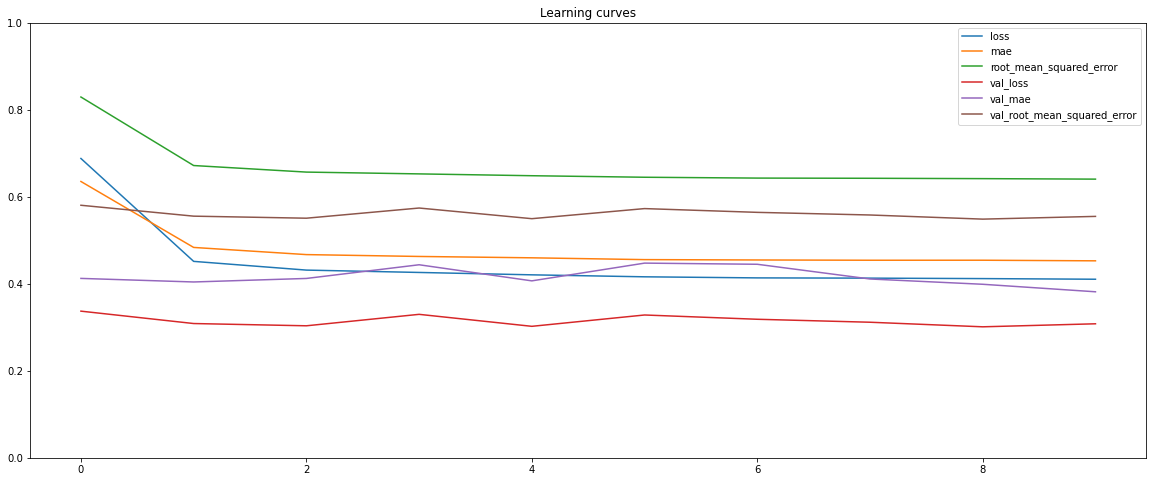

<class 'dict'>
loss [0.6882843971252441, 0.45167672634124756, 0.43162134289741516, 0.42621171474456787, 0.4207296371459961, 0.41618824005126953, 0.41369614005088806, 0.4131268262863159, 0.4120864272117615, 0.410614013671875]
mae [0.6353781223297119, 0.4837333858013153, 0.46725282073020935, 0.46298640966415405, 0.45987269282341003, 0.4557197391986847, 0.45490124821662903, 0.4542829990386963, 0.45432940125465393, 0.4529455304145813]
root_mean_squared_error [0.8296290636062622, 0.6720690131187439, 0.656978964805603, 0.6528488993644714, 0.6486367583274841, 0.6451265215873718, 0.6431921720504761, 0.6427494287490845, 0.6419395804405212, 0.6407917141914368]
val_loss [0.3372245132923126, 0.30874383449554443, 0.3035465180873871, 0.3298717737197876, 0.3023358881473541, 0.32838624715805054, 0.3185468316078186, 0.31173205375671387, 0.3012075126171112, 0.30815306305885315]
val_mae [0.4125206470489502, 0.404310017824173, 0.4124167859554291, 0.4438885748386383, 0.4068722426891327, 0.447661429643631, 

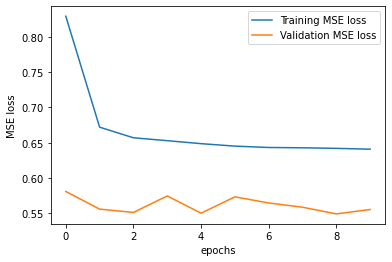

260/260 [==============================] - 0s 1ms/step
r2 score :0.4882648130018683
########################################################################################
No of units : 128,  Activation function : sigmoid
Model: "sequential_140"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_395 (Dense)           (None, 128)               1024      
                                                                 
 dense_396 (Dense)           (None, 128)               16512     
                                                                 
 dense_397 (Dense)           (None, 1)                 129       
                                                                 
Total params: 17,665
Trainable params: 17,665
Non-trainable params: 0
_________________________________________________________________


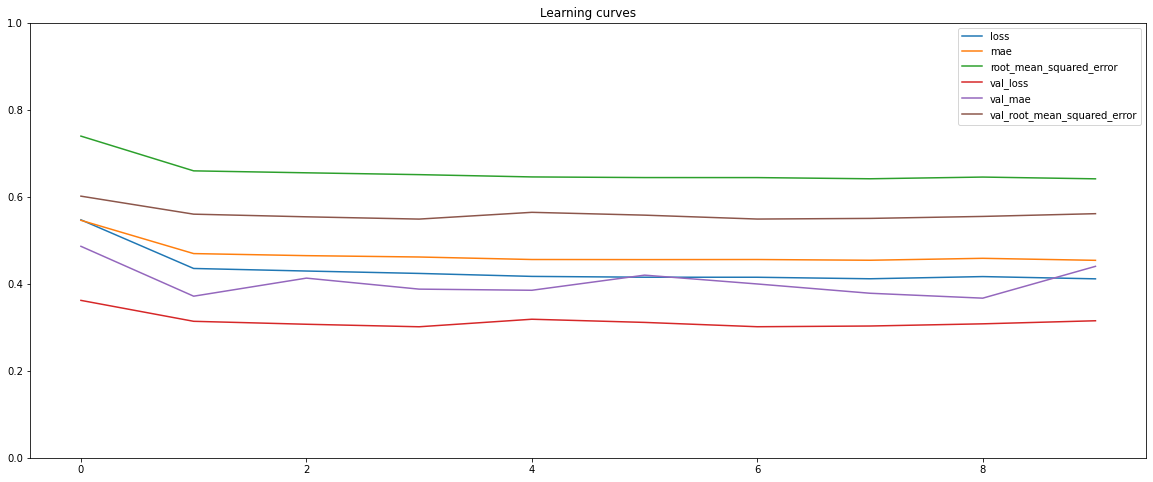

<class 'dict'>
loss [0.5471876859664917, 0.43535763025283813, 0.4294721484184265, 0.4239659309387207, 0.4171361029148102, 0.4152492582798004, 0.4151636064052582, 0.411673903465271, 0.41671255230903625, 0.41152670979499817]
mae [0.5461008548736572, 0.46958401799201965, 0.46484634280204773, 0.4617334306240082, 0.45597222447395325, 0.45574668049812317, 0.4559561312198639, 0.45426976680755615, 0.4587056338787079, 0.4540734589099884]
root_mean_squared_error [0.7397213578224182, 0.6598163843154907, 0.6553412675857544, 0.6511266827583313, 0.6458607316017151, 0.6443983912467957, 0.6443319320678711, 0.6416181921958923, 0.6455327868461609, 0.6415034532546997]
val_loss [0.36198610067367554, 0.3138662576675415, 0.30708321928977966, 0.3013075292110443, 0.3186264634132385, 0.3113349676132202, 0.301401823759079, 0.3030346632003784, 0.308069109916687, 0.3151162564754486]
val_mae [0.4863089919090271, 0.3716221749782562, 0.41314491629600525, 0.38785648345947266, 0.3852294385433197, 0.42002665996551514, 

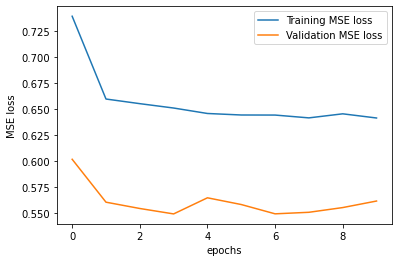

260/260 [==============================] - 0s 1ms/step
r2 score :0.487567405122292
########################################################################################
No of units : 16,  Activation function : relu
Model: "sequential_141"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_398 (Dense)           (None, 16)                128       
                                                                 
 dense_399 (Dense)           (None, 16)                272       
                                                                 
 dense_400 (Dense)           (None, 1)                 17        
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


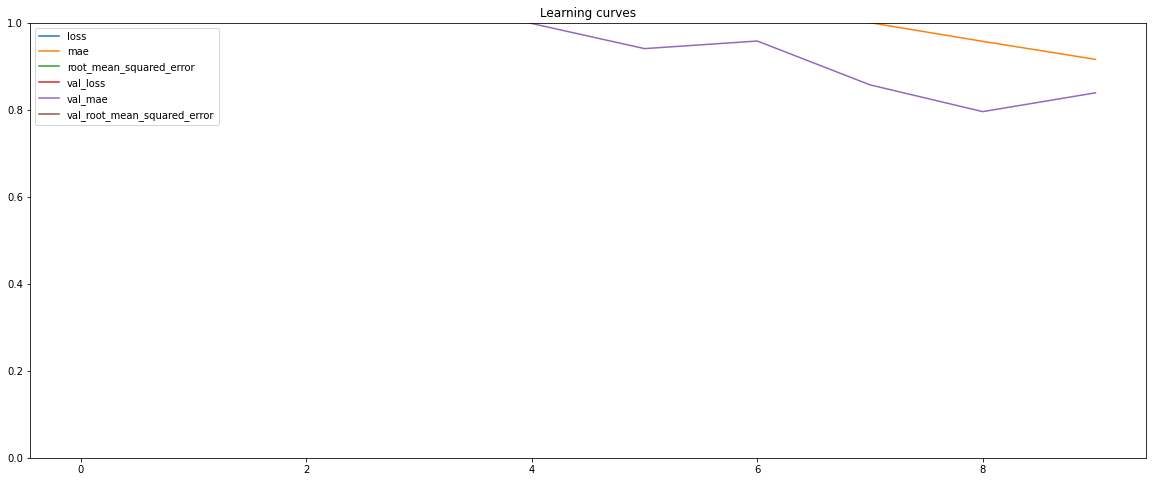

<class 'dict'>
loss [1184.91845703125, 3.7327277660369873, 3.325255870819092, 2.9465715885162354, 2.6270596981048584, 2.3615338802337646, 2.140904426574707, 1.9516135454177856, 1.7840828895568848, 1.6260923147201538]
mae [17.423044204711914, 1.3417091369628906, 1.276376485824585, 1.2116529941558838, 1.1492975950241089, 1.0952011346817017, 1.0448085069656372, 1.000535249710083, 0.9576705694198608, 0.9162189960479736]
root_mean_squared_error [34.422645568847656, 1.9320268630981445, 1.8235284090042114, 1.7165580987930298, 1.6208206415176392, 1.5367282629013062, 1.4631829261779785, 1.3970016241073608, 1.3356956243515015, 1.2751832008361816]
val_loss [2.7648181915283203, 2.4180221557617188, 2.178420066833496, 1.8713668584823608, 1.6454671621322632, 1.4474356174468994, 1.3957901000976562, 1.1768126487731934, 1.0406737327575684, 1.0524630546569824]
val_mae [1.2261873483657837, 1.1526252031326294, 1.1295543909072876, 1.052968144416809, 0.9986230134963989, 0.9409146308898926, 0.9583663940429688

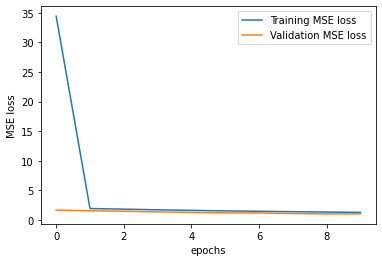

260/260 [==============================] - 0s 1ms/step
r2 score :-0.6866732468607115
########################################################################################
No of units : 32,  Activation function : relu
Model: "sequential_142"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_401 (Dense)           (None, 32)                256       
                                                                 
 dense_402 (Dense)           (None, 32)                1056      
                                                                 
 dense_403 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


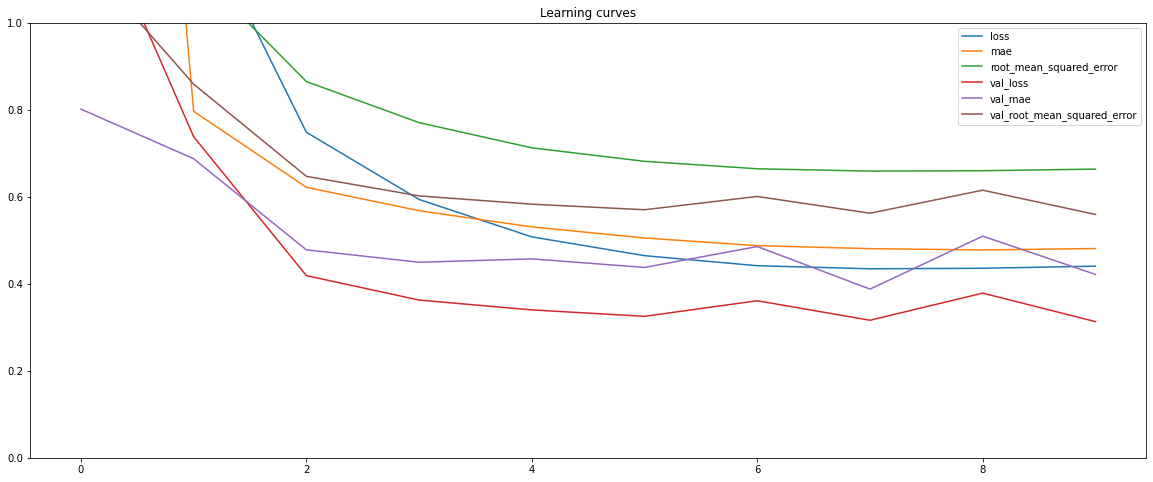

<class 'dict'>
loss [66.22991180419922, 1.2712135314941406, 0.7485416531562805, 0.5940165519714355, 0.5080364942550659, 0.4647766351699829, 0.4416796565055847, 0.4346168637275696, 0.43579328060150146, 0.4406832456588745]
mae [3.76198673248291, 0.7967414855957031, 0.6220498085021973, 0.5681310296058655, 0.5309621691703796, 0.5054579377174377, 0.48782113194465637, 0.4809260070323944, 0.47798219323158264, 0.4812006652355194]
root_mean_squared_error [8.138175964355469, 1.1274811029434204, 0.8651829957962036, 0.7707247138023376, 0.7127667665481567, 0.6817452907562256, 0.6645898222923279, 0.659254789352417, 0.6601464152336121, 0.6638397574424744]
val_loss [1.332516074180603, 0.738348662853241, 0.4189130663871765, 0.36270254850387573, 0.34010636806488037, 0.32535070180892944, 0.36114370822906494, 0.3162982165813446, 0.37866976857185364, 0.31313732266426086]
val_mae [0.8018266558647156, 0.6876463294029236, 0.4781973958015442, 0.4496693015098572, 0.4574234187602997, 0.43774113059043884, 0.48577

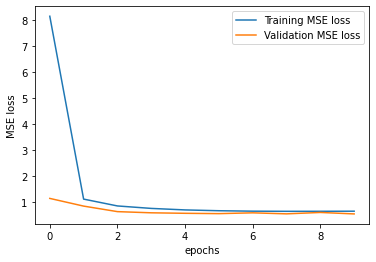

260/260 [==============================] - 0s 1ms/step
r2 score :0.48433230642007485
########################################################################################
No of units : 64,  Activation function : relu
Model: "sequential_143"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_404 (Dense)           (None, 64)                512       
                                                                 
 dense_405 (Dense)           (None, 64)                4160      
                                                                 
 dense_406 (Dense)           (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


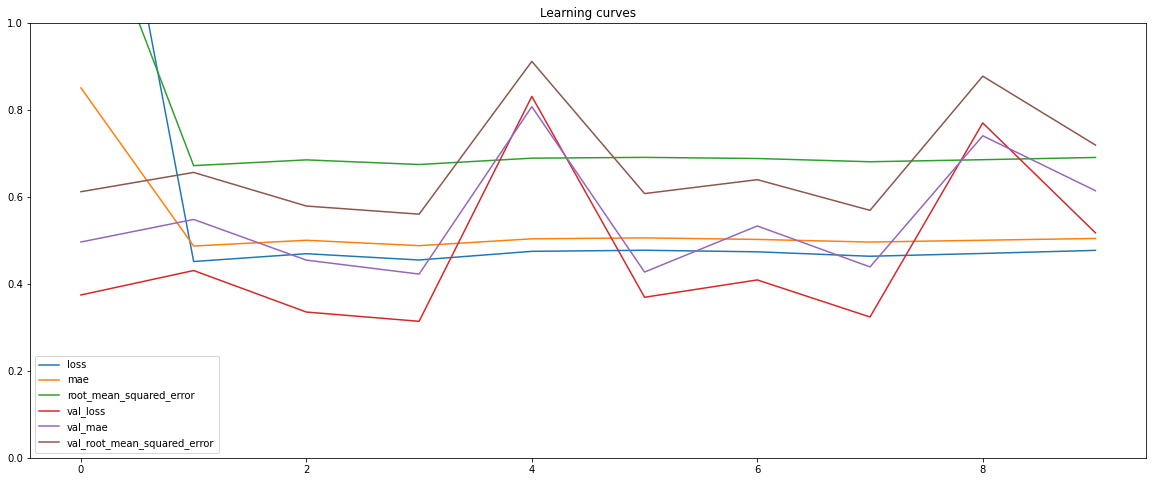

<class 'dict'>
loss [1.8195141553878784, 0.45134007930755615, 0.46931779384613037, 0.4548361599445343, 0.47474074363708496, 0.47725003957748413, 0.4736552834510803, 0.46345415711402893, 0.4699106514453888, 0.4769967496395111]
mae [0.850528359413147, 0.48697495460510254, 0.50020831823349, 0.4878479242324829, 0.5035298466682434, 0.5057260394096375, 0.5021597146987915, 0.49612486362457275, 0.5002907514572144, 0.5044102668762207]
root_mean_squared_error [1.348893642425537, 0.6718184947967529, 0.6850677132606506, 0.6744154095649719, 0.6890143156051636, 0.6908328533172607, 0.6882261633872986, 0.6807746887207031, 0.6855002641677856, 0.6906495094299316]
val_loss [0.3743826746940613, 0.4306303858757019, 0.33514779806137085, 0.3138558566570282, 0.830976665019989, 0.3691260516643524, 0.4090064764022827, 0.32376787066459656, 0.7699933052062988, 0.5172014832496643]
val_mae [0.4961993396282196, 0.5480859875679016, 0.4545356035232544, 0.42245975136756897, 0.8073621988296509, 0.4271390736103058, 0.533

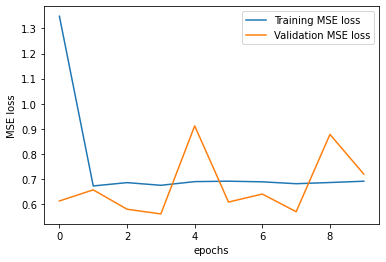

260/260 [==============================] - 0s 1ms/step
r2 score :0.172814778975652
########################################################################################
No of units : 128,  Activation function : relu
Model: "sequential_144"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_407 (Dense)           (None, 128)               1024      
                                                                 
 dense_408 (Dense)           (None, 128)               16512     
                                                                 
 dense_409 (Dense)           (None, 1)                 129       
                                                                 
Total params: 17,665
Trainable params: 17,665
Non-trainable params: 0
_________________________________________________________________


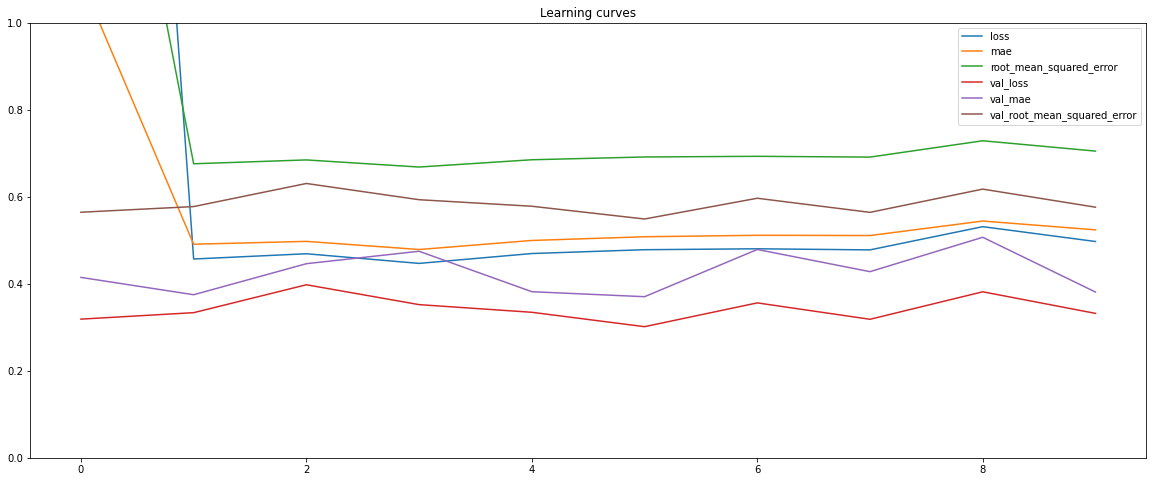

<class 'dict'>
loss [4.072897434234619, 0.45710253715515137, 0.4691961407661438, 0.44702979922294617, 0.4697100818157196, 0.4785090386867523, 0.4806289076805115, 0.4780951738357544, 0.5314807891845703, 0.4973883628845215]
mae [1.100123405456543, 0.49111208319664, 0.49764546751976013, 0.4789479672908783, 0.49975860118865967, 0.5083035826683044, 0.5116797089576721, 0.511107325553894, 0.5444247722625732, 0.5241752862930298]
root_mean_squared_error [2.018141984939575, 0.676093578338623, 0.6849789619445801, 0.6686028838157654, 0.6853539943695068, 0.6917434930801392, 0.6932740211486816, 0.6914442777633667, 0.729027271270752, 0.7052576541900635]
val_loss [0.318859726190567, 0.3337269127368927, 0.39789775013923645, 0.35221195220947266, 0.3346032202243805, 0.3015165627002716, 0.35622674226760864, 0.31851333379745483, 0.38174527883529663, 0.3320952355861664]
val_mae [0.4148355722427368, 0.37497904896736145, 0.4463464319705963, 0.47492650151252747, 0.38194718956947327, 0.37045007944107056, 0.4790

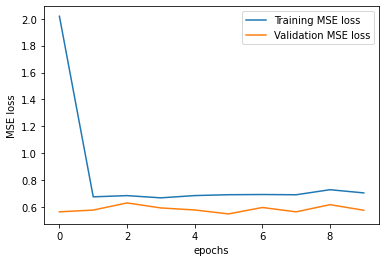

260/260 [==============================] - 0s 1ms/step
r2 score :0.432558035935364
########################################################################################


In [72]:
activation_func_list = ['sigmoid','relu']
no_of_units_list = [16,32,64,128]
for i in activation_func_list:
    for j in no_of_units_list:
        ann_8(j,j,i)
        print("########################################################################################")

### 9.  Model with 3 hidden layer
###     Optimizer = 'Adam'
###     Activation function = 'sigmoid', 'relu'
###     No of units = 16,32,64,128

In [73]:
def ann_9(no_of_units1,no_of_units2,no_of_units3,activation_func):
    print("No of units : "+ str(no_of_units1)+",  Activation function : "+activation_func)
    ann= Sequential(
                [
                    Dense(no_of_units1,activation=activation_func),
                    Dense(no_of_units2,activation=activation_func),
                    Dense(no_of_units3,activation=activation_func),
                    Dense(1,activation = 'linear')
                ])
    ann.compile(optimizer ='Adam',loss='mse',metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])
    model_store = ann.fit(X_train,Y_train,
              epochs=10,
              batch_size=128,
              verbose=0,
              validation_split=0.2)
    ann.summary()
    training_loss_curves(model_store)
    validation_vs_training(model_store)
    res = ann.evaluate(X_test, Y_test, batch_size=128)
    pred_values= ann.predict(X_test)
    print("r2 score :"+str(skm.r2_score(Y_test,pred_values)))

No of units : 16,  Activation function : sigmoid
Model: "sequential_145"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_410 (Dense)           (None, 16)                128       
                                                                 
 dense_411 (Dense)           (None, 16)                272       
                                                                 
 dense_412 (Dense)           (None, 16)                272       
                                                                 
 dense_413 (Dense)           (None, 1)                 17        
                                                                 
Total params: 689
Trainable params: 689
Non-trainable params: 0
_________________________________________________________________


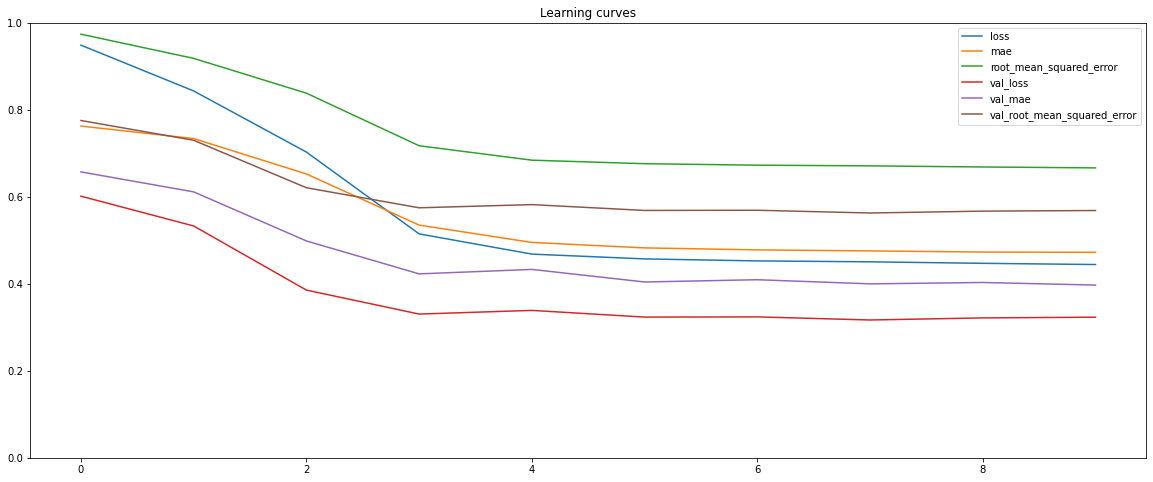

<class 'dict'>
loss [0.9488781690597534, 0.8435707688331604, 0.7030432224273682, 0.5148835182189941, 0.4683920443058014, 0.45735281705856323, 0.45274481177330017, 0.45065224170684814, 0.44719767570495605, 0.4444279968738556]
mae [0.7628101706504822, 0.734089195728302, 0.6527323126792908, 0.5350902080535889, 0.4952484667301178, 0.4826763868331909, 0.4780828058719635, 0.4757463335990906, 0.4731144905090332, 0.47249066829681396]
root_mean_squared_error [0.9741037487983704, 0.9184610843658447, 0.8384767174720764, 0.7175538539886475, 0.6843917369842529, 0.6762786507606506, 0.6728631258010864, 0.6713063716888428, 0.6687284111976624, 0.6666543483734131]
val_loss [0.6015953421592712, 0.5330821871757507, 0.3856745958328247, 0.33050745725631714, 0.3389735221862793, 0.32352709770202637, 0.3240053355693817, 0.316891610622406, 0.32168102264404297, 0.32333114743232727]
val_mae [0.6574228405952454, 0.6115169525146484, 0.498677521944046, 0.4229385554790497, 0.4331868886947632, 0.40428557991981506, 0.4

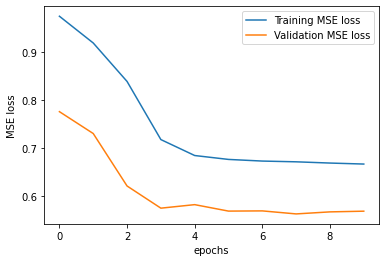

260/260 [==============================] - 0s 1ms/step
r2 score :0.47186066091628853
########################################################################################
No of units : 32,  Activation function : sigmoid
Model: "sequential_146"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_414 (Dense)           (None, 32)                256       
                                                                 
 dense_415 (Dense)           (None, 32)                1056      
                                                                 
 dense_416 (Dense)           (None, 32)                1056      
                                                                 
 dense_417 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________

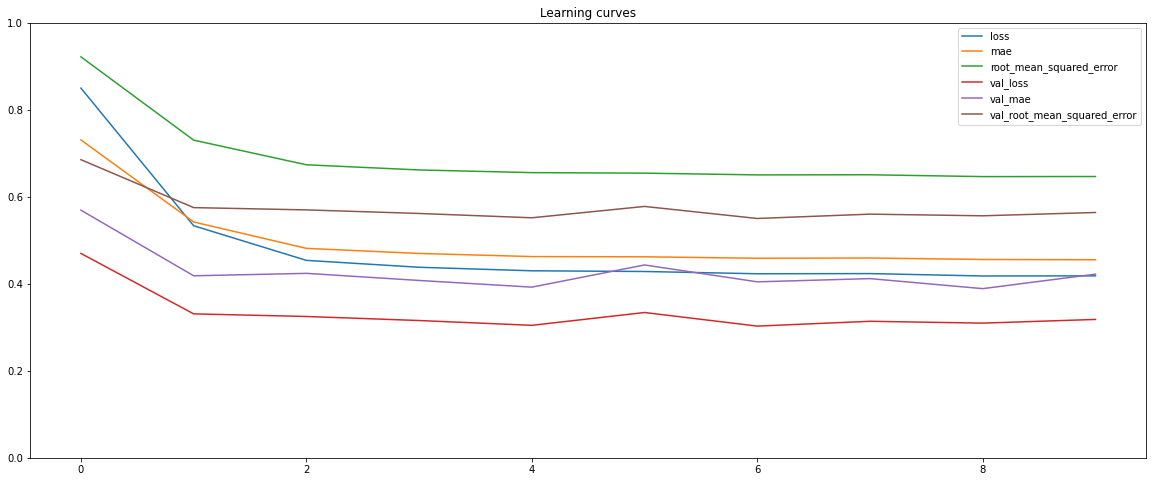

<class 'dict'>
loss [0.8501104116439819, 0.533602774143219, 0.45399346947669983, 0.4381358027458191, 0.4300253391265869, 0.4284225404262543, 0.42320412397384644, 0.42358097434043884, 0.4180857539176941, 0.41837236285209656]
mae [0.7309542894363403, 0.5422775745391846, 0.4815708100795746, 0.4698851406574249, 0.46272963285446167, 0.46218571066856384, 0.45887404680252075, 0.45940282940864563, 0.4560145139694214, 0.4554124176502228]
root_mean_squared_error [0.9220142960548401, 0.7304812073707581, 0.6737903952598572, 0.6619182825088501, 0.6557631492614746, 0.654539942741394, 0.6505414247512817, 0.6508309841156006, 0.6465955376625061, 0.6468170881271362]
val_loss [0.4699147343635559, 0.33097517490386963, 0.3249576985836029, 0.3156770169734955, 0.30460911989212036, 0.3341001868247986, 0.3028412461280823, 0.31390872597694397, 0.30968746542930603, 0.31818872690200806]
val_mae [0.5694157481193542, 0.41854315996170044, 0.42412683367729187, 0.40780457854270935, 0.3924241065979004, 0.44344285130500

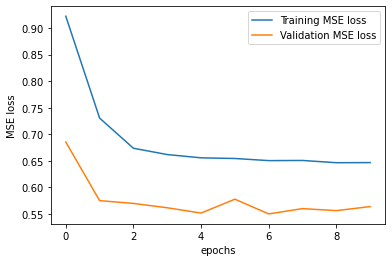

260/260 [==============================] - 0s 1ms/step
r2 score :0.4779814961225841
########################################################################################
No of units : 64,  Activation function : sigmoid
Model: "sequential_147"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_418 (Dense)           (None, 64)                512       
                                                                 
 dense_419 (Dense)           (None, 64)                4160      
                                                                 
 dense_420 (Dense)           (None, 64)                4160      
                                                                 
 dense_421 (Dense)           (None, 1)                 65        
                                                                 
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
__________________________

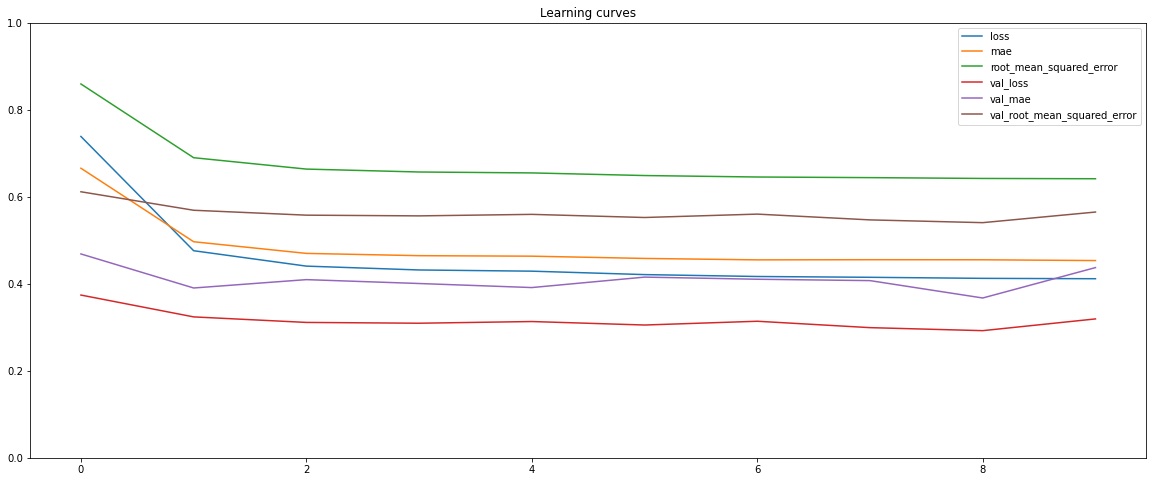

<class 'dict'>
loss [0.7388879060745239, 0.4761884808540344, 0.44075798988342285, 0.4319118857383728, 0.4291490614414215, 0.4212745428085327, 0.4169151782989502, 0.4150676727294922, 0.4126298427581787, 0.4117703437805176]
mae [0.665865421295166, 0.4968281090259552, 0.47001317143440247, 0.46478554606437683, 0.46361953020095825, 0.4584377408027649, 0.4551406800746918, 0.4554954767227173, 0.4553624391555786, 0.4535498321056366]
root_mean_squared_error [0.8595858812332153, 0.6900641322135925, 0.6638960838317871, 0.657200038433075, 0.6550946831703186, 0.6490566730499268, 0.6456896662712097, 0.6442574858665466, 0.6423627138137817, 0.6416933536529541]
val_loss [0.3742336928844452, 0.3240133225917816, 0.3112950921058655, 0.3094593286514282, 0.3133391737937927, 0.30532097816467285, 0.3139955997467041, 0.2992894649505615, 0.2923666536808014, 0.3193577229976654]
val_mae [0.4687659442424774, 0.39048048853874207, 0.40970805287361145, 0.4007628262042999, 0.39147093892097473, 0.41548827290534973, 0.4

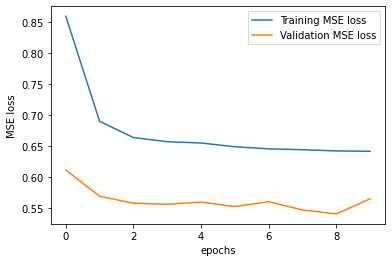

260/260 [==============================] - 0s 1ms/step
r2 score :0.4762112853309448
########################################################################################
No of units : 128,  Activation function : sigmoid
Model: "sequential_148"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_422 (Dense)           (None, 128)               1024      
                                                                 
 dense_423 (Dense)           (None, 128)               16512     
                                                                 
 dense_424 (Dense)           (None, 128)               16512     
                                                                 
 dense_425 (Dense)           (None, 1)                 129       
                                                                 
Total params: 34,177
Trainable params: 34,177
Non-trainable params: 0
_______________________

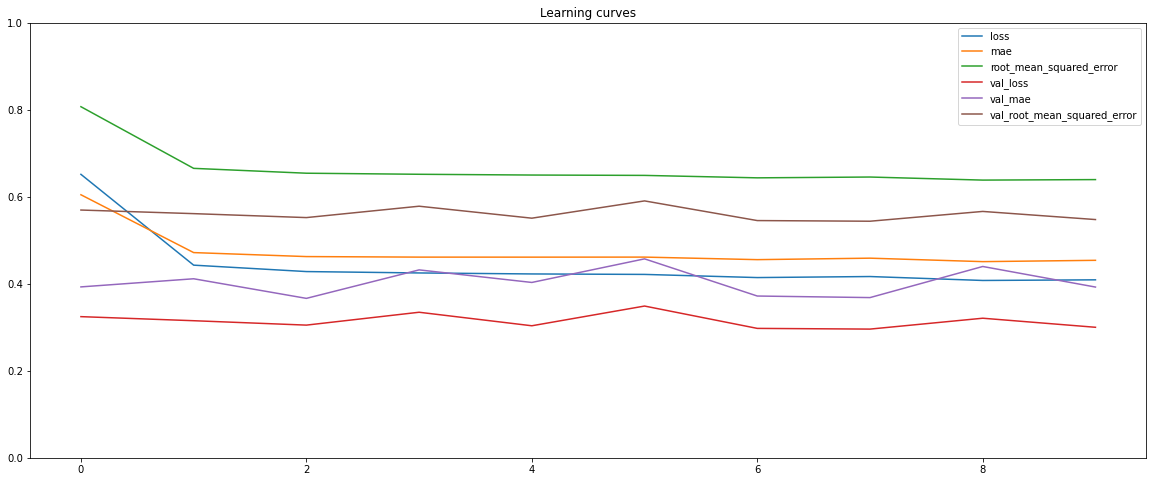

<class 'dict'>
loss [0.6518124341964722, 0.4429837465286255, 0.4282363951206207, 0.4250485897064209, 0.42276692390441895, 0.42170077562332153, 0.4144386649131775, 0.4168250560760498, 0.407779723405838, 0.4092494547367096]
mae [0.604870080947876, 0.471875935792923, 0.46270552277565, 0.461464524269104, 0.46139341592788696, 0.4615025520324707, 0.4556583762168884, 0.4590420722961426, 0.45108306407928467, 0.4541030526161194]
root_mean_squared_error [0.8073490262031555, 0.6655702590942383, 0.65439772605896, 0.6519575119018555, 0.6502053141593933, 0.6493849158287048, 0.6437690854072571, 0.6456199288368225, 0.638576328754425, 0.6397261023521423]
val_loss [0.3245883882045746, 0.3152235746383667, 0.30509695410728455, 0.3346935510635376, 0.3036021888256073, 0.3489540219306946, 0.29757845401763916, 0.2959463596343994, 0.3209584951400757, 0.30011945962905884]
val_mae [0.39298880100250244, 0.4116831421852112, 0.36659514904022217, 0.4320935904979706, 0.4032028019428253, 0.45746129751205444, 0.3719916

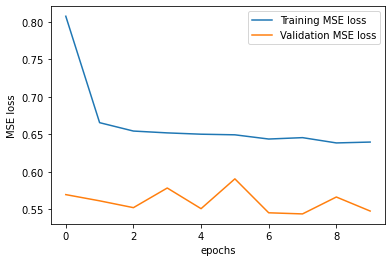

260/260 [==============================] - 0s 1ms/step
r2 score :0.500535026402576
########################################################################################
No of units : 16,  Activation function : relu
Model: "sequential_149"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_426 (Dense)           (None, 16)                128       
                                                                 
 dense_427 (Dense)           (None, 16)                272       
                                                                 
 dense_428 (Dense)           (None, 16)                272       
                                                                 
 dense_429 (Dense)           (None, 1)                 17        
                                                                 
Total params: 689
Trainable params: 689
Non-trainable params: 0
__________________________________

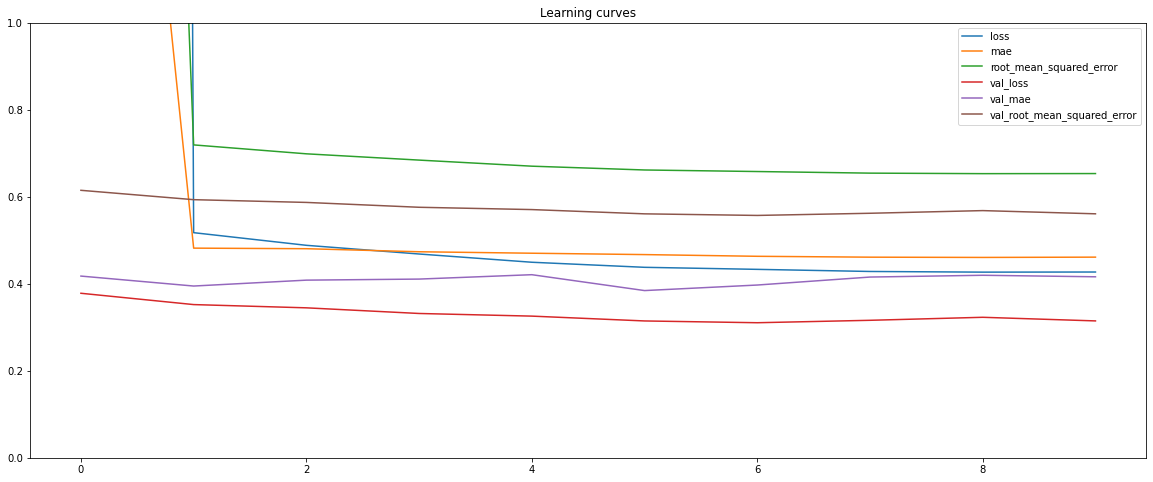

<class 'dict'>
loss [51.84074783325195, 0.517677903175354, 0.48860445618629456, 0.4686248302459717, 0.44966745376586914, 0.4380235970020294, 0.43332159519195557, 0.42846810817718506, 0.426923543214798, 0.42720499634742737]
mae [3.0011966228485107, 0.48211321234703064, 0.4808101952075958, 0.4737884998321533, 0.47042903304100037, 0.4672785997390747, 0.4633514881134033, 0.46133774518966675, 0.460737407207489, 0.46140995621681213]
root_mean_squared_error [7.200051784515381, 0.7194983959197998, 0.6990024447441101, 0.6845617890357971, 0.6705724596977234, 0.6618335247039795, 0.6582716703414917, 0.6545747518539429, 0.6533938646316528, 0.6536092162132263]
val_loss [0.3783341944217682, 0.3523121774196625, 0.3448541462421417, 0.33186766505241394, 0.3257901966571808, 0.3146871030330658, 0.31059855222702026, 0.3161800503730774, 0.3230997622013092, 0.31477928161621094]
val_mae [0.4178583025932312, 0.39496374130249023, 0.40851902961730957, 0.4109590947628021, 0.4210434556007385, 0.3845336139202118, 0

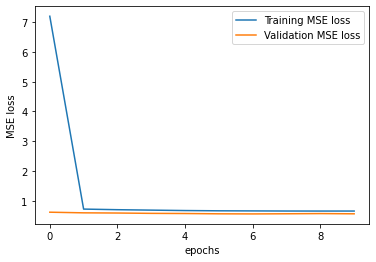

260/260 [==============================] - 0s 1ms/step
r2 score :0.4786748538368889
########################################################################################
No of units : 32,  Activation function : relu
Model: "sequential_150"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_430 (Dense)           (None, 32)                256       
                                                                 
 dense_431 (Dense)           (None, 32)                1056      
                                                                 
 dense_432 (Dense)           (None, 32)                1056      
                                                                 
 dense_433 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_____________________________

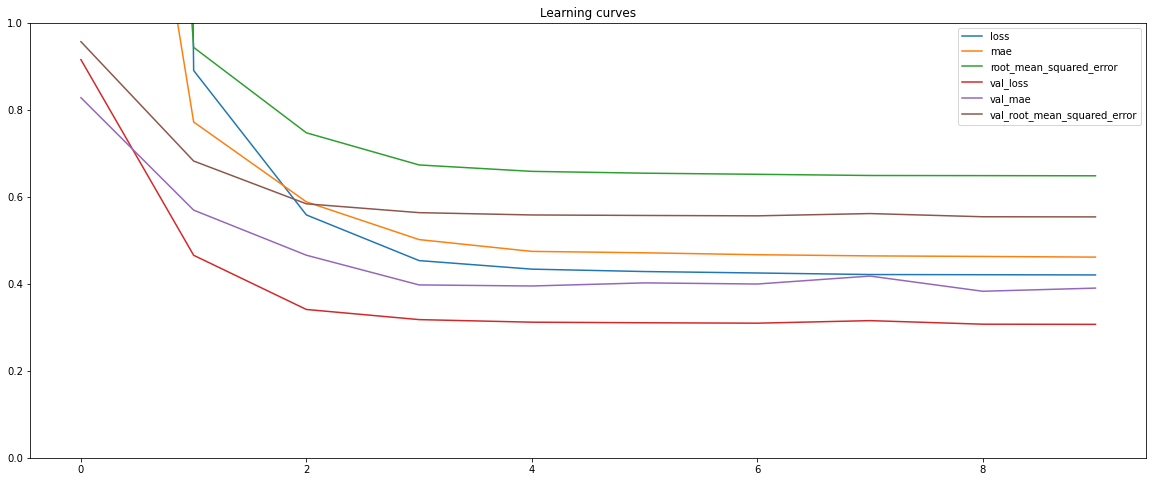

<class 'dict'>
loss [22.26352310180664, 0.8905708193778992, 0.558484673500061, 0.45347610116004944, 0.4338122606277466, 0.4283081293106079, 0.4249710738658905, 0.42141830921173096, 0.4209997057914734, 0.4204997718334198]
mae [2.370344400405884, 0.7721635103225708, 0.5884924530982971, 0.5017716288566589, 0.47464993596076965, 0.47141891717910767, 0.46699535846710205, 0.46429526805877686, 0.46300962567329407, 0.461478590965271]
root_mean_squared_error [4.718423843383789, 0.9437006115913391, 0.7473183274269104, 0.6734063625335693, 0.6586442589759827, 0.6544525623321533, 0.6518980264663696, 0.6491674184799194, 0.6488448977470398, 0.6484595537185669]
val_loss [0.915587842464447, 0.4656933546066284, 0.3410848081111908, 0.31776800751686096, 0.3118186593055725, 0.310533344745636, 0.30955806374549866, 0.315416544675827, 0.3072180151939392, 0.3068724274635315]
val_mae [0.8280971050262451, 0.5695046782493591, 0.46584227681159973, 0.3975208103656769, 0.3950677514076233, 0.40222010016441345, 0.39959

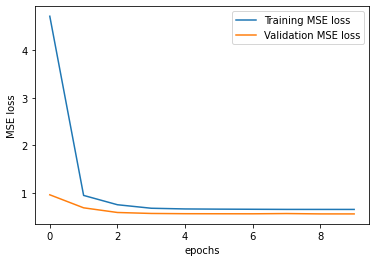

260/260 [==============================] - 0s 1ms/step
r2 score :0.4896319454662993
########################################################################################
No of units : 64,  Activation function : relu
Model: "sequential_151"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_434 (Dense)           (None, 64)                512       
                                                                 
 dense_435 (Dense)           (None, 64)                4160      
                                                                 
 dense_436 (Dense)           (None, 64)                4160      
                                                                 
 dense_437 (Dense)           (None, 1)                 65        
                                                                 
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_____________________________

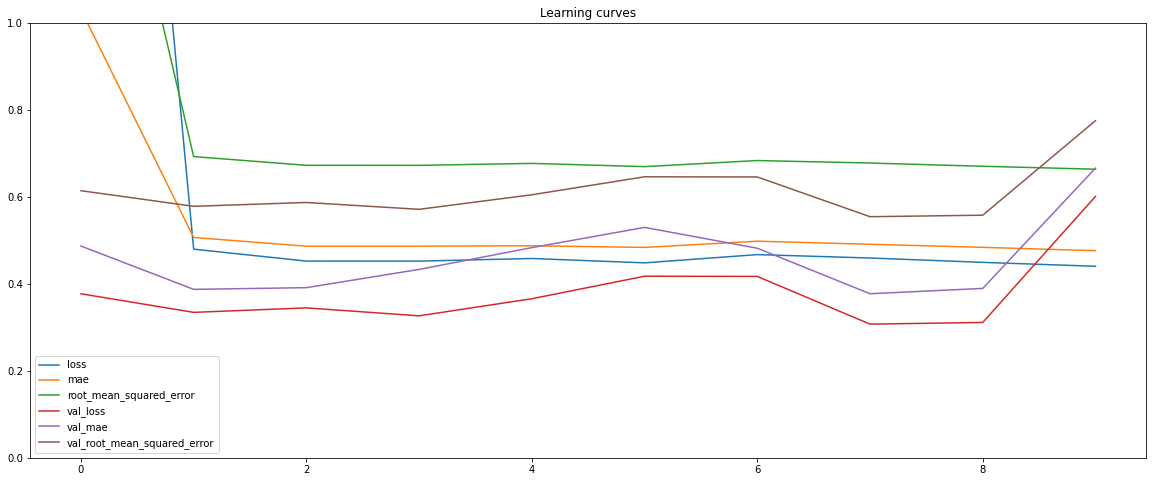

<class 'dict'>
loss [3.2446987628936768, 0.47977888584136963, 0.4523133337497711, 0.452230840921402, 0.4583261013031006, 0.44824084639549255, 0.4672434329986572, 0.4594353437423706, 0.4493984282016754, 0.44039344787597656]
mae [1.0303311347961426, 0.5066128969192505, 0.4865948259830475, 0.48667556047439575, 0.48754799365997314, 0.4838021397590637, 0.49805858731269836, 0.4909856617450714, 0.4839707612991333, 0.47625401616096497]
root_mean_squared_error [1.8013046979904175, 0.6926607489585876, 0.6725424528121948, 0.672481119632721, 0.6769978404045105, 0.6695079207420349, 0.683552086353302, 0.67781662940979, 0.6703718304634094, 0.6636214852333069]
val_loss [0.377210795879364, 0.3344232439994812, 0.3446970283985138, 0.3264596462249756, 0.3657800257205963, 0.4175373315811157, 0.417059063911438, 0.30737942457199097, 0.3112022578716278, 0.6009780764579773]
val_mae [0.4869759678840637, 0.38732650876045227, 0.3912454843521118, 0.43321216106414795, 0.48330390453338623, 0.5297980308532715, 0.4819

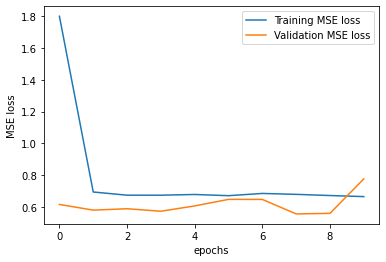

260/260 [==============================] - 0s 1ms/step
r2 score :0.052531603743599775
########################################################################################
No of units : 128,  Activation function : relu
Model: "sequential_152"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_438 (Dense)           (None, 128)               1024      
                                                                 
 dense_439 (Dense)           (None, 128)               16512     
                                                                 
 dense_440 (Dense)           (None, 128)               16512     
                                                                 
 dense_441 (Dense)           (None, 1)                 129       
                                                                 
Total params: 34,177
Trainable params: 34,177
Non-trainable params: 0
________________________

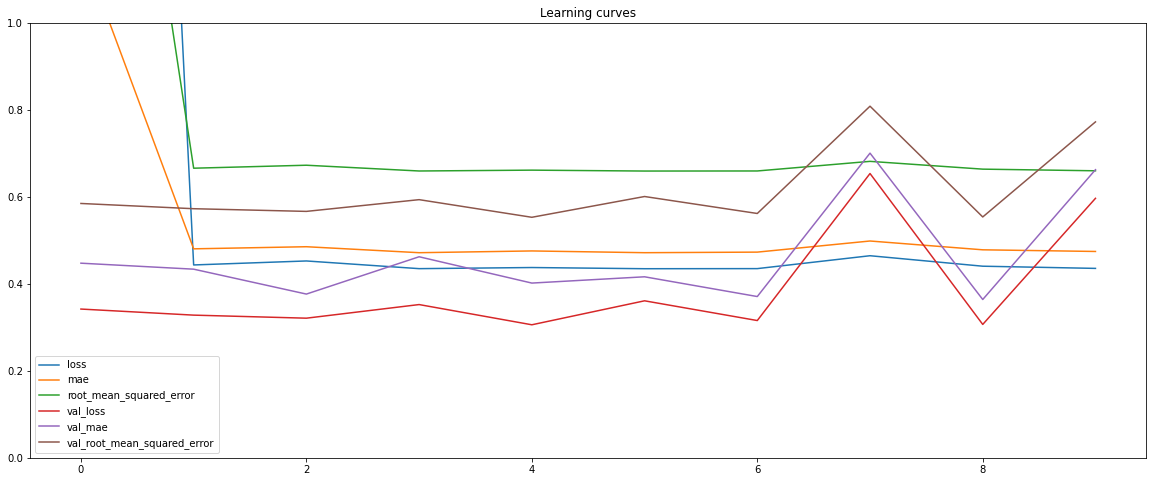

<class 'dict'>
loss [5.636321067810059, 0.4434487521648407, 0.4526230990886688, 0.43495288491249084, 0.4375288784503937, 0.4347887337207794, 0.4350275993347168, 0.4646581709384918, 0.4405710697174072, 0.43555334210395813]
mae [1.177390694618225, 0.4805220365524292, 0.48536521196365356, 0.47162461280822754, 0.4756712317466736, 0.47163811326026917, 0.4729563593864441, 0.4985288381576538, 0.4782741367816925, 0.4744745194911957]
root_mean_squared_error [2.374093770980835, 0.6659194827079773, 0.6727727055549622, 0.6595095992088318, 0.6614596843719482, 0.6593851447105408, 0.6595662236213684, 0.6816583871841431, 0.6637552976608276, 0.6599646806716919]
val_loss [0.3420349359512329, 0.3280591666698456, 0.32104775309562683, 0.3523600697517395, 0.30587172508239746, 0.3609979450702667, 0.3156316876411438, 0.6536892056465149, 0.3067047595977783, 0.5966591835021973]
val_mae [0.4475112855434418, 0.43374502658843994, 0.3764846622943878, 0.46228116750717163, 0.401777058839798, 0.4162183701992035, 0.370

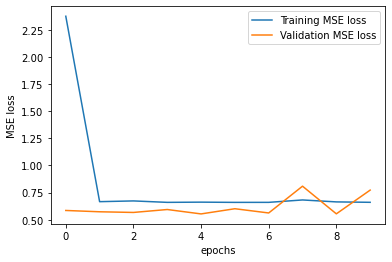

260/260 [==============================] - 0s 1ms/step
r2 score :0.04484198684922669
########################################################################################


In [74]:
activation_func_list = ['sigmoid','relu']
no_of_units_list = [16,32,64,128]
for i in activation_func_list:
    for j in no_of_units_list:
        ann_9(j,j,j,i)
        print("########################################################################################")

### 10.  Model with 1 hidden layer
###     Optimizer = 'SGD' , 'Adam'
###     Activation function = 'sigmoid', 'relu'
###     No of units = 16,32,64,128
###     Regularization = L2 ( lambda = 0.01)

In [76]:
def ann_10(optimizer_algo,no_of_units1,activation_func):
    print("Optimizer algorithm : "+ optimizer_algo+" No of units : "+ str(no_of_units1)+",  Activation function : "+activation_func)
    #dense_layer = tf.keras.layers.Dense(units = no_of_units1,activation= activation_func,kernel_regularizer = tf.keras.regularizers.L2(0.01))
    ann= Sequential(
                [
                    Dense(no_of_units1,activation= activation_func,kernel_regularizer = tf.keras.regularizers.L2(0.01)),
                    Dense(1,activation = 'linear')
                ])
    ann.compile(optimizer = optimizer_algo,loss='mse',metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])
    model_store = ann.fit(X_train,Y_train,
              epochs=10,
              batch_size=128,
              verbose=0,
              validation_split=0.2)
    ann.summary()
    training_loss_curves(model_store)
    validation_vs_training(model_store)
    res = ann.evaluate(X_test, Y_test, batch_size=128)
    pred_values= ann.predict(X_test)
    print("r2 score :"+str(skm.r2_score(Y_test,pred_values)))
    

Optimizer algorithm : SGD No of units : 16,  Activation function : sigmoid
Model: "sequential_153"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_442 (Dense)           (None, 16)                128       
                                                                 
 dense_443 (Dense)           (None, 1)                 17        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


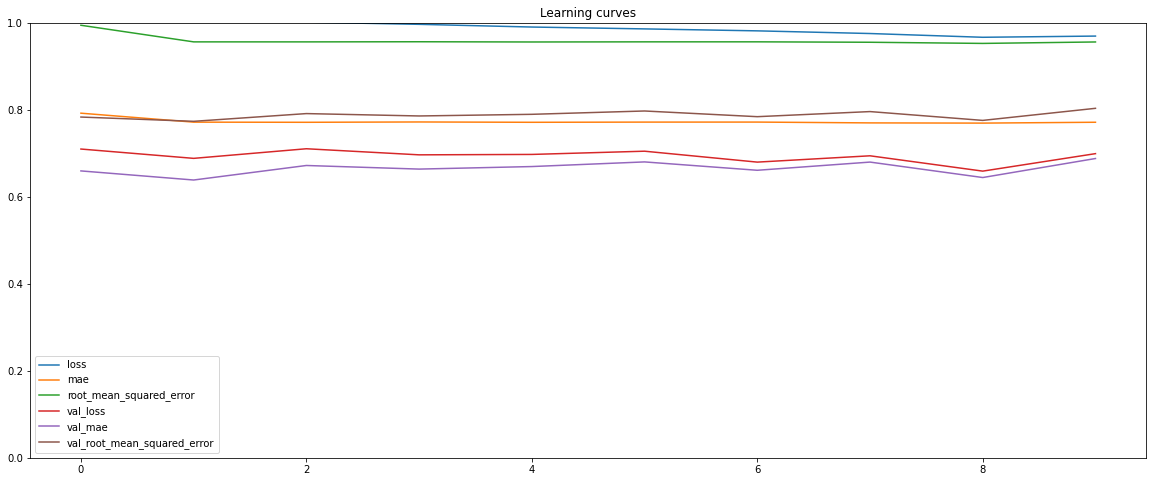

<class 'dict'>
loss [1.0885751247406006, 1.0077099800109863, 1.0017298460006714, 0.9967548251152039, 0.9905405044555664, 0.9862497448921204, 0.9817501306533813, 0.9756150245666504, 0.9669804573059082, 0.9697400331497192]
mae [0.7924371957778931, 0.7718214392662048, 0.7714924812316895, 0.7722479701042175, 0.771492063999176, 0.7719307541847229, 0.7719845771789551, 0.7701139450073242, 0.7696288228034973, 0.7715885043144226]
root_mean_squared_error [0.9946186542510986, 0.9564203023910522, 0.9563974738121033, 0.9567021727561951, 0.9561734795570374, 0.9564770460128784, 0.9565091133117676, 0.9555308222770691, 0.9528724551200867, 0.9561998844146729]
val_loss [0.7099964618682861, 0.6885553598403931, 0.710651695728302, 0.6966617703437805, 0.6975926160812378, 0.7050265669822693, 0.679922878742218, 0.6944360136985779, 0.6592037677764893, 0.6994073390960693]
val_mae [0.6596931219100952, 0.6387660503387451, 0.6721680164337158, 0.6638756990432739, 0.6697220802307129, 0.6803845763206482, 0.66115558147

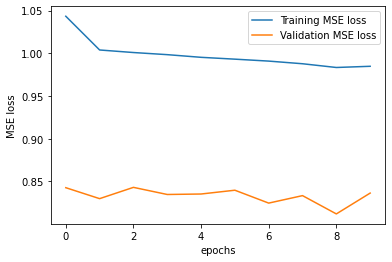

260/260 [==============================] - 0s 1ms/step
r2 score :-0.019126517808042198
########################################################################################
Optimizer algorithm : SGD No of units : 32,  Activation function : sigmoid
Model: "sequential_154"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_444 (Dense)           (None, 32)                256       
                                                                 
 dense_445 (Dense)           (None, 1)                 33        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


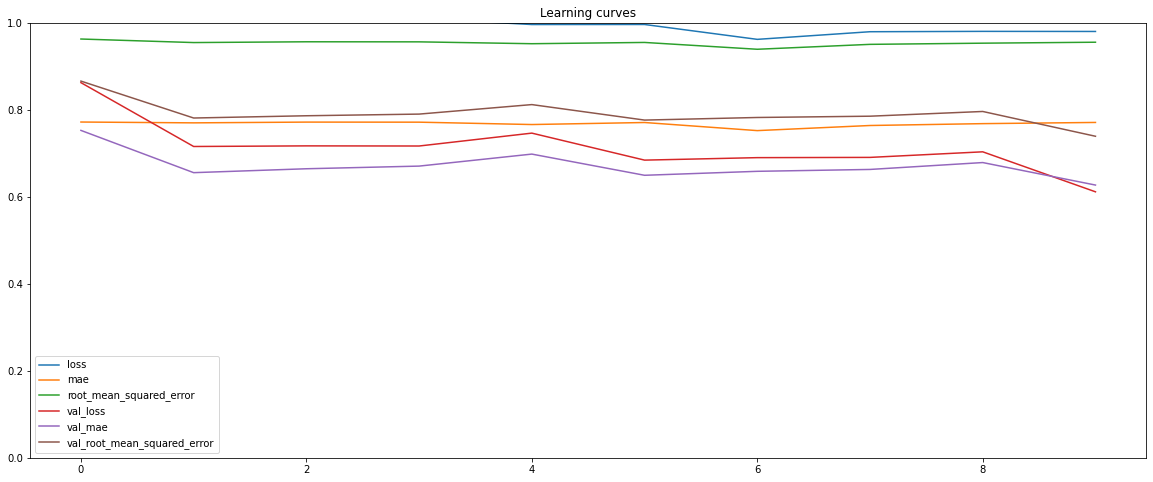

<class 'dict'>
loss [1.0432668924331665, 1.0206249952316284, 1.0171459913253784, 1.010313868522644, 0.9962947964668274, 0.9963878989219666, 0.9622069597244263, 0.9797554016113281, 0.980577826499939, 0.9803653359413147]
mae [0.7721045613288879, 0.7701976895332336, 0.7719444036483765, 0.7717733383178711, 0.7663302421569824, 0.7710027098655701, 0.752355694770813, 0.7641192078590393, 0.7683982253074646, 0.7711536288261414]
root_mean_squared_error [0.9629794955253601, 0.9548359513282776, 0.9566325545310974, 0.9564688801765442, 0.9521822333335876, 0.9551116228103638, 0.9394294023513794, 0.9507113099098206, 0.9534109830856323, 0.9556126594543457]
val_loss [0.8626798987388611, 0.7158463001251221, 0.7172644734382629, 0.7169613242149353, 0.7465904355049133, 0.6845012307167053, 0.6901991367340088, 0.6907724738121033, 0.7035982012748718, 0.6116430759429932]
val_mae [0.7528508305549622, 0.6556762456893921, 0.664651095867157, 0.6707577705383301, 0.6983631253242493, 0.6496372222900391, 0.658754110336

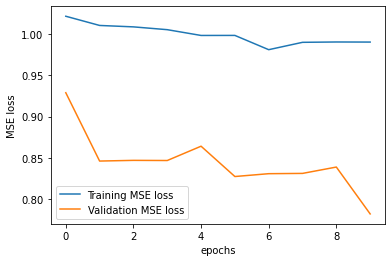

260/260 [==============================] - 0s 1ms/step
r2 score :0.15885379469860716
########################################################################################
Optimizer algorithm : SGD No of units : 64,  Activation function : sigmoid
Model: "sequential_155"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_446 (Dense)           (None, 64)                512       
                                                                 
 dense_447 (Dense)           (None, 1)                 65        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


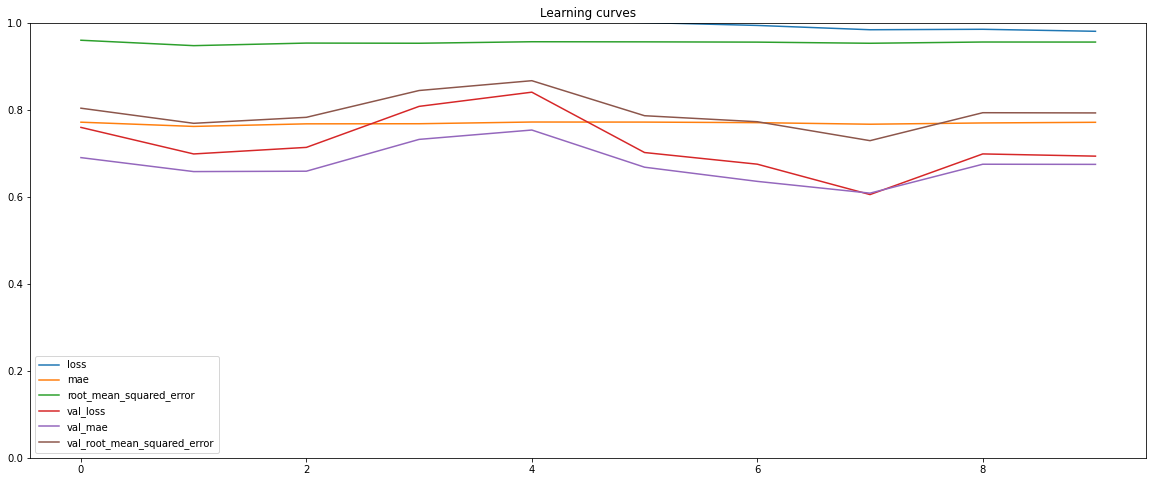

<class 'dict'>
loss [1.039031982421875, 1.0085077285766602, 1.0134018659591675, 1.0065538883209229, 1.0071221590042114, 1.0007904767990112, 0.9942234754562378, 0.9843177795410156, 0.9853526949882507, 0.9807546138763428]
mae [0.7717357873916626, 0.7619979381561279, 0.7679310441017151, 0.7681880593299866, 0.7721149921417236, 0.7719488739967346, 0.7706630229949951, 0.7670640349388123, 0.7699811458587646, 0.771486222743988]
root_mean_squared_error [0.9601761698722839, 0.9477388262748718, 0.9536344408988953, 0.9532543420791626, 0.95671147108078, 0.9564547538757324, 0.9558380842208862, 0.9532190561294556, 0.9560819268226624, 0.9559738636016846]
val_loss [0.7597600221633911, 0.6986957788467407, 0.7138010263442993, 0.8081111311912537, 0.8407487869262695, 0.7019572257995605, 0.6751846075057983, 0.6053082942962646, 0.6987532377243042, 0.6936504244804382]
val_mae [0.6902660727500916, 0.6581514477729797, 0.6590257883071899, 0.7321873307228088, 0.7537021636962891, 0.6682235598564148, 0.635622918605

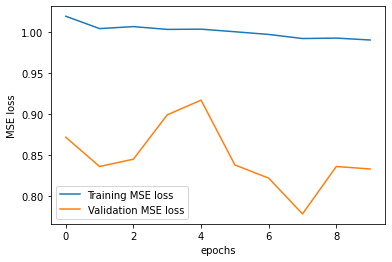

260/260 [==============================] - 0s 1ms/step
r2 score :-0.006515938201386184
########################################################################################
Optimizer algorithm : SGD No of units : 128,  Activation function : sigmoid
Model: "sequential_156"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_448 (Dense)           (None, 128)               1024      
                                                                 
 dense_449 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


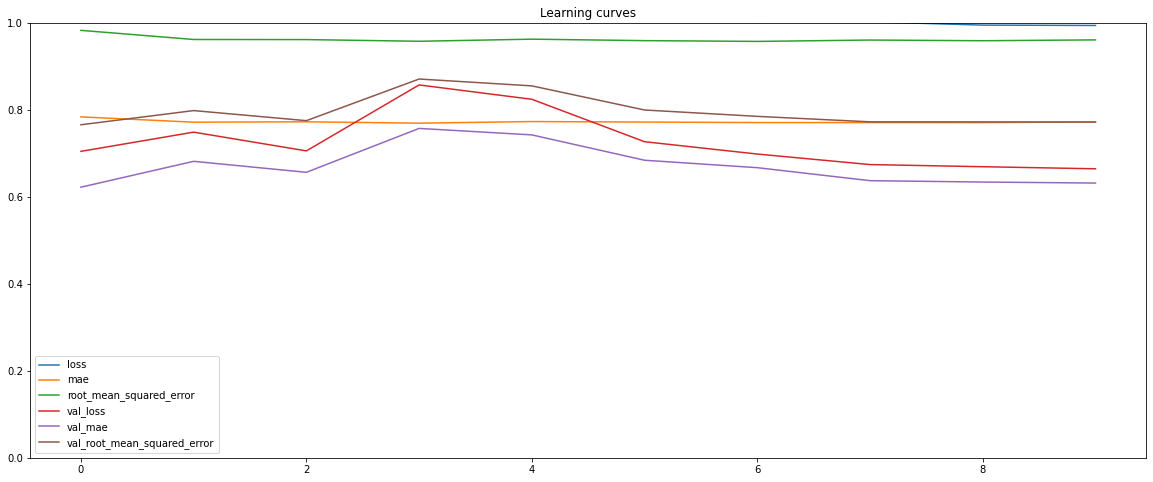

<class 'dict'>
loss [1.087976336479187, 1.040107011795044, 1.0328577756881714, 1.0192095041275024, 1.0225398540496826, 1.010259747505188, 1.0014079809188843, 1.0025485754013062, 0.9949471950531006, 0.9941399693489075]
mae [0.7839387059211731, 0.7717546820640564, 0.7726123929023743, 0.7694865465164185, 0.7731837630271912, 0.7720217704772949, 0.7708858251571655, 0.7708612680435181, 0.7707886695861816, 0.7723466157913208]
root_mean_squared_error [0.9829107522964478, 0.9619002342224121, 0.9616736769676208, 0.9578121900558472, 0.9626168608665466, 0.9592702984809875, 0.9574892520904541, 0.9606216549873352, 0.9590513706207275, 0.9609665870666504]
val_loss [0.7046584486961365, 0.748843252658844, 0.7057371139526367, 0.85740727186203, 0.8243963718414307, 0.7268396615982056, 0.6984851956367493, 0.674278736114502, 0.6693493127822876, 0.6645506620407104]
val_mae [0.6222819089889526, 0.6817295551300049, 0.6564785242080688, 0.7574029564857483, 0.7425290942192078, 0.6842353343963623, 0.667128562927246

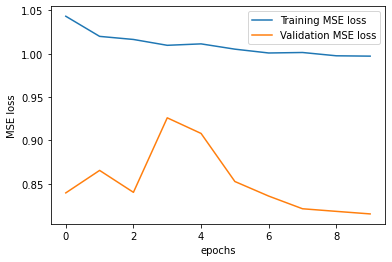

260/260 [==============================] - 0s 1ms/step
r2 score :-0.01371658981200552
########################################################################################
Optimizer algorithm : SGD No of units : 16,  Activation function : relu
Model: "sequential_157"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_450 (Dense)           (None, 16)                128       
                                                                 
 dense_451 (Dense)           (None, 1)                 17        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


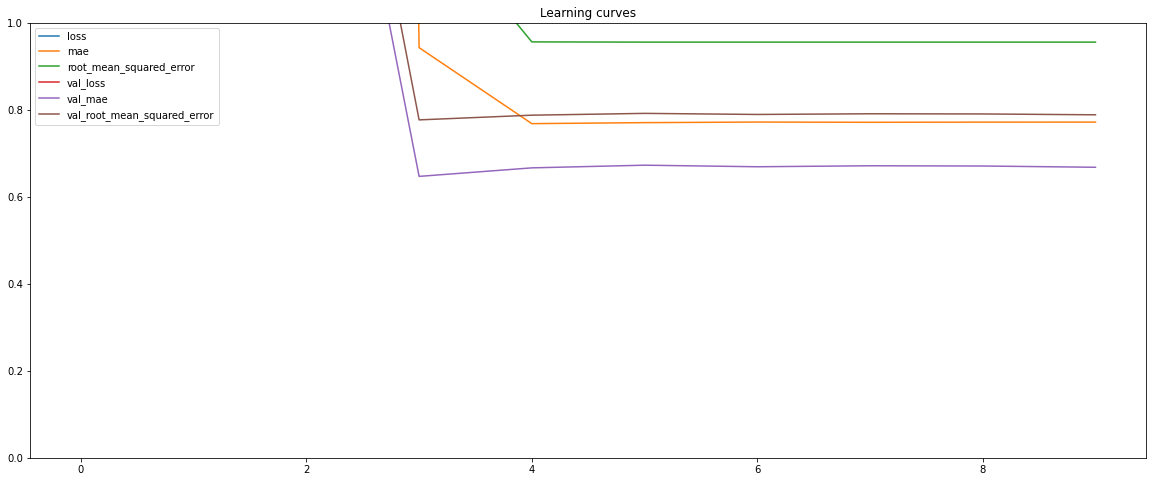

<class 'dict'>
loss [1.0829259673174016e+16, 1.0266624326107136e+16, 9610833285873664.0, 8996942872838144.0, 8422260679376896.0, 7884286497652736.0, 7380675275522048.0, 6909231210954752.0, 6467902383325184.0, 6054761426059264.0]
mae [27088.794921875, 494.14630126953125, 17.6234073638916, 0.943142294883728, 0.7683948278427124, 0.7707114219665527, 0.7720299363136292, 0.7714848518371582, 0.7718746662139893, 0.7719395160675049]
root_mean_squared_error [177823.125, 659.9696044921875, 23.555086135864258, 1.2721747159957886, 0.9563664793968201, 0.9558298587799072, 0.9558354616165161, 0.9558312296867371, 0.955813467502594, 0.9558061957359314]
val_loss [1.0605485434601472e+16, 9928053127905280.0, 9293896911683584.0, 8700250826997760.0, 8144517492375552.0, 7624287431163904.0, 7137277868244992.0, 6681387490869248.0, 6254607328083968.0, 5855092691435520.0]
val_mae [1684.0911865234375, 59.89897918701172, 1.9726842641830444, 0.6471225023269653, 0.6667051911354065, 0.672852635383606, 0.66924530267715

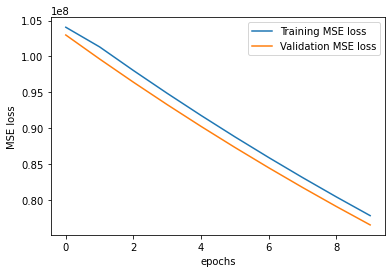

260/260 [==============================] - 0s 1ms/step
r2 score :-0.0035912444547183675
########################################################################################
Optimizer algorithm : SGD No of units : 32,  Activation function : relu
Model: "sequential_158"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_452 (Dense)           (None, 32)                256       
                                                                 
 dense_453 (Dense)           (None, 1)                 33        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


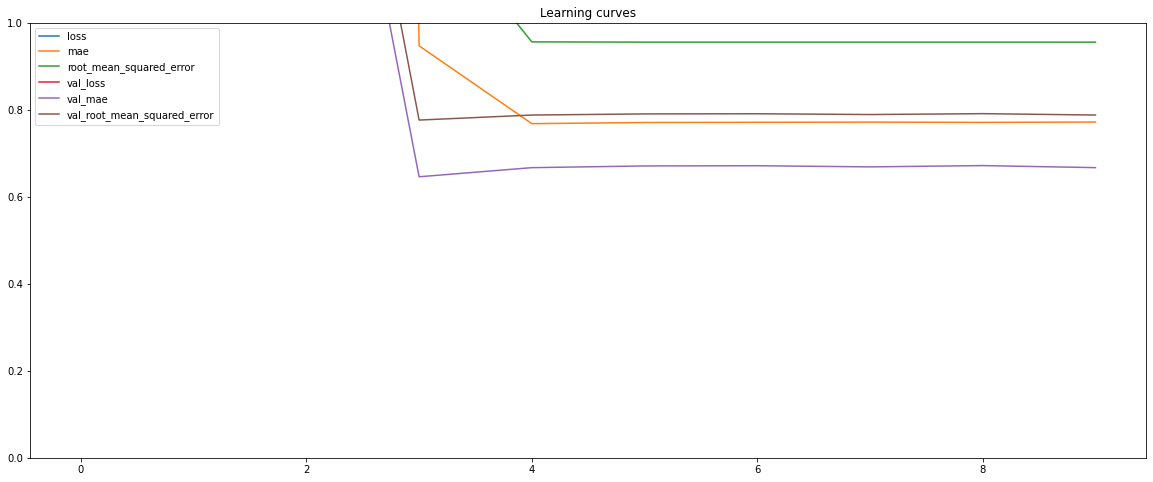

<class 'dict'>
loss [1.1141718543958016e+16, 1.0562877211541504e+16, 9888162545401856.0, 9256554318528512.0, 8665286035111936.0, 8111786083483648.0, 7593649818828800.0, 7108603055964160.0, 6654538576560128.0, 6229477474435072.0]
mae [26487.041015625, 500.931640625, 17.871185302734375, 0.9473519325256348, 0.768360435962677, 0.7709773182868958, 0.7714794278144836, 0.7718874216079712, 0.7712919116020203, 0.772085964679718]
root_mean_squared_error [146074.203125, 669.0364379882812, 23.878660202026367, 1.2780710458755493, 0.9563590288162231, 0.9558316469192505, 0.9558255672454834, 0.9558240175247192, 0.9558332562446594, 0.9558003544807434]
val_loss [1.0911517960568832e+16, 1.0214534962741248e+16, 9562077890871296.0, 8951296497287168.0, 8379529512878080.0, 7844290688450560.0, 7343229603151872.0, 6874181056593920.0, 6435094201892864.0, 6024048651796480.0]
val_mae [1707.2254638671875, 60.731040954589844, 1.9876625537872314, 0.6462138295173645, 0.667180061340332, 0.6711120009422302, 0.671623706

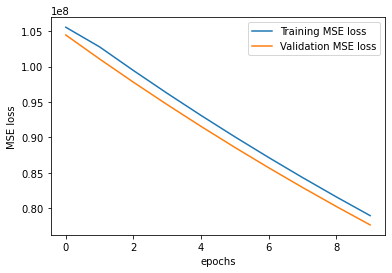

260/260 [==============================] - 0s 1ms/step
r2 score :-0.003196573954998838
########################################################################################
Optimizer algorithm : SGD No of units : 64,  Activation function : relu
Model: "sequential_159"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_454 (Dense)           (None, 64)                512       
                                                                 
 dense_455 (Dense)           (None, 1)                 65        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


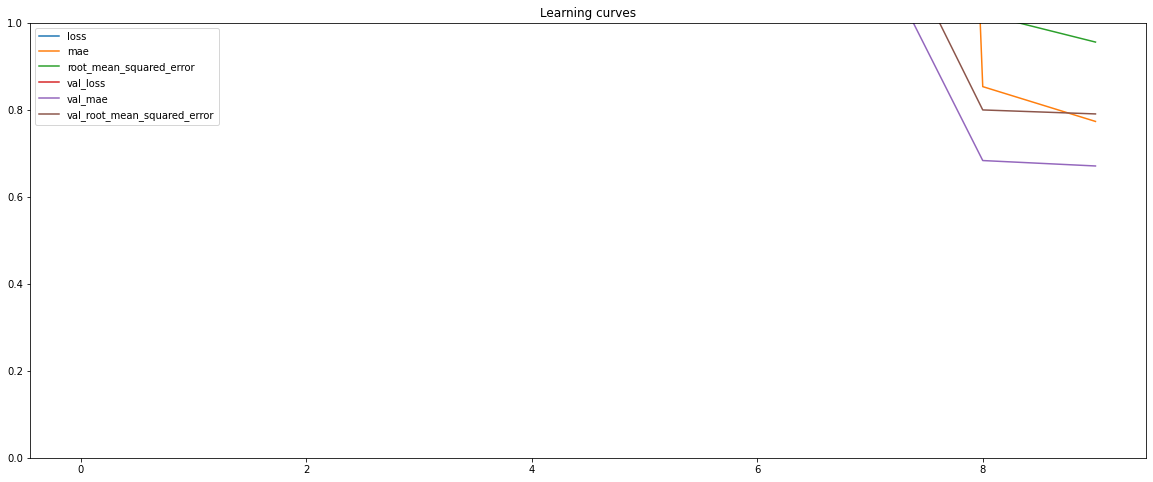

<class 'dict'>
loss [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
mae [42981863424.0, 3584049408.0, 127842792.0, 4560147.0, 162660.21875, 5802.08203125, 206.96163940429688, 7.420680522918701, 0.8535102605819702, 0.7734857797622681]
root_mean_squared_error [301110394880.0, 4786786304.0, 170744448.0, 6090448.0, 217245.953125, 7749.154296875, 276.4112548828125, 9.904211044311523, 1.0207949876785278, 0.9559653401374817]
val_loss [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
val_mae [12216009728.0, 435744672.0, 15542983.0, 554418.0, 19776.21484375, 705.582275390625, 25.327991485595703, 1.197485089302063, 0.6835288405418396, 0.6710397601127625]
val_root_mean_squared_error [12216010752.0, 435744384.0, 15542986.0, 554417.6875, 19776.216796875, 705.5826416015625, 25.33974266052246, 1.3224540948867798, 0.7999030351638794, 0.7907289862632751]


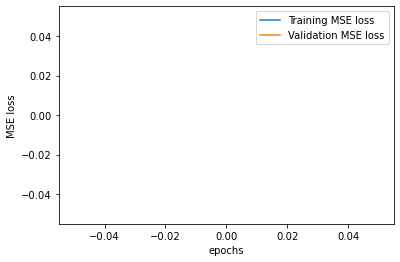

260/260 [==============================] - 0s 1ms/step
r2 score :-0.005183912235110055
########################################################################################
Optimizer algorithm : SGD No of units : 128,  Activation function : relu
Model: "sequential_160"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_456 (Dense)           (None, 128)               1024      
                                                                 
 dense_457 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


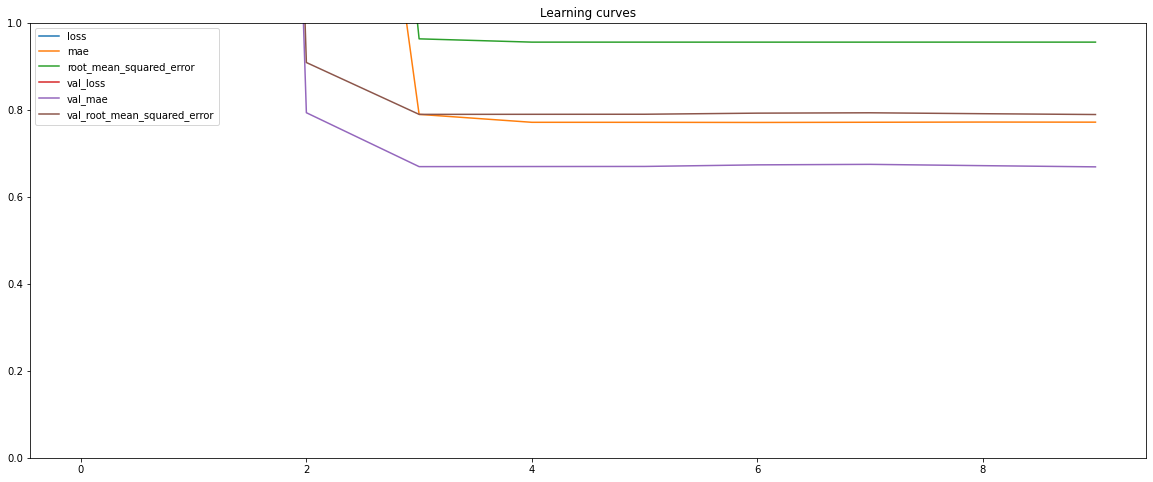

<class 'dict'>
loss [39655995080704.0, 37595136393216.0, 35193725386752.0, 32945721049088.0, 30841294028800.0, 28871309131776.0, 27027149160448.0, 25300771536896.0, 23684674748416.0, 22171812364288.0]
mae [3854.269287109375, 70.29911804199219, 2.681884288787842, 0.7897041440010071, 0.7714732885360718, 0.7714381217956543, 0.7711308002471924, 0.7715739607810974, 0.7720192670822144, 0.7718048095703125]
root_mean_squared_error [25303.708984375, 93.89865112304688, 3.485966682434082, 0.9633834958076477, 0.9558281302452087, 0.9558126926422119, 0.9558157324790955, 0.9558095932006836, 0.955845296382904, 0.9558289647102356]
val_loss [38836029620224.0, 36355371433984.0, 34033144692736.0, 31859266289664.0, 29824248709120.0, 27919218900992.0, 26135878434816.0, 24466419613696.0, 22903634526208.0, 21440657096704.0]
val_mae [239.78466796875, 8.724782943725586, 0.7935072183609009, 0.6695314049720764, 0.6697662472724915, 0.6699712872505188, 0.6736096739768982, 0.6747742295265198, 0.6717812418937683, 0.6

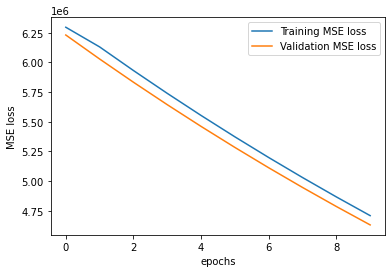

260/260 [==============================] - 0s 1ms/step
r2 score :-0.004077732435418868
########################################################################################
Optimizer algorithm : Adam No of units : 16,  Activation function : sigmoid
Model: "sequential_161"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_458 (Dense)           (None, 16)                128       
                                                                 
 dense_459 (Dense)           (None, 1)                 17        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


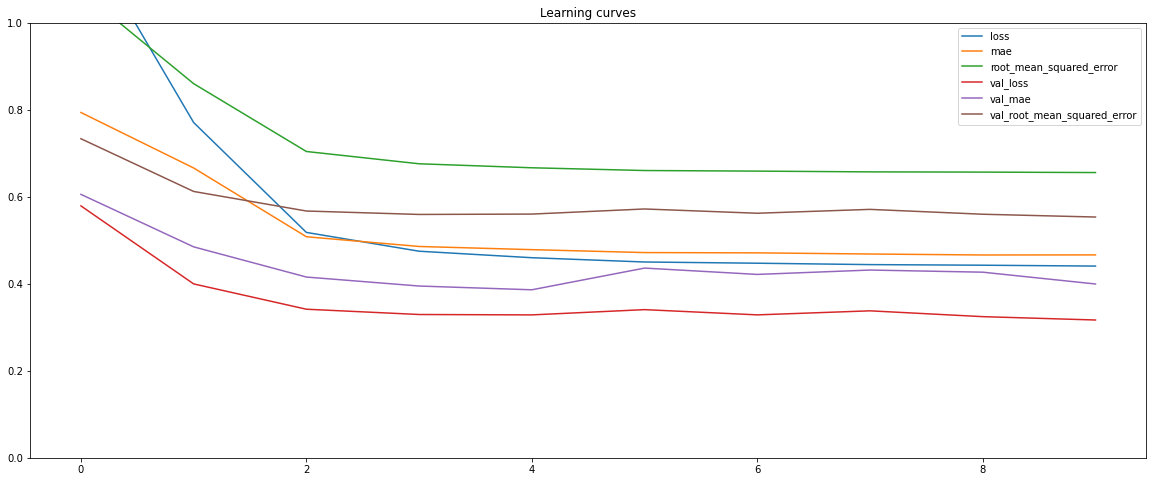

<class 'dict'>
loss [1.2124924659729004, 0.7709515690803528, 0.5182618498802185, 0.47503238916397095, 0.46009349822998047, 0.4502388834953308, 0.4474445581436157, 0.4442516267299652, 0.4428594708442688, 0.44085758924484253]
mae [0.7940188646316528, 0.6664138436317444, 0.508313775062561, 0.4859403669834137, 0.4786362946033478, 0.47193005681037903, 0.4712355434894562, 0.46860963106155396, 0.4663830101490021, 0.4665708839893341]
root_mean_squared_error [1.072885513305664, 0.8603224754333496, 0.7043366432189941, 0.6760959029197693, 0.6669099926948547, 0.6605963706970215, 0.6592141389846802, 0.6574794054031372, 0.6569405794143677, 0.6559202075004578]
val_loss [0.5792559385299683, 0.39985933899879456, 0.34166574478149414, 0.32949838042259216, 0.3286097049713135, 0.3407023847103119, 0.3286650478839874, 0.3379615247249603, 0.32457002997398376, 0.31686827540397644]
val_mae [0.6057748198509216, 0.48506009578704834, 0.4156405031681061, 0.39498233795166016, 0.3863411247730255, 0.43623724579811096,

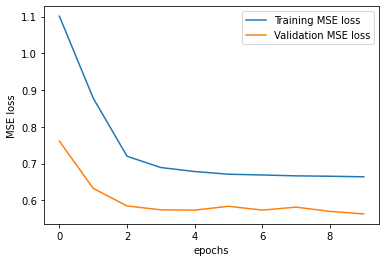

260/260 [==============================] - 0s 1ms/step
r2 score :0.4897145465872561
########################################################################################
Optimizer algorithm : Adam No of units : 32,  Activation function : sigmoid
Model: "sequential_162"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_460 (Dense)           (None, 32)                256       
                                                                 
 dense_461 (Dense)           (None, 1)                 33        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


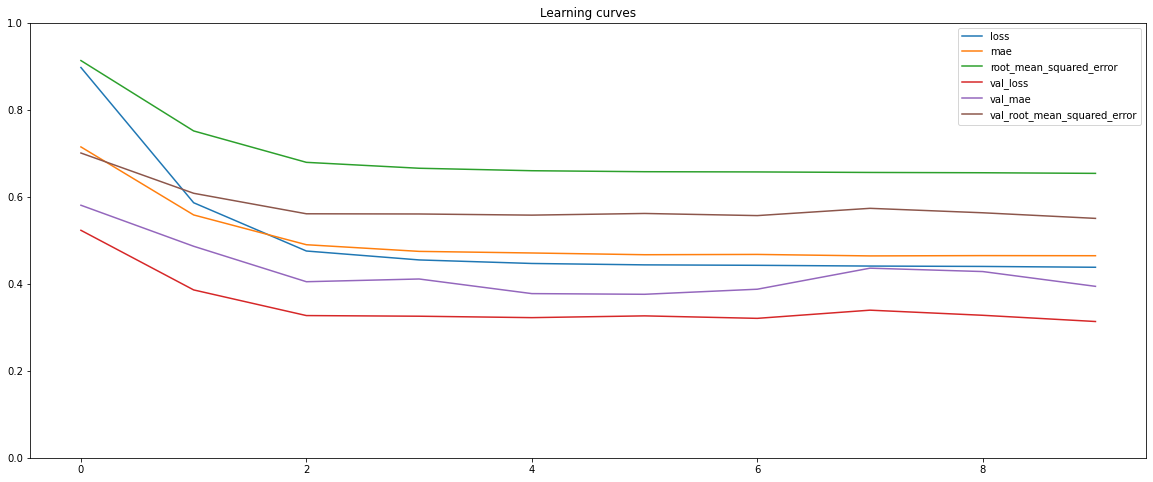

<class 'dict'>
loss [0.8974857330322266, 0.5865139365196228, 0.4755120873451233, 0.4549993872642517, 0.4468609392642975, 0.4436485767364502, 0.4426209628582001, 0.4409008324146271, 0.4400407075881958, 0.4381389617919922]
mae [0.7148697376251221, 0.5584558248519897, 0.4899848401546478, 0.4746505320072174, 0.47097504138946533, 0.4669687747955322, 0.46766921877861023, 0.4642298221588135, 0.46496298909187317, 0.46467775106430054]
root_mean_squared_error [0.9134358763694763, 0.7516257762908936, 0.6794054508209229, 0.6658117771148682, 0.6601270437240601, 0.6578652858734131, 0.6573325991630554, 0.6561568379402161, 0.6554731726646423, 0.6540535688400269]
val_loss [0.5231328010559082, 0.3860436677932739, 0.32706040143966675, 0.32557418942451477, 0.3223021626472473, 0.32635870575904846, 0.3206556737422943, 0.3394717872142792, 0.3277115821838379, 0.31340038776397705]
val_mae [0.580763041973114, 0.48640769720077515, 0.404893696308136, 0.4111727476119995, 0.37755486369132996, 0.37599238753318787, 0

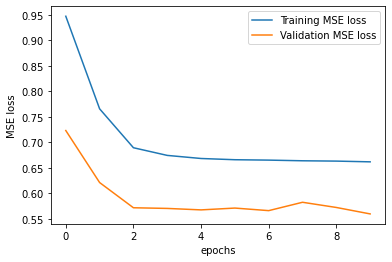

260/260 [==============================] - 0s 1ms/step
r2 score :0.4919183532350019
########################################################################################
Optimizer algorithm : Adam No of units : 64,  Activation function : sigmoid
Model: "sequential_163"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_462 (Dense)           (None, 64)                512       
                                                                 
 dense_463 (Dense)           (None, 1)                 65        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


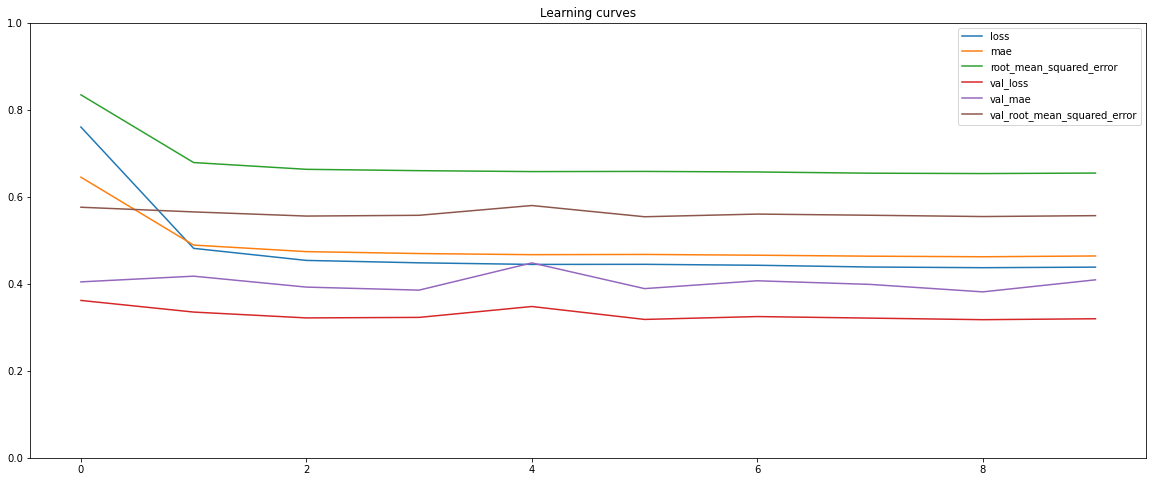

<class 'dict'>
loss [0.7605507969856262, 0.4816204607486725, 0.4538753926753998, 0.4483659267425537, 0.4446783661842346, 0.4448954164981842, 0.4427417814731598, 0.4387054741382599, 0.43715140223503113, 0.4384322166442871]
mae [0.6452151536941528, 0.48912036418914795, 0.4740965664386749, 0.46966835856437683, 0.4670943319797516, 0.46764203906059265, 0.4658493101596832, 0.46362605690956116, 0.46229806542396545, 0.4641410708427429]
root_mean_squared_error [0.8346392512321472, 0.67892986536026, 0.6633424162864685, 0.6602630019187927, 0.6581453680992126, 0.6585323214530945, 0.6572701334953308, 0.6544519662857056, 0.6536291837692261, 0.6547147631645203]
val_loss [0.36185985803604126, 0.3351054787635803, 0.32167553901672363, 0.3228597640991211, 0.3478824198246002, 0.31819912791252136, 0.3247772753238678, 0.32119765877723694, 0.3176043927669525, 0.31974294781684875]
val_mae [0.40455764532089233, 0.4176352024078369, 0.39251625537872314, 0.3855397701263428, 0.44814857840538025, 0.3890485167503357

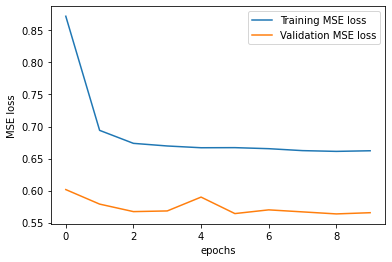

260/260 [==============================] - 0s 1ms/step
r2 score :0.4863502636889332
########################################################################################
Optimizer algorithm : Adam No of units : 128,  Activation function : sigmoid
Model: "sequential_164"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_464 (Dense)           (None, 128)               1024      
                                                                 
 dense_465 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


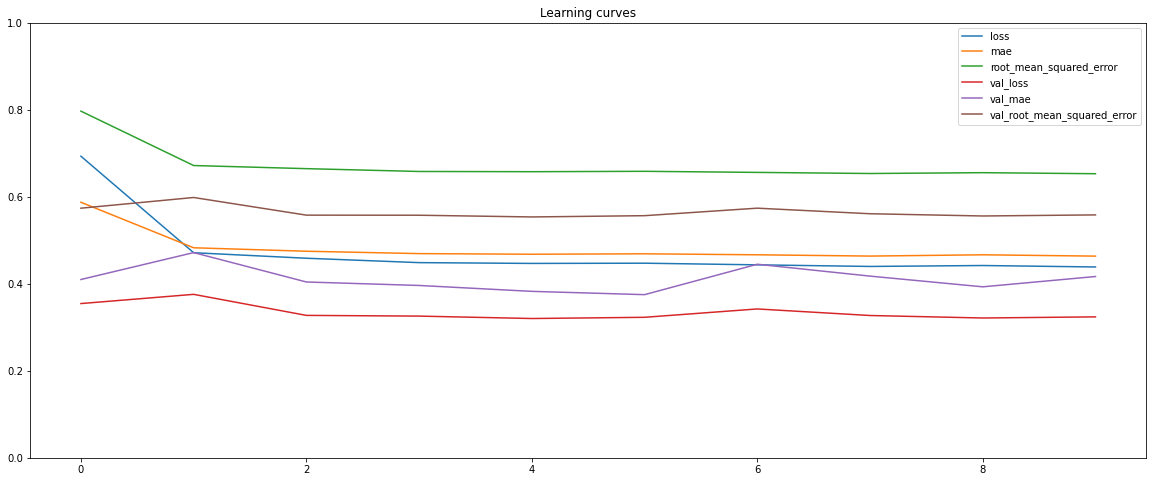

<class 'dict'>
loss [0.693446934223175, 0.4715876579284668, 0.4588780403137207, 0.4487932622432709, 0.4469687044620514, 0.4474814832210541, 0.44370028376579285, 0.440017968416214, 0.4421548843383789, 0.4388127326965332]
mae [0.587602972984314, 0.4829573631286621, 0.4749744236469269, 0.46953025460243225, 0.4680781066417694, 0.4690779745578766, 0.4668094217777252, 0.4638546407222748, 0.46680212020874023, 0.46375760436058044]
root_mean_squared_error [0.7971249222755432, 0.6720699667930603, 0.6648946404457092, 0.6584036350250244, 0.6578883528709412, 0.6587606072425842, 0.6562730669975281, 0.6537262201309204, 0.6556386351585388, 0.6532361507415771]
val_loss [0.3546769618988037, 0.3758508861064911, 0.3274691700935364, 0.32582661509513855, 0.3202706277370453, 0.3230781853199005, 0.34227755665779114, 0.3272109925746918, 0.3214767575263977, 0.3240692615509033]
val_mae [0.40998080372810364, 0.4718749523162842, 0.40429529547691345, 0.39628031849861145, 0.3827214241027832, 0.3751431703567505, 0.44

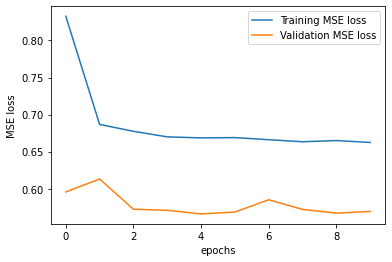

260/260 [==============================] - 0s 1ms/step
r2 score :0.4854999427444636
########################################################################################
Optimizer algorithm : Adam No of units : 16,  Activation function : relu
Model: "sequential_165"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_466 (Dense)           (None, 16)                128       
                                                                 
 dense_467 (Dense)           (None, 1)                 17        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


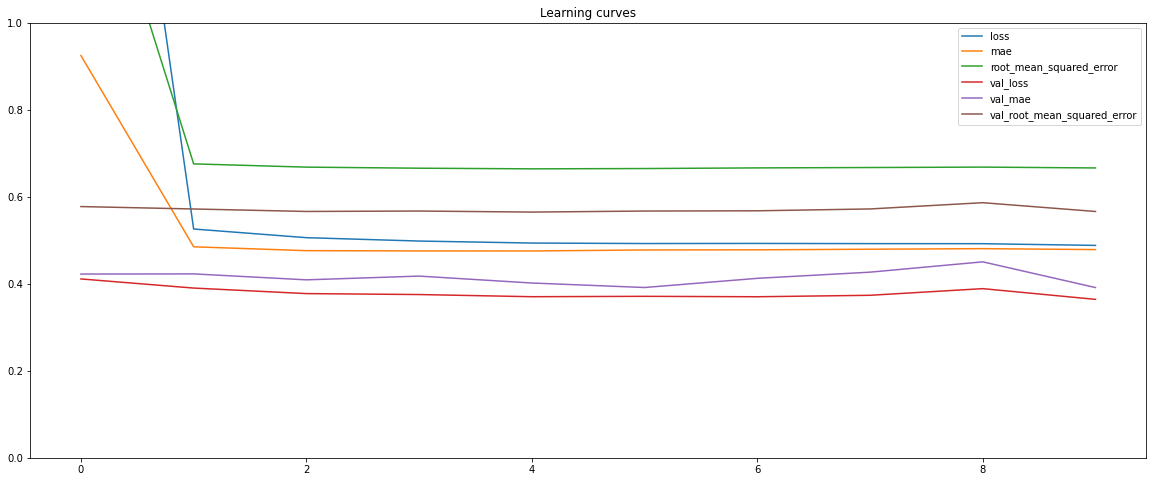

<class 'dict'>
loss [2.3414440155029297, 0.526121199131012, 0.5061739683151245, 0.49841368198394775, 0.49380600452423096, 0.4927024841308594, 0.49294188618659973, 0.4925038814544678, 0.49232929944992065, 0.48841261863708496]
mae [0.9250257015228271, 0.485175758600235, 0.4763166010379791, 0.47572779655456543, 0.47557446360588074, 0.4779203236103058, 0.4782158434391022, 0.47961074113845825, 0.48091205954551697, 0.47881126403808594]
root_mean_squared_error [1.499711036682129, 0.6758841276168823, 0.6683743596076965, 0.6659200191497803, 0.6644579172134399, 0.6651540398597717, 0.6666337847709656, 0.6674870252609253, 0.6684373021125793, 0.6665219664573669]
val_loss [0.4112774431705475, 0.39029935002326965, 0.37758439779281616, 0.3754185438156128, 0.3704245686531067, 0.371311217546463, 0.3703354597091675, 0.3736943006515503, 0.3889627754688263, 0.36433693766593933]
val_mae [0.42250245809555054, 0.422890305519104, 0.4092146158218384, 0.4178330600261688, 0.40192314982414246, 0.39157047867774963,

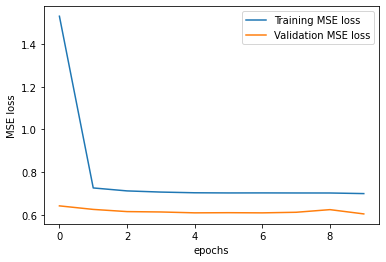

260/260 [==============================] - 0s 1ms/step
r2 score :0.45571240357717535
########################################################################################
Optimizer algorithm : Adam No of units : 32,  Activation function : relu
Model: "sequential_166"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_468 (Dense)           (None, 32)                256       
                                                                 
 dense_469 (Dense)           (None, 1)                 33        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


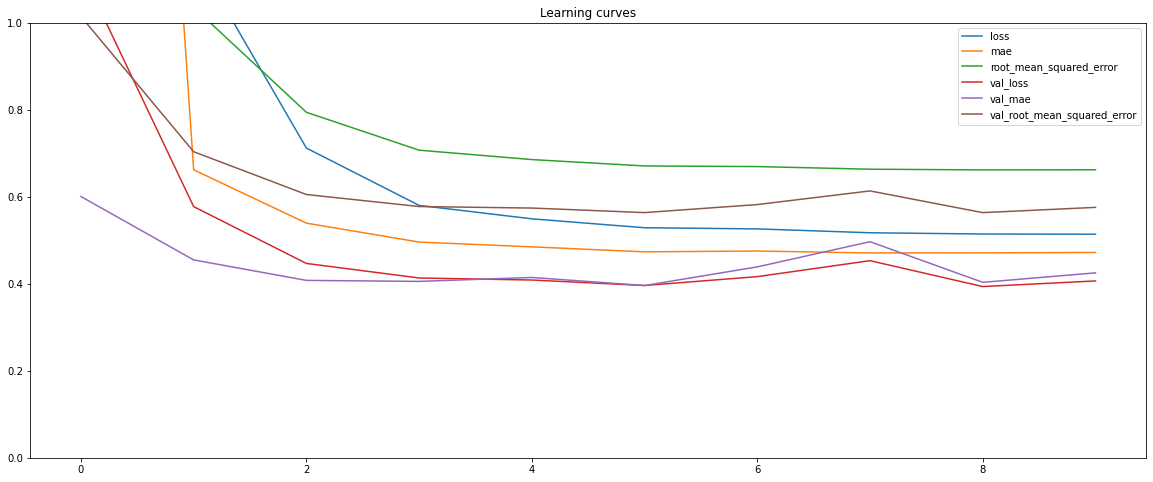

<class 'dict'>
loss [94.3957290649414, 1.15928316116333, 0.7122660875320435, 0.5803999304771423, 0.5495155453681946, 0.5290046334266663, 0.5263637900352478, 0.5174762010574341, 0.5146047472953796, 0.5141412019729614]
mae [4.495141506195068, 0.6622254252433777, 0.5395660400390625, 0.49608084559440613, 0.48504403233528137, 0.47359132766723633, 0.47549182176589966, 0.47102993726730347, 0.47124144434928894, 0.4722193479537964]
root_mean_squared_error [9.710390090942383, 1.0358335971832275, 0.7945024371147156, 0.7073832154273987, 0.6857544779777527, 0.6711185574531555, 0.6696855425834656, 0.6636039018630981, 0.6620515584945679, 0.6623050570487976]
val_loss [1.1223686933517456, 0.5776037573814392, 0.4469366669654846, 0.41346651315689087, 0.40879467129707336, 0.39622071385383606, 0.4165787398815155, 0.4532841742038727, 0.3937737047672272, 0.406712144613266]
val_mae [0.6008036732673645, 0.45503130555152893, 0.40794751048088074, 0.4056412875652313, 0.41466501355171204, 0.39614367485046387, 0.43

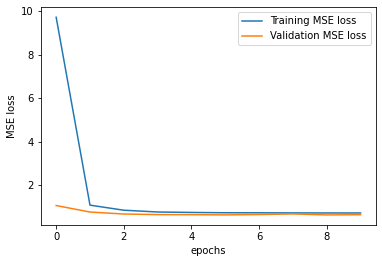

260/260 [==============================] - 0s 1ms/step
r2 score :0.45590262055910613
########################################################################################
Optimizer algorithm : Adam No of units : 64,  Activation function : relu
Model: "sequential_167"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_470 (Dense)           (None, 64)                512       
                                                                 
 dense_471 (Dense)           (None, 1)                 65        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


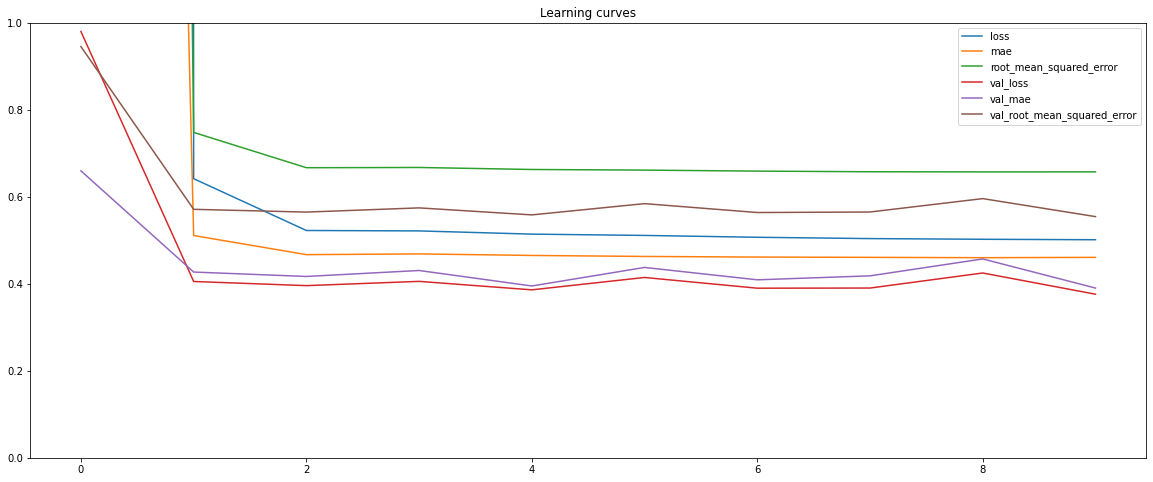

<class 'dict'>
loss [479.287109375, 0.6418126821517944, 0.5226967334747314, 0.5217105150222778, 0.5143352150917053, 0.511338472366333, 0.5071009397506714, 0.5040718913078308, 0.5024913549423218, 0.5014499425888062]
mae [11.112282752990723, 0.5111281275749207, 0.46716639399528503, 0.46882277727127075, 0.4653306305408478, 0.4630052149295807, 0.46158984303474426, 0.4609221816062927, 0.46013572812080383, 0.46090033650398254]
root_mean_squared_error [21.89027976989746, 0.7482486963272095, 0.6670578718185425, 0.6676151156425476, 0.6629724502563477, 0.6615443825721741, 0.6592125296592712, 0.6577581167221069, 0.6574172377586365, 0.6574756503105164]
val_loss [0.980289101600647, 0.4054311215877533, 0.39590510725975037, 0.4056970179080963, 0.3862285017967224, 0.4146431088447571, 0.39000841975212097, 0.3903478682041168, 0.42494648694992065, 0.3761928081512451]
val_mae [0.6598434448242188, 0.42711636424064636, 0.41697928309440613, 0.4307238757610321, 0.39509809017181396, 0.43771594762802124, 0.4092

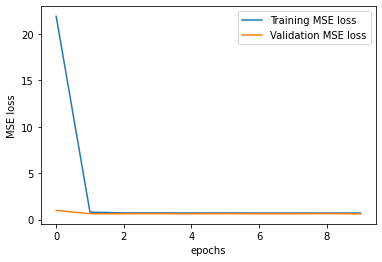

260/260 [==============================] - 0s 1ms/step
r2 score :0.4723487124039659
########################################################################################
Optimizer algorithm : Adam No of units : 128,  Activation function : relu
Model: "sequential_168"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_472 (Dense)           (None, 128)               1024      
                                                                 
 dense_473 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


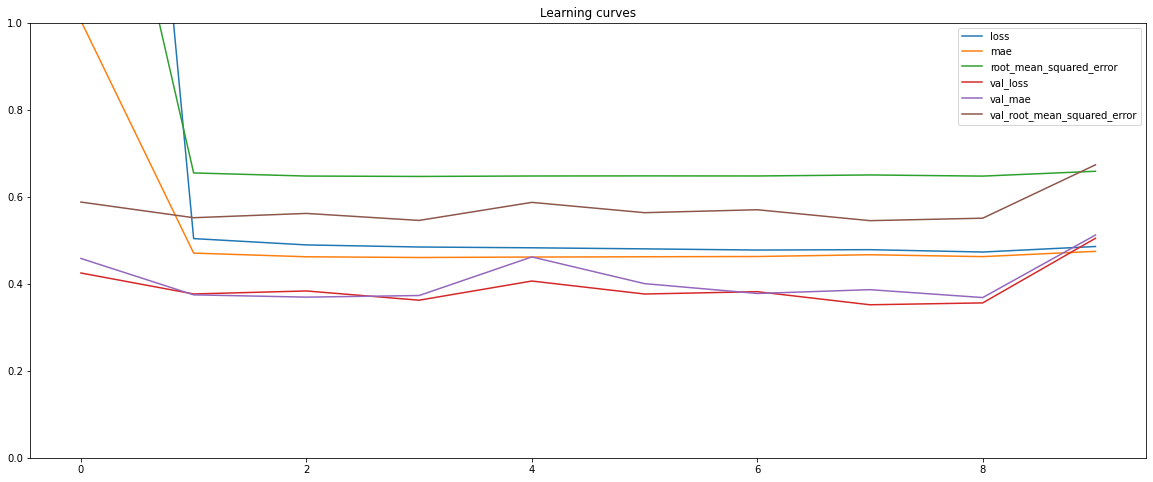

<class 'dict'>
loss [3.2829675674438477, 0.5040501952171326, 0.4895298182964325, 0.48471134901046753, 0.4829045832157135, 0.4804479777812958, 0.4777369797229767, 0.47858598828315735, 0.4731661379337311, 0.48584839701652527]
mae [1.0048131942749023, 0.47071021795272827, 0.462243914604187, 0.4606057405471802, 0.4616285264492035, 0.46228063106536865, 0.4628828763961792, 0.46694889664649963, 0.4625840187072754, 0.47475048899650574]
root_mean_squared_error [1.7854011058807373, 0.6550313234329224, 0.6478687524795532, 0.6469834446907043, 0.6480074524879456, 0.648255467414856, 0.6480532884597778, 0.6503962874412537, 0.6477581858634949, 0.6588656306266785]
val_loss [0.42493483424186707, 0.37671878933906555, 0.38365358114242554, 0.3624020218849182, 0.4064704477787018, 0.37662747502326965, 0.3819947838783264, 0.3518880307674408, 0.35619011521339417, 0.504733681678772]
val_mae [0.4583696126937866, 0.37471142411231995, 0.36945295333862305, 0.37314459681510925, 0.4619194567203522, 0.4004687964916229

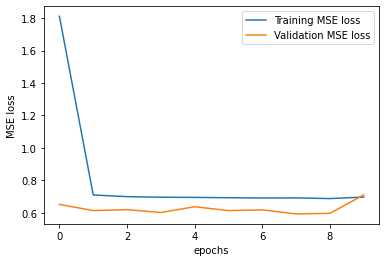

260/260 [==============================] - 0s 1ms/step
r2 score :0.2108017728699686
########################################################################################


In [77]:
optimizer_algos = ['SGD','Adam']
activation_func_list = ['sigmoid','relu']
no_of_units_list = [16,32,64,128]
for k in optimizer_algos:
    for i in activation_func_list:
        for j in no_of_units_list:
            ann_10(k,j,i)
            print("########################################################################################")

### 11.  Model with 2 hidden layer
###     Optimizer = 'SGD' , 'Adam'
###     Activation function = 'sigmoid', 'relu'
###     No of units = 16,32,64,128
###     Regularization = L2 ( lambda = 0.01)

In [48]:
def ann_11(optimizer_algo,no_of_units1,no_of_units2,activation_func):
    print("Optimizer algorithm : "+ optimizer_algo+" No of units : "+ str(no_of_units1)+",  Activation function : "+activation_func)
    #dense_layer = tf.keras.layers.Dense(units = no_of_units1,activation= activation_func,kernel_regularizer = tf.keras.regularizers.L2(0.01))
    ann= Sequential(
                [
                    Dense(no_of_units1,activation= activation_func,kernel_regularizer = tf.keras.regularizers.L2(0.01)),
                    Dense(no_of_units2,activation= activation_func,kernel_regularizer = tf.keras.regularizers.L2(0.01)),
                    Dense(1,activation = 'linear')
                ])
    ann.compile(optimizer = optimizer_algo,loss='mse',metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])
    model_store = ann.fit(X_train,Y_train,
              epochs=10,
              batch_size=128,
              verbose=0,
              validation_split=0.2)
    ann.summary()
    training_loss_curves(model_store)
    validation_vs_training(model_store)
    res = ann.evaluate(X_test, Y_test, batch_size=128)
    pred_values= ann.predict(X_test)
    print("r2 score :"+str(skm.r2_score(Y_test,pred_values)))

Optimizer algorithm : SGD No of units : 16,  Activation function : sigmoid
Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_223 (Dense)           (None, 16)                128       
                                                                 
 dense_224 (Dense)           (None, 16)                272       
                                                                 
 dense_225 (Dense)           (None, 1)                 17        
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


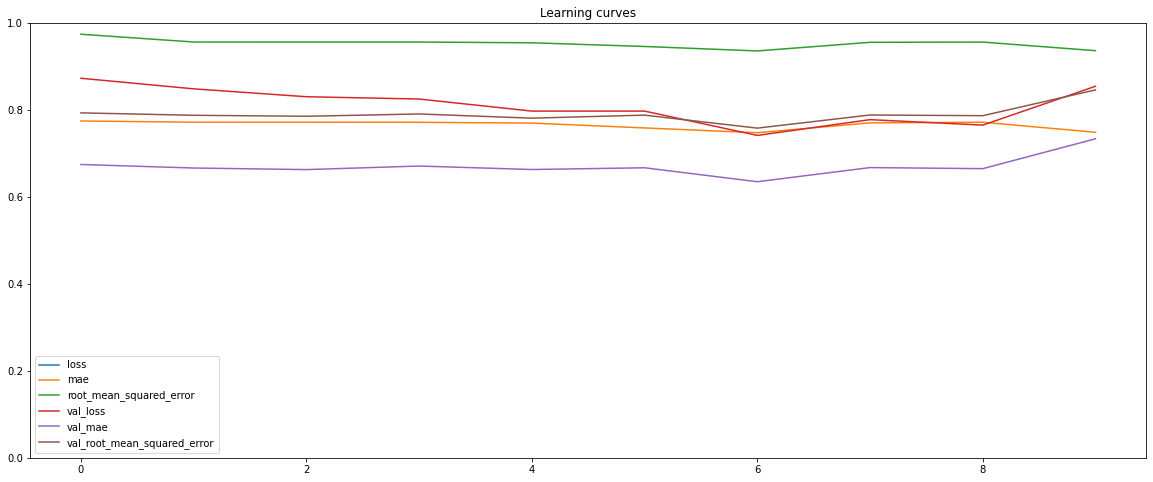

<class 'dict'>
loss [1.200587511062622, 1.1500294208526611, 1.1347986459732056, 1.1207218170166016, 1.1042132377624512, 1.0765374898910522, 1.0466257333755493, 1.0743166208267212, 1.0650558471679688, 1.0185219049453735]
mae [0.774474561214447, 0.7717016935348511, 0.7716743350028992, 0.771501898765564, 0.7696605920791626, 0.758526086807251, 0.7475036382675171, 0.7701963186264038, 0.771609902381897, 0.748551070690155]
root_mean_squared_error [0.9739800691604614, 0.9561077356338501, 0.9560208916664124, 0.9560351371765137, 0.9543002843856812, 0.9458367228507996, 0.9355584979057312, 0.9554139375686646, 0.9559586644172668, 0.9361851811408997]
val_loss [0.872745156288147, 0.8484253883361816, 0.8302935361862183, 0.8250002861022949, 0.7972555160522461, 0.7972384095191956, 0.7413232326507568, 0.7775549292564392, 0.7650263905525208, 0.8542869687080383]
val_mae [0.6744804382324219, 0.6663435101509094, 0.6627299785614014, 0.6708985567092896, 0.6629055142402649, 0.666917622089386, 0.6348498463630676

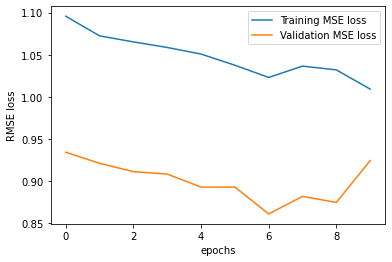

260/260 [==============================] - 0s 1ms/step
r2 score :-0.08707855612418158
########################################################################################
Optimizer algorithm : SGD No of units : 32,  Activation function : sigmoid
Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_226 (Dense)           (None, 32)                256       
                                                                 
 dense_227 (Dense)           (None, 32)                1056      
                                                                 
 dense_228 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


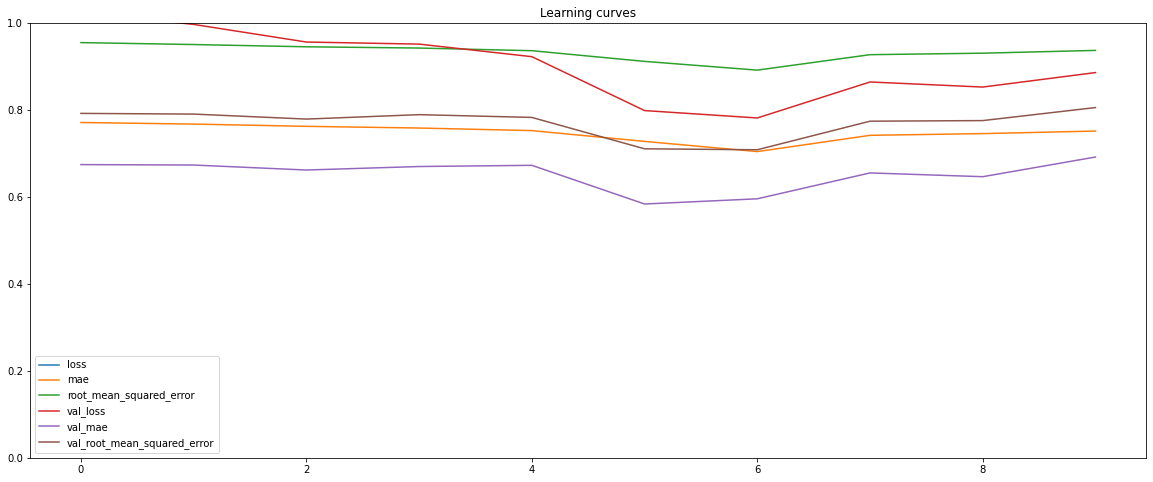

<class 'dict'>
loss [1.3215610980987549, 1.2872893810272217, 1.2538505792617798, 1.226771593093872, 1.195467233657837, 1.1324175596237183, 1.0812259912490845, 1.132119059562683, 1.1241116523742676, 1.1219052076339722]
mae [0.770999550819397, 0.7673808336257935, 0.7621894478797913, 0.7583082318305969, 0.7523883581161499, 0.7275519967079163, 0.7041478157043457, 0.7415176630020142, 0.745484471321106, 0.7513599395751953]
root_mean_squared_error [0.9547390341758728, 0.9502757787704468, 0.945106029510498, 0.9422231316566467, 0.9361388683319092, 0.9115340709686279, 0.8914563655853271, 0.9269666075706482, 0.9304059147834778, 0.9367951154708862]
val_loss [1.0238771438598633, 0.9965757131576538, 0.9560384154319763, 0.9512866735458374, 0.9223872423171997, 0.7984265089035034, 0.7814435362815857, 0.8642017841339111, 0.8525169491767883, 0.8858142495155334]
val_mae [0.6742520928382874, 0.6732097268104553, 0.6617355346679688, 0.6698000431060791, 0.6725446581840515, 0.5836074352264404, 0.59554004669189

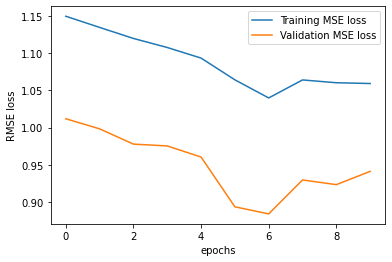

260/260 [==============================] - 0s 1ms/step
r2 score :-0.019090535454003632
########################################################################################
Optimizer algorithm : SGD No of units : 64,  Activation function : sigmoid
Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_229 (Dense)           (None, 64)                512       
                                                                 
 dense_230 (Dense)           (None, 64)                4160      
                                                                 
 dense_231 (Dense)           (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


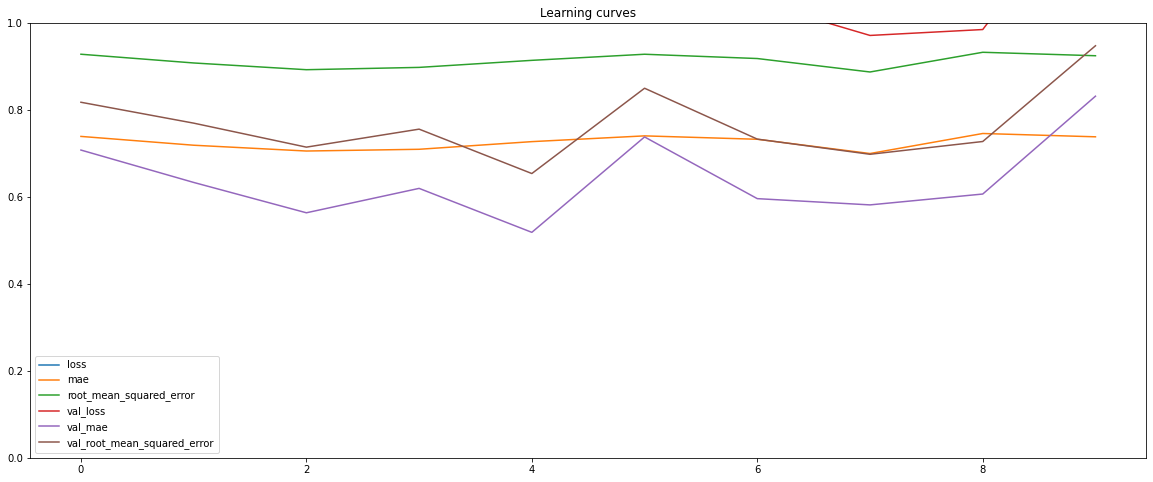

<class 'dict'>
loss [1.6074743270874023, 1.5273014307022095, 1.4589744806289673, 1.4321937561035156, 1.4265813827514648, 1.4186689853668213, 1.368671178817749, 1.2843449115753174, 1.339528203010559, 1.2979227304458618]
mae [0.7390260100364685, 0.7187593579292297, 0.7054294347763062, 0.7094277739524841, 0.7270205616950989, 0.7402657270431519, 0.7324524521827698, 0.6996926069259644, 0.7457327246665955, 0.7381221652030945]
root_mean_squared_error [0.9279994368553162, 0.9079166054725647, 0.892422080039978, 0.8977447152137756, 0.9139397144317627, 0.9279670715332031, 0.9181201457977295, 0.8871765732765198, 0.9324928522109985, 0.9245365262031555]
val_loss [1.391966700553894, 1.2746410369873047, 1.154206395149231, 1.1799557209014893, 1.0014734268188477, 1.2631841897964478, 1.0477142333984375, 0.9711925387382507, 0.9847949743270874, 1.3274853229522705]
val_mae [0.7076507210731506, 0.6332123279571533, 0.563402533531189, 0.6195207834243774, 0.5184418559074402, 0.7378197312355042, 0.59592944383621

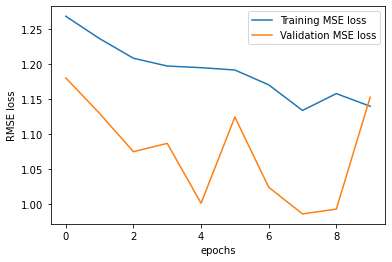

260/260 [==============================] - 0s 1ms/step
r2 score :-0.3082611064039049
########################################################################################
Optimizer algorithm : SGD No of units : 128,  Activation function : sigmoid
Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_232 (Dense)           (None, 128)               1024      
                                                                 
 dense_233 (Dense)           (None, 128)               16512     
                                                                 
 dense_234 (Dense)           (None, 1)                 129       
                                                                 
Total params: 17,665
Trainable params: 17,665
Non-trainable params: 0
_________________________________________________________________


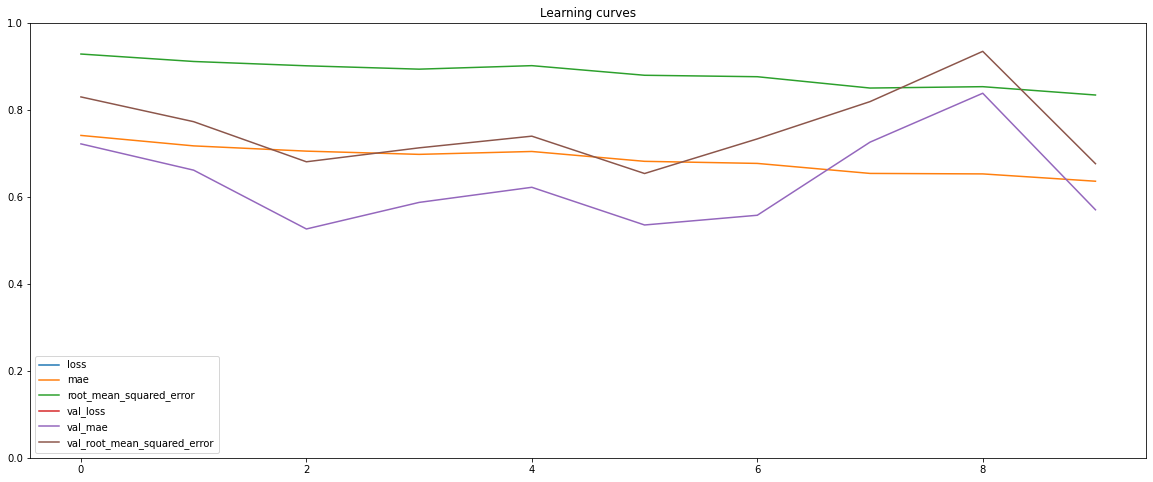

<class 'dict'>
loss [2.2254128456115723, 2.1112375259399414, 2.0176498889923096, 1.933383584022522, 1.8821051120758057, 1.7816524505615234, 1.7191152572631836, 1.621160864830017, 1.5765879154205322, 1.4976329803466797]
mae [0.7412987351417542, 0.7172526121139526, 0.7051706314086914, 0.6977419853210449, 0.7043790817260742, 0.6817309856414795, 0.676945149898529, 0.6539222598075867, 0.6528134942054749, 0.6359900236129761]
root_mean_squared_error [0.9284533262252808, 0.9113286733627319, 0.9014057517051697, 0.8936691284179688, 0.9017369151115417, 0.8796281814575195, 0.876291811466217, 0.8502476215362549, 0.8533951640129089, 0.834221601486206]
val_loss [2.0090808868408203, 1.8390028476715088, 1.6320542097091675, 1.6087793111801147, 1.584274172782898, 1.406058669090271, 1.461715817451477, 1.5432565212249756, 1.6980509757995605, 1.2359825372695923]
val_mae [0.7218645811080933, 0.6614297032356262, 0.5261740684509277, 0.5872681140899658, 0.6220316886901855, 0.5353574752807617, 0.5577291250228882

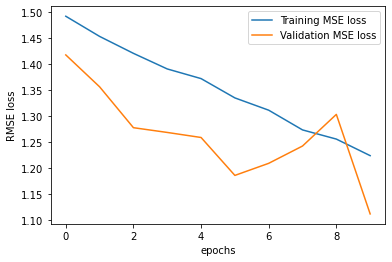

260/260 [==============================] - 0s 1ms/step
r2 score :0.29705446032532123
########################################################################################
Optimizer algorithm : SGD No of units : 16,  Activation function : relu
Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_235 (Dense)           (None, 16)                128       
                                                                 
 dense_236 (Dense)           (None, 16)                272       
                                                                 
 dense_237 (Dense)           (None, 1)                 17        
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


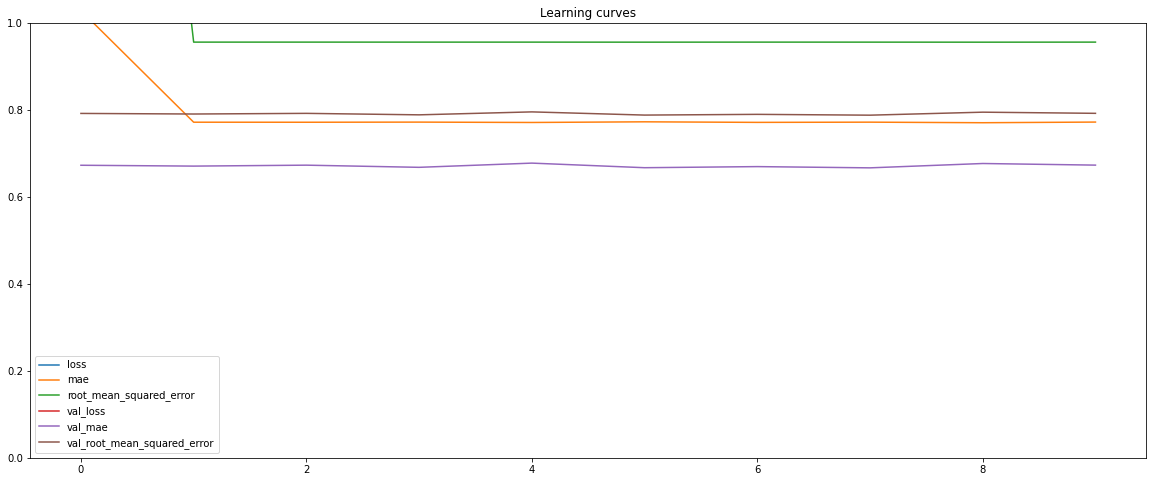

<class 'dict'>
loss [149.53591918945312, 132.0325469970703, 123.65731811523438, 115.81698608398438, 108.47749328613281, 101.60667419433594, 95.17504119873047, 89.15397644042969, 83.51738739013672, 78.24134063720703]
mae [1.0283836126327515, 0.7716894149780273, 0.7715976238250732, 0.7719188928604126, 0.7710898518562317, 0.7725862860679626, 0.771304726600647, 0.7718104720115662, 0.7705065011978149, 0.7720063924789429]
root_mean_squared_error [3.217069387435913, 0.9558428525924683, 0.9558659195899963, 0.9558250308036804, 0.9558359384536743, 0.9557496905326843, 0.9558545351028442, 0.9558072090148926, 0.955710768699646, 0.9558629393577576]
val_loss [136.07379150390625, 127.419921875, 119.32321166992188, 111.73612213134766, 104.64942169189453, 97.99370574951172, 91.77660369873047, 85.95121765136719, 80.51160430908203, 75.4050521850586]
val_mae [0.6727016568183899, 0.6707444787025452, 0.6729098558425903, 0.6679332852363586, 0.6776155829429626, 0.6670684218406677, 0.6695876717567444, 0.6667446

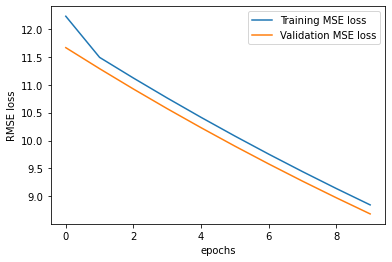

260/260 [==============================] - 0s 1ms/step
r2 score :-0.00638420287654351
########################################################################################
Optimizer algorithm : SGD No of units : 32,  Activation function : relu
Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_238 (Dense)           (None, 32)                256       
                                                                 
 dense_239 (Dense)           (None, 32)                1056      
                                                                 
 dense_240 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


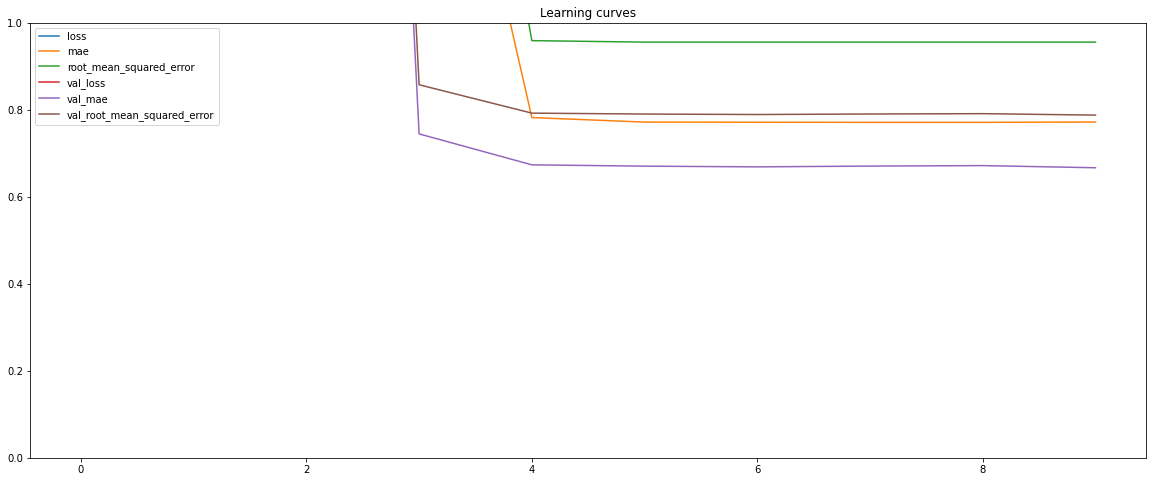

<class 'dict'>
loss [4.379750637617807e+19, 4.152208465468169e+19, 3.886985590029995e+19, 3.6387031101432922e+19, 3.4062793262686536e+19, 3.1887031275131765e+19, 2.985023216416509e+19, 2.7943536065089896e+19, 2.615864826218624e+19, 2.4487753426803884e+19]
mae [72402.28125, 1320.7353515625, 47.106929779052734, 1.9193137884140015, 0.7823923230171204, 0.7719244956970215, 0.7716315388679504, 0.7714319229125977, 0.7714130282402039, 0.7720884084701538]
root_mean_squared_error [475291.28125, 1763.9486083984375, 62.92668533325195, 2.4425578117370605, 0.9592626690864563, 0.9558407664299011, 0.955820620059967, 0.9558423757553101, 0.9558145403862, 0.9558219313621521]
val_loss [4.289257312214634e+19, 4.015282324219363e+19, 3.758802765245265e+19, 3.518710107669214e+19, 3.2939516790587785e+19, 3.0835495737722143e+19, 2.8865876787212583e+19, 2.7022037568874086e+19, 2.5296013220475044e+19, 2.368021271373729e+19]
val_mae [4501.81103515625, 160.7367706298828, 5.90108585357666, 0.7448213696479797, 0.6736

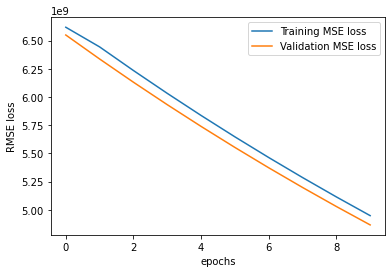

260/260 [==============================] - 0s 1ms/step
r2 score :-0.0030782238687943053
########################################################################################
Optimizer algorithm : SGD No of units : 64,  Activation function : relu
Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_241 (Dense)           (None, 64)                512       
                                                                 
 dense_242 (Dense)           (None, 64)                4160      
                                                                 
 dense_243 (Dense)           (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


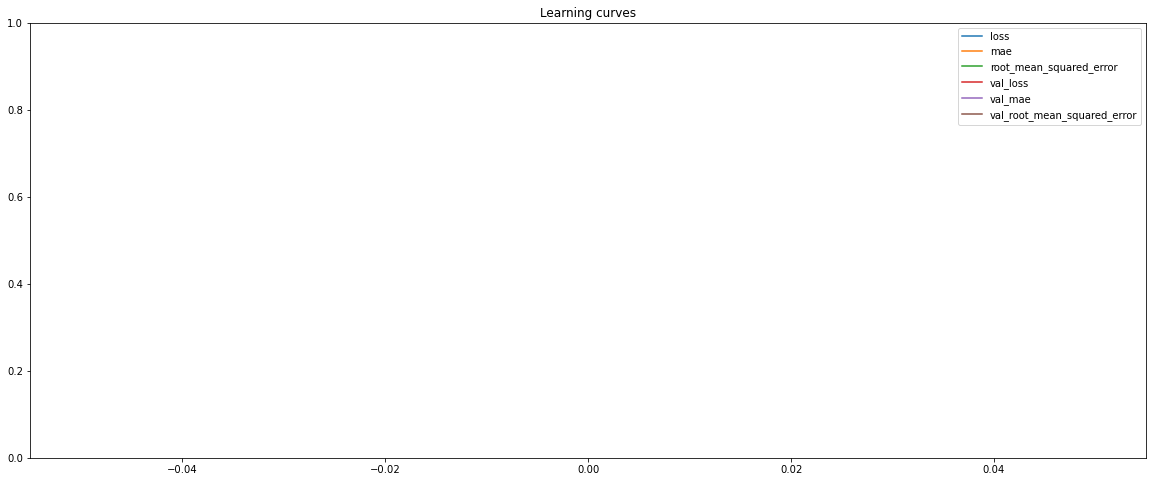

<class 'dict'>
loss [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mae [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
root_mean_squared_error [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
val_loss [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
val_mae [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
val_root_mean_squared_error [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


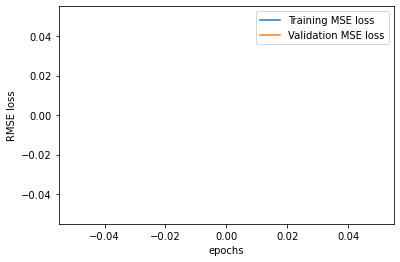

260/260 [==============================] - 0s 1ms/step


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [49]:
optimizer_algos = ['SGD','Adam']
activation_func_list = ['sigmoid','relu']
no_of_units_list = [16,32,64,128]
for k in optimizer_algos:
    for i in activation_func_list:
        for j in no_of_units_list:
            ann_11(k,j,j,i)
            print("########################################################################################")

### 12.  Model with 3 hidden layer
###     Optimizer = 'SGD' , 'Adam'
###     Activation function = 'sigmoid', 'relu'
###     No of units = 16,32,64,128
###     Regularization = L2 ( lambda = 0.01)

In [78]:
def ann_12(optimizer_algo,no_of_units1,no_of_units2,no_of_units3,activation_func):
    print("Optimizer algorithm : "+ optimizer_algo+" No of units : "+ str(no_of_units1)+",  Activation function : "+activation_func)
    #dense_layer = tf.keras.layers.Dense(activation= activation_func,kernel_regularizer = tf.keras.regularizers.L2(0.01))
    ann= Sequential(
                [
                    Dense(no_of_units1,activation= activation_func,kernel_regularizer = tf.keras.regularizers.L2(0.01)),
                    Dense(no_of_units2,activation= activation_func,kernel_regularizer = tf.keras.regularizers.L2(0.01)),
                    Dense(no_of_units3,activation= activation_func,kernel_regularizer = tf.keras.regularizers.L2(0.01)),
                    Dense(1,activation = 'linear')
                ])
    ann.compile(optimizer = optimizer_algo,loss='mse',metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])
    model_store = ann.fit(X_train,Y_train,
              epochs=10,
              batch_size=128,
              verbose=0,
              validation_split=0.2)
    ann.summary()
    training_loss_curves(model_store)
    validation_vs_training(model_store)
    res = ann.evaluate(X_test, Y_test, batch_size=128)
    pred_values= ann.predict(X_test)
    print("r2 score :"+str(skm.r2_score(Y_test,pred_values)))

Optimizer algorithm : SGD No of units : 16,  Activation function : sigmoid
Model: "sequential_169"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_474 (Dense)           (None, 16)                128       
                                                                 
 dense_475 (Dense)           (None, 16)                272       
                                                                 
 dense_476 (Dense)           (None, 16)                272       
                                                                 
 dense_477 (Dense)           (None, 1)                 17        
                                                                 
Total params: 689
Trainable params: 689
Non-trainable params: 0
_________________________________________________________________


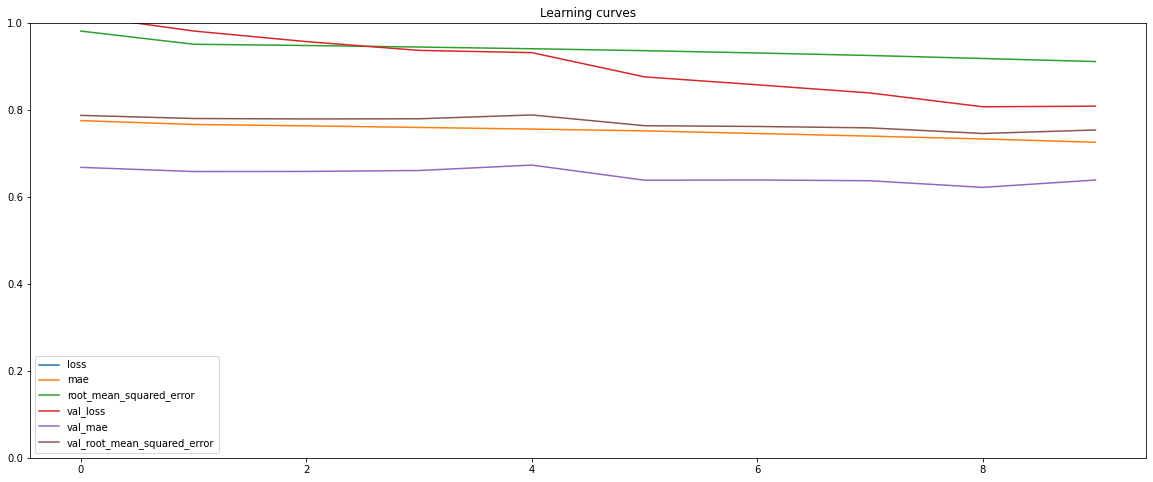

<class 'dict'>
loss [1.3733114004135132, 1.2892420291900635, 1.2600808143615723, 1.2315986156463623, 1.2043267488479614, 1.1778517961502075, 1.1515356302261353, 1.1260360479354858, 1.100160002708435, 1.0758603811264038]
mae [0.7753658890724182, 0.7664702534675598, 0.7632912993431091, 0.7596383690834045, 0.7559133768081665, 0.7517746686935425, 0.745730459690094, 0.7397036552429199, 0.7331868410110474, 0.7256304621696472]
root_mean_squared_error [0.9812036156654358, 0.950937032699585, 0.948062002658844, 0.9445223212242126, 0.9406288266181946, 0.9361889958381653, 0.930892825126648, 0.925105094909668, 0.9181755781173706, 0.9111992120742798]
val_loss [1.0173369646072388, 0.981349527835846, 0.9570646286010742, 0.9368329048156738, 0.931678831577301, 0.8759150505065918, 0.8577057719230652, 0.8389345407485962, 0.8071723580360413, 0.8085559606552124]
val_mae [0.6678594350814819, 0.6582603454589844, 0.6584705710411072, 0.6606518030166626, 0.6731106638908386, 0.6383247971534729, 0.6388159394264221

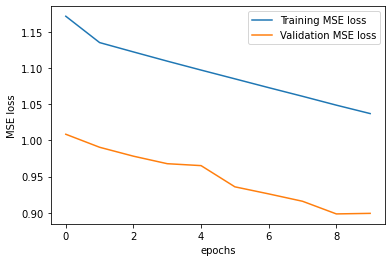

260/260 [==============================] - 0s 1ms/step
r2 score :0.10209648417382788
########################################################################################
Optimizer algorithm : SGD No of units : 32,  Activation function : sigmoid
Model: "sequential_170"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_478 (Dense)           (None, 32)                256       
                                                                 
 dense_479 (Dense)           (None, 32)                1056      
                                                                 
 dense_480 (Dense)           (None, 32)                1056      
                                                                 
 dense_481 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0

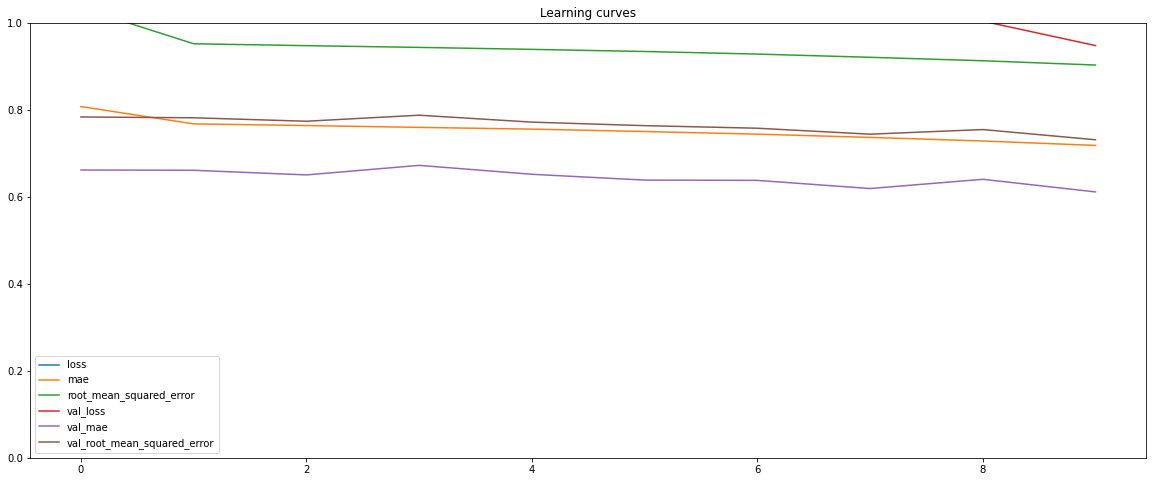

<class 'dict'>
loss [1.7996110916137695, 1.5889697074890137, 1.5378762483596802, 1.4908103942871094, 1.4458255767822266, 1.403067708015442, 1.361264944076538, 1.3196914196014404, 1.2797819375991821, 1.2393096685409546]
mae [0.8076170086860657, 0.7678306102752686, 0.7639968395233154, 0.7598011493682861, 0.755765974521637, 0.750297486782074, 0.7442098259925842, 0.7367686629295349, 0.7284727692604065, 0.7183234095573425]
root_mean_squared_error [1.0348522663116455, 0.9520556330680847, 0.9476990699768066, 0.9437181949615479, 0.9391884803771973, 0.9342710375785828, 0.9283317923545837, 0.9209724068641663, 0.9130023717880249, 0.9031544327735901]
val_loss [1.3190720081329346, 1.2716630697250366, 1.218176007270813, 1.2019561529159546, 1.1421016454696655, 1.0975701808929443, 1.0592373609542847, 1.0120633840560913, 1.0040555000305176, 0.9479354619979858]
val_mae [0.6617662310600281, 0.6611525416374207, 0.6505029797554016, 0.6724536418914795, 0.6519330143928528, 0.6385698318481445, 0.6379511356353

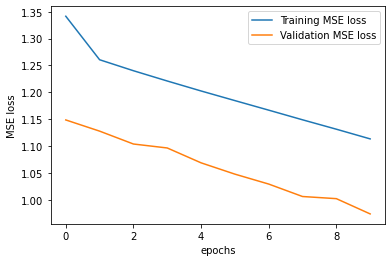

260/260 [==============================] - 0s 1ms/step
r2 score :0.14387255820022293
########################################################################################
Optimizer algorithm : SGD No of units : 64,  Activation function : sigmoid
Model: "sequential_171"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_482 (Dense)           (None, 64)                512       
                                                                 
 dense_483 (Dense)           (None, 64)                4160      
                                                                 
 dense_484 (Dense)           (None, 64)                4160      
                                                                 
 dense_485 (Dense)           (None, 1)                 65        
                                                                 
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0

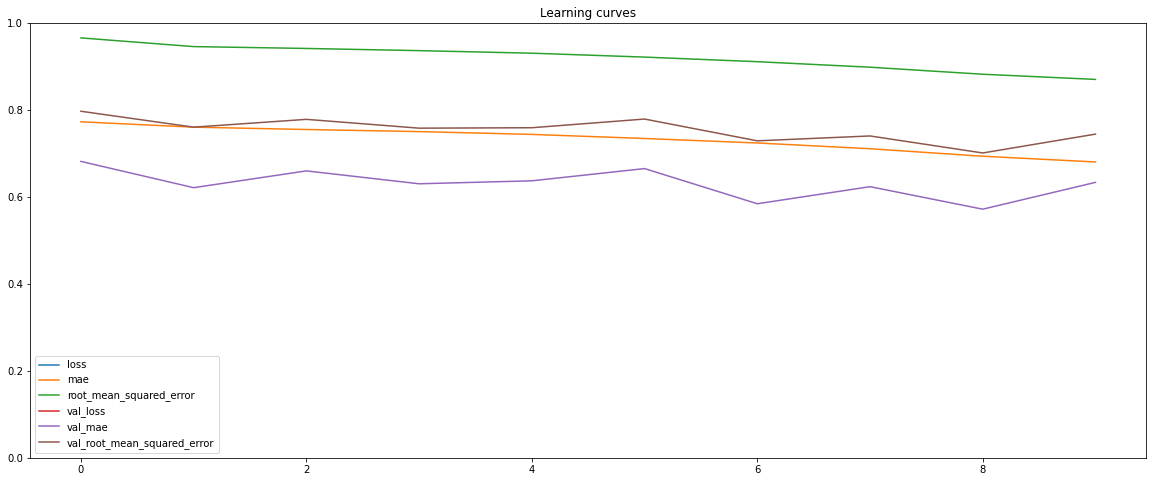

<class 'dict'>
loss [2.287221670150757, 2.1636343002319336, 2.076143741607666, 1.992897629737854, 1.91353440284729, 1.8337458372116089, 1.7563080787658691, 1.6803553104400635, 1.6032737493515015, 1.5386849641799927]
mae [0.7726024985313416, 0.7603093981742859, 0.754915177822113, 0.7500967383384705, 0.7436500191688538, 0.7342460751533508, 0.7239255309104919, 0.7106999158859253, 0.6934384107589722, 0.6802917718887329]
root_mean_squared_error [0.9655380845069885, 0.945558488368988, 0.9412998557090759, 0.9362552165985107, 0.9303841590881348, 0.921414315700531, 0.9108432531356812, 0.8981812000274658, 0.8819854259490967, 0.8700951933860779]
val_loss [1.945792555809021, 1.806430697441101, 1.757601022720337, 1.6554044485092163, 1.5911985635757446, 1.5613653659820557, 1.4302884340286255, 1.3961657285690308, 1.2938566207885742, 1.314713716506958]
val_mae [0.6815169453620911, 0.6211494207382202, 0.6597556471824646, 0.6301065683364868, 0.6369255781173706, 0.6650413274765015, 0.5841853618621826, 0.

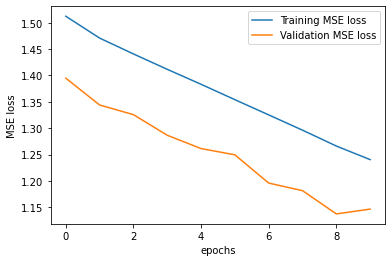

260/260 [==============================] - 0s 1ms/step
r2 score :0.14675603849137564
########################################################################################
Optimizer algorithm : SGD No of units : 128,  Activation function : sigmoid
Model: "sequential_172"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_486 (Dense)           (None, 128)               1024      
                                                                 
 dense_487 (Dense)           (None, 128)               16512     
                                                                 
 dense_488 (Dense)           (None, 128)               16512     
                                                                 
 dense_489 (Dense)           (None, 1)                 129       
                                                                 
Total params: 34,177
Trainable params: 34,177
Non-trainable params

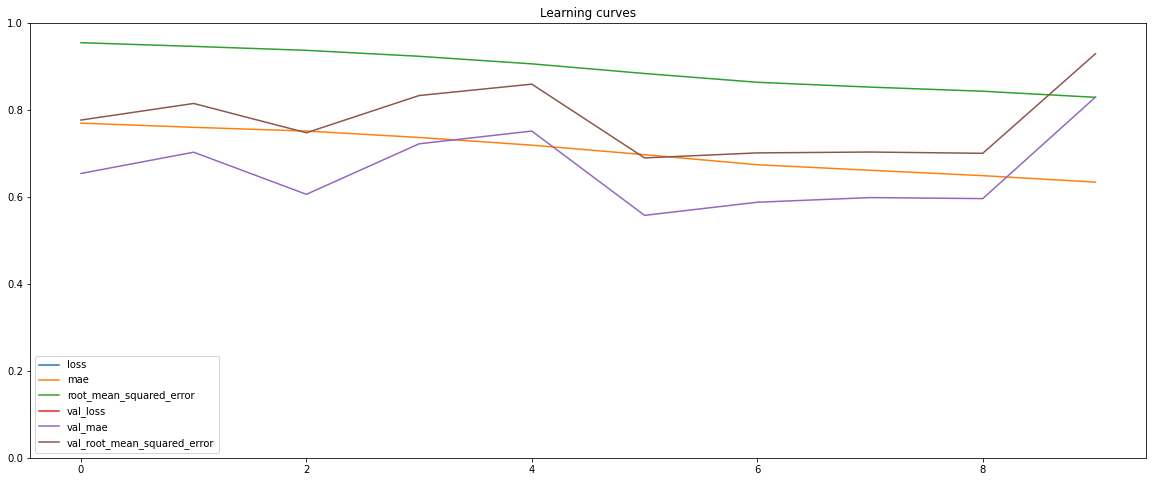

<class 'dict'>
loss [3.504429578781128, 3.3240103721618652, 3.1541996002197266, 2.9871232509613037, 2.824709177017212, 2.6648917198181152, 2.5192084312438965, 2.398022413253784, 2.2862300872802734, 2.1725966930389404]
mae [0.7694820165634155, 0.7599393129348755, 0.7513160705566406, 0.7366446256637573, 0.7189093232154846, 0.6970540881156921, 0.6739302277565002, 0.6611891984939575, 0.6488013863563538, 0.633884847164154]
root_mean_squared_error [0.9545038342475891, 0.9460490942001343, 0.9369652271270752, 0.9232658743858337, 0.9058693647384644, 0.883691132068634, 0.8635086417198181, 0.8523945808410645, 0.8429103493690491, 0.8289213180541992]
val_loss [3.111449718475342, 3.013843536376953, 2.7615342140197754, 2.7608578205108643, 2.679879903793335, 2.302405834197998, 2.2124059200286865, 2.1164791584014893, 2.0193378925323486, 2.304649829864502]
val_mae [0.6538149118423462, 0.7027154564857483, 0.6058725118637085, 0.7220295071601868, 0.751300573348999, 0.5575013160705566, 0.5876550674438477, 0

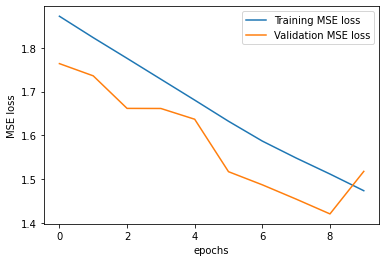

260/260 [==============================] - 0s 1ms/step
r2 score :-0.2524333859206527
########################################################################################
Optimizer algorithm : SGD No of units : 16,  Activation function : relu
Model: "sequential_173"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_490 (Dense)           (None, 16)                128       
                                                                 
 dense_491 (Dense)           (None, 16)                272       
                                                                 
 dense_492 (Dense)           (None, 16)                272       
                                                                 
 dense_493 (Dense)           (None, 1)                 17        
                                                                 
Total params: 689
Trainable params: 689
Non-trainable params: 0
______

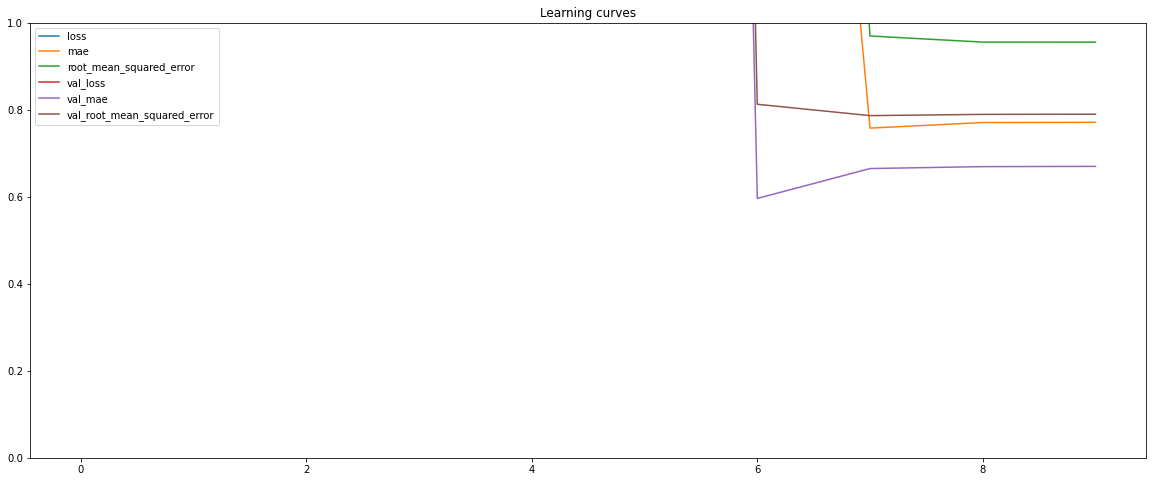

<class 'dict'>
loss [4.945052314469537e+20, 4.040595280914022e+19, 3.7818678803680985e+19, 3.540299898089898e+19, 3.314161362484278e+19, 3.1024671111327515e+19, 2.904296632900544e+19, 2.7187830728203174e+19, 2.545120708771237e+19, 2.382550218023161e+19]
mae [3235992832.0, 61512200.0, 2194137.25, 78264.8125, 2791.703125, 99.57982635498047, 3.582883358001709, 0.7581346035003662, 0.7709317803382874, 0.7714419364929199]
root_mean_squared_error [21257879552.0, 82154512.0, 2930448.5, 104528.984375, 3728.542236328125, 132.99835205078125, 4.836008071899414, 0.9699580669403076, 0.955865740776062, 0.9558188319206238]
val_loss [4.17766084023723e+19, 3.9067024723439256e+19, 3.657153135159699e+19, 3.4235517743317123e+19, 3.2048690270740414e+19, 3.0001575541681947e+19, 2.808521913344511e+19, 2.629125596156579e+19, 2.4611897085672817e+19, 2.3039828554418225e+19]
val_mae [209660464.0, 7478585.5, 266760.65625, 9515.17578125, 339.2381591796875, 11.92970085144043, 0.5963996052742004, 0.6651296615600586, 

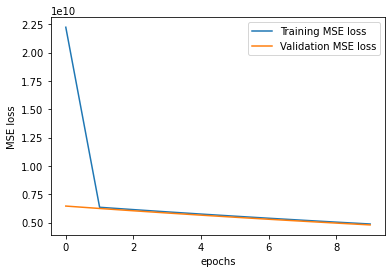

260/260 [==============================] - 0s 1ms/step
r2 score :-0.00467423373083653
########################################################################################
Optimizer algorithm : SGD No of units : 32,  Activation function : relu
Model: "sequential_174"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_494 (Dense)           (None, 32)                256       
                                                                 
 dense_495 (Dense)           (None, 32)                1056      
                                                                 
 dense_496 (Dense)           (None, 32)                1056      
                                                                 
 dense_497 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_

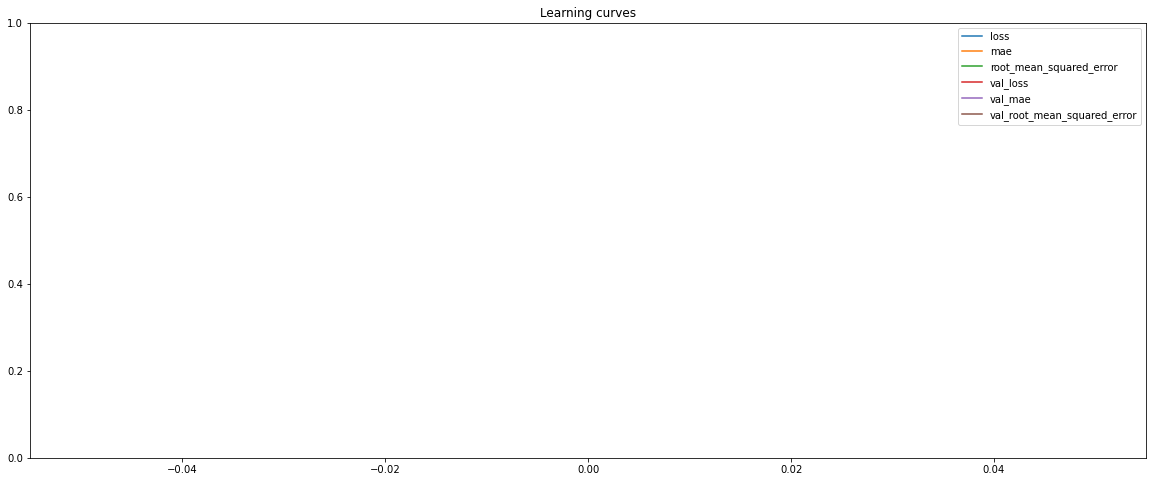

<class 'dict'>
loss [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mae [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
root_mean_squared_error [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
val_loss [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
val_mae [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
val_root_mean_squared_error [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


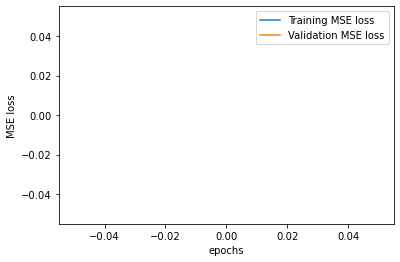

260/260 [==============================] - 0s 1ms/step


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [79]:
optimizer_algos = ['SGD','Adam']
activation_func_list = ['sigmoid','relu']
no_of_units_list = [16,32,64,128]
for k in optimizer_algos:
    for i in activation_func_list:
        for j in no_of_units_list:
            ann_12(k,j,j,j,i)
            print("########################################################################################")